## OpenLane Colab

This Google Colab notebook will:
* Install OpenLane and its dependencies
* Run a simple design, namely a serial-parallel multiplier, through the flow
  and targeting the [open source sky130 PDK](https://github.com/google/skywater-pdk/)
  by Google and Skywater.

In [1]:
# @title Setup Nix {display-mode: "form"}
# @markdown <img src="https://raw.githubusercontent.com/NixOS/nixos-artwork/master/logo/nix-snowflake.svg" width="32"/>
# @markdown
# @markdown Nix is a package manager with an emphasis on reproducible builds,
# @markdown and it is the primary method for installing OpenLane 2.
# @markdown
# @markdown This step installs the Nix package manager and enables the
# @markdown experimental "flakes" feature.
# @markdown
# @markdown If you're not in a Colab, this just sets the environment variables.
# @markdown You will need to install Nix and enable flakes on your own following
# @markdown [this guide](https://openlane2.readthedocs.io/en/stable/getting_started/common/nix_installation/index.html).
import os
import sys
import shutil

os.environ["LOCALE_ARCHIVE"] = "/usr/lib/locale/locale-archive"

if "google.colab" in sys.modules:
    if shutil.which("nix-env") is None:
        !curl -L https://nixos.org/nix/install | bash -s -- --daemon --yes
        !echo "extra-experimental-features = nix-command flakes" >> /etc/nix/nix.conf
        !killall nix-daemon
else:
    if shutil.which("nix-env") is None:
        raise RuntimeError("Nix is not installed!")

os.environ["PATH"] = f"/nix/var/nix/profiles/default/bin/:{os.getenv('PATH')}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4267  100  4267    0     0   7513      0 --:--:-- --:--:-- --:--:--  7513
downloading Nix 2.30.2 binary tarball for x86_64-linux from 'https://releases.nixos.org/nix/nix-2.30.2/nix-2.30.2-x86_64-linux.tar.xz' to '/tmp/nix-binary-tarball-unpack.RxdjBk4JmU'...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M  100 24.2M    0     0  51.0M      0 --:--:-- --:--:-- --:--:-- 50.9M
Note: a multi-user installation is possible. See https://nixos.org/manual/nix/stable/installation/installing-binary.html#multi-user-installation
Switching to the Multi-user Installer
Welcome to the Multi-User Nix Installation

This installation tool will set up 

In [3]:
# @title Get OpenLane {display-mode: "form"}
# @markdown Click the ▷ button to download and install OpenLane.
# @markdown
# @markdown This will install OpenLane's tool dependencies using Nix,
# @markdown and OpenLane itself using PIP.
# @markdown
# @markdown Note that `python3-tk` may need to be installed using your OS's
# @markdown package manager.
import os
import subprocess
import IPython

openlane_version = "version-2.1"  # @param {key:"OpenLane Version", type:"string"}

if openlane_version == "latest":
    openlane_version = "main"

pdk_root = "~/.volare"  # @param {key:"PDK Root", type:"string"}

pdk_root = os.path.expanduser(pdk_root)

pdk = "gf180mcu"  # @param {key:"PDK (without the variant)", type:"string"}

openlane_ipynb_path = os.path.join(os.getcwd(), "openlane_ipynb")

display(IPython.display.HTML("<h3>Downloading OpenLane…</a>"))


TESTING_LOCALLY = False
!rm -rf {openlane_ipynb_path}
!mkdir -p {openlane_ipynb_path}
if TESTING_LOCALLY:
    !ln -s {os.getcwd()} {openlane_ipynb_path}
else:
    !curl -L "https://github.com/efabless/openlane2/tarball/{openlane_version}" | tar -xzC {openlane_ipynb_path} --strip-components 1

try:
    import tkinter
except ImportError:
    if "google.colab" in sys.modules:
        !sudo apt-get install python-tk

try:
    import tkinter
except ImportError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to import the <code>tkinter</code> library for Python, which is required to load PDK configuration values. Make sure <code>python3-tk</code> or equivalent is installed on your system.</a>'
        )
    )
    raise e from None


display(IPython.display.HTML("<h3>Downloading OpenLane's dependencies…</a>"))
try:
    subprocess.check_call(
        ["nix", "profile", "install", ".#colab-env", "--accept-flake-config"],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install binary dependencies using Nix…</h3>'
        )
    )

display(IPython.display.HTML("<h3>Downloading Python dependencies using PIP…</a>"))
try:
    subprocess.check_call(
        ["pip3", "install", "."],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install Python dependencies using PIP…</h3>'
        )
    )
    raise e from None

display(IPython.display.HTML("<h3>Downloading PDK…</a>"))
import volare

volare.enable(
    volare.get_volare_home(pdk_root),
    pdk,
    open(
        os.path.join(openlane_ipynb_path, "openlane", "open_pdks_rev"),
        encoding="utf8",
    )
    .read()
    .strip(),
)

sys.path.insert(0, openlane_ipynb_path)
display(IPython.display.HTML("<h3>⭕️ Done.</a>"))

import logging

# Remove the stupid default colab logging handler
logging.getLogger().handlers.clear()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9491k    0 9491k    0     0  10.2M      0 --:--:-- --:--:-- --:--:-- 27.4M


Version bdc9412b3e468c102d01b7cf6337be06ec6e9c9a not found locally, attempting to download…

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Version bdc9412b3e468c102d01b7cf6337be06ec6e9c9a enabled for the gf180mcu PDK.

In [4]:
import openlane

print(openlane.__version__)

2.1.11


### Creating the design

Now that OpenLane is set up, we can write a Verilog file as follows:

In [5]:
%%writefile fixed_point_params.vh

//
// fixed_point_params.vh
// Defines the fixed-point data type for the QFT project.
//

// Total bits for our signed fixed-point number
`define TOTAL_WIDTH 8

// Number of fractional bits
`define FRAC_WIDTH 4

// Width for intermediate multiplication results (before scaling)
`define MULT_WIDTH (`TOTAL_WIDTH * 2)

// Width for intermediate addition results
`define ADD_WIDTH (`TOTAL_WIDTH + 1)

Writing fixed_point_params.vh


In [6]:
%%writefile qft3_top.v

`timescale 1ns / 1ps
`include "fixed_point_params.vh"

// Pipelined Top-level module for a 3-Qubit Quantum Fourier Transform
// Total pipeline depth: approximately 30+ clock cycles
module qft3_top(
    input  wire clk,
    input  wire rst_n,
    input  wire valid_in,  // Input valid signal

    // Initial 3-qubit state vector [α000, ..., α111]
    input  signed [`TOTAL_WIDTH-1:0] i000_r, i000_i, i001_r, i001_i, i010_r, i010_i, i011_r, i011_i,
    input  signed [`TOTAL_WIDTH-1:0] i100_r, i100_i, i101_r, i101_i, i110_r, i110_i, i111_r, i111_i,

    // Final state vector after the QFT
    output reg signed [`TOTAL_WIDTH-1:0] f000_r, f000_i, f001_r, f001_i, f010_r, f010_i, f011_r, f011_i,
    output reg signed [`TOTAL_WIDTH-1:0] f100_r, f100_i, f101_r, f101_i, f110_r, f110_i, f111_r, f111_i,
    output reg valid_out  // Output valid signal
);

    // --- Define Rotation Angles ---
    localparam THETA_PI_2 = 25;  // π/2 in S3.4 format
    localparam THETA_PI_4 = 13;  // π/4 in S3.4 format

    // --- Pipeline Stage Registers (changed from wire to reg) ---
    // Each stage needs multiple pipeline registers due to different gate delays

    // Stage 1: H on q2 (1 + 3 = 4 cycles for cadd + ccmult)
    reg signed [`TOTAL_WIDTH-1:0] s1_r[0:7], s1_i[0:7];

    // Stage 2: CROT(π/2) from q1 to q2 (4 + 7 = 11 cycles for trig + ccmult)
    reg signed [`TOTAL_WIDTH-1:0] s2_r[0:7], s2_i[0:7];

    // Stage 3: CROT(π/4) from q0 to q2 (4 + 7 = 11 cycles)
    reg signed [`TOTAL_WIDTH-1:0] s3_r[0:7], s3_i[0:7];

    // Stage 4: H on q1 (4 cycles)
    reg signed [`TOTAL_WIDTH-1:0] s4_r[0:7], s4_i[0:7];

    // Stage 5: CROT(π/2) from q0 to q1 (11 cycles)
    reg signed [`TOTAL_WIDTH-1:0] s5_r[0:7], s5_i[0:7];

    // Stage 6: H on q0 (4 cycles)
    reg signed [`TOTAL_WIDTH-1:0] s6_r[0:7], s6_i[0:7];

    // Stage 7: SWAP q0 and q2 (1 cycle)
    reg signed [`TOTAL_WIDTH-1:0] s7_r[0:7], s7_i[0:7];

    // Intermediate wires for gate outputs
    wire signed [`TOTAL_WIDTH-1:0] h_q2_out_r[0:7], h_q2_out_i[0:7];
    wire signed [`TOTAL_WIDTH-1:0] crot21_out_r[0:1], crot21_out_i[0:1];
    wire signed [`TOTAL_WIDTH-1:0] crot20_out_r[0:1], crot20_out_i[0:1];
    wire signed [`TOTAL_WIDTH-1:0] h_q1_out_r[0:7], h_q1_out_i[0:7];
    wire signed [`TOTAL_WIDTH-1:0] crot10_out_r[0:1], crot10_out_i[0:1];
    wire signed [`TOTAL_WIDTH-1:0] h_q0_out_r[0:7], h_q0_out_i[0:7];
    wire signed [`TOTAL_WIDTH-1:0] swap_out_r[0:3], swap_out_i[0:3];

    // Valid signal pipeline - track through all stages
    reg [31:0] valid_pipeline;

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            valid_pipeline <= 0;
            valid_out <= 0;
        end else begin
            valid_pipeline <= {valid_pipeline[30:0], valid_in};
            valid_out <= valid_pipeline[31]; // Adjust this based on actual total pipeline depth
        end
    end

    // --- STAGE 1: H on q2 (bit 2) ---
    h_gate h_q2_p0 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(i000_r), .alpha_i(i000_i), .beta_r(i100_r), .beta_i(i100_i),
        .new_alpha_r(h_q2_out_r[0]), .new_alpha_i(h_q2_out_i[0]), .new_beta_r(h_q2_out_r[4]), .new_beta_i(h_q2_out_i[4])
    );
    h_gate h_q2_p1 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(i001_r), .alpha_i(i001_i), .beta_r(i101_r), .beta_i(i101_i),
        .new_alpha_r(h_q2_out_r[1]), .new_alpha_i(h_q2_out_i[1]), .new_beta_r(h_q2_out_r[5]), .new_beta_i(h_q2_out_i[5])
    );
    h_gate h_q2_p2 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(i010_r), .alpha_i(i010_i), .beta_r(i110_r), .beta_i(i110_i),
        .new_alpha_r(h_q2_out_r[2]), .new_alpha_i(h_q2_out_i[2]), .new_beta_r(h_q2_out_r[6]), .new_beta_i(h_q2_out_i[6])
    );
    h_gate h_q2_p3 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(i011_r), .alpha_i(i011_i), .beta_r(i111_r), .beta_i(i111_i),
        .new_alpha_r(h_q2_out_r[3]), .new_alpha_i(h_q2_out_i[3]), .new_beta_r(h_q2_out_r[7]), .new_beta_i(h_q2_out_i[7])
    );

    // Stage 1 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s1_r[i] <= 0;
                s1_i[i] <= 0;
            end
        end else begin
            s1_r[0] <= h_q2_out_r[0]; s1_i[0] <= h_q2_out_i[0];
            s1_r[1] <= h_q2_out_r[1]; s1_i[1] <= h_q2_out_i[1];
            s1_r[2] <= h_q2_out_r[2]; s1_i[2] <= h_q2_out_i[2];
            s1_r[3] <= h_q2_out_r[3]; s1_i[3] <= h_q2_out_i[3];
            s1_r[4] <= h_q2_out_r[4]; s1_i[4] <= h_q2_out_i[4];
            s1_r[5] <= h_q2_out_r[5]; s1_i[5] <= h_q2_out_i[5];
            s1_r[6] <= h_q2_out_r[6]; s1_i[6] <= h_q2_out_i[6];
            s1_r[7] <= h_q2_out_r[7]; s1_i[7] <= h_q2_out_i[7];
        end
    end

    // --- STAGE 2: CROT(π/2) from q1 to q2 ---
    // Apply rotation only to states where q1=1 AND q2=1: indices 6,7
    crot_gate c21_p0 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s1_r[6]), .in_i(s1_i[6]), .theta(THETA_PI_2),
        .out_r(crot21_out_r[0]), .out_i(crot21_out_i[0])
    );
    crot_gate c21_p1 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s1_r[7]), .in_i(s1_i[7]), .theta(THETA_PI_2),
        .out_r(crot21_out_r[1]), .out_i(crot21_out_i[1])
    );

    // Delay non-rotated signals to match CROT delay (11 cycles)
    reg signed [`TOTAL_WIDTH-1:0] delay_stage2[0:10][0:5][0:1]; // [delay][signal_index][real/imag]

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer d = 0; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage2[d][i][0] <= 0;
                    delay_stage2[d][i][1] <= 0;
                end
            end
        end else begin
            // Input from stage 1
            delay_stage2[0][0][0] <= s1_r[0]; delay_stage2[0][0][1] <= s1_i[0];
            delay_stage2[0][1][0] <= s1_r[1]; delay_stage2[0][1][1] <= s1_i[1];
            delay_stage2[0][2][0] <= s1_r[2]; delay_stage2[0][2][1] <= s1_i[2];
            delay_stage2[0][3][0] <= s1_r[3]; delay_stage2[0][3][1] <= s1_i[3];
            delay_stage2[0][4][0] <= s1_r[4]; delay_stage2[0][4][1] <= s1_i[4];
            delay_stage2[0][5][0] <= s1_r[5]; delay_stage2[0][5][1] <= s1_i[5];

            // Pipeline delays
            for (integer d = 1; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage2[d][i][0] <= delay_stage2[d-1][i][0];
                    delay_stage2[d][i][1] <= delay_stage2[d-1][i][1];
                end
            end
        end
    end

    // Stage 2 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s2_r[i] <= 0;
                s2_i[i] <= 0;
            end
        end else begin
            s2_r[0] <= delay_stage2[10][0][0]; s2_i[0] <= delay_stage2[10][0][1];
            s2_r[1] <= delay_stage2[10][1][0]; s2_i[1] <= delay_stage2[10][1][1];
            s2_r[2] <= delay_stage2[10][2][0]; s2_i[2] <= delay_stage2[10][2][1];
            s2_r[3] <= delay_stage2[10][3][0]; s2_i[3] <= delay_stage2[10][3][1];
            s2_r[4] <= delay_stage2[10][4][0]; s2_i[4] <= delay_stage2[10][4][1];
            s2_r[5] <= delay_stage2[10][5][0]; s2_i[5] <= delay_stage2[10][5][1];
            s2_r[6] <= crot21_out_r[0]; s2_i[6] <= crot21_out_i[0];
            s2_r[7] <= crot21_out_r[1]; s2_i[7] <= crot21_out_i[1];
        end
    end

    // --- STAGE 3: CROT(π/4) from q0 to q2 ---
    // Apply rotation only to states where q0=1 AND q2=1: indices 5,7
    crot_gate c20_p0 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s2_r[5]), .in_i(s2_i[5]), .theta(THETA_PI_4),
        .out_r(crot20_out_r[0]), .out_i(crot20_out_i[0])
    );
    crot_gate c20_p1 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s2_r[7]), .in_i(s2_i[7]), .theta(THETA_PI_4),
        .out_r(crot20_out_r[1]), .out_i(crot20_out_i[1])
    );

    // Delay non-rotated signals (11 cycles)
    reg signed [`TOTAL_WIDTH-1:0] delay_stage3[0:10][0:5][0:1];

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer d = 0; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage3[d][i][0] <= 0;
                    delay_stage3[d][i][1] <= 0;
                end
            end
        end else begin
            delay_stage3[0][0][0] <= s2_r[0]; delay_stage3[0][0][1] <= s2_i[0];
            delay_stage3[0][1][0] <= s2_r[1]; delay_stage3[0][1][1] <= s2_i[1];
            delay_stage3[0][2][0] <= s2_r[2]; delay_stage3[0][2][1] <= s2_i[2];
            delay_stage3[0][3][0] <= s2_r[3]; delay_stage3[0][3][1] <= s2_i[3];
            delay_stage3[0][4][0] <= s2_r[4]; delay_stage3[0][4][1] <= s2_i[4];
            delay_stage3[0][5][0] <= s2_r[6]; delay_stage3[0][5][1] <= s2_i[6];

            for (integer d = 1; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage3[d][i][0] <= delay_stage3[d-1][i][0];
                    delay_stage3[d][i][1] <= delay_stage3[d-1][i][1];
                end
            end
        end
    end

    // Stage 3 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s3_r[i] <= 0;
                s3_i[i] <= 0;
            end
        end else begin
            s3_r[0] <= delay_stage3[10][0][0]; s3_i[0] <= delay_stage3[10][0][1];
            s3_r[1] <= delay_stage3[10][1][0]; s3_i[1] <= delay_stage3[10][1][1];
            s3_r[2] <= delay_stage3[10][2][0]; s3_i[2] <= delay_stage3[10][2][1];
            s3_r[3] <= delay_stage3[10][3][0]; s3_i[3] <= delay_stage3[10][3][1];
            s3_r[4] <= delay_stage3[10][4][0]; s3_i[4] <= delay_stage3[10][4][1];
            s3_r[5] <= crot20_out_r[0]; s3_i[5] <= crot20_out_i[0];
            s3_r[6] <= delay_stage3[10][5][0]; s3_i[6] <= delay_stage3[10][5][1];
            s3_r[7] <= crot20_out_r[1]; s3_i[7] <= crot20_out_i[1];
        end
    end

    // --- STAGE 4: H on q1 (bit 1) ---
    h_gate h_q1_p0 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s3_r[0]), .alpha_i(s3_i[0]), .beta_r(s3_r[2]), .beta_i(s3_i[2]),
        .new_alpha_r(h_q1_out_r[0]), .new_alpha_i(h_q1_out_i[0]), .new_beta_r(h_q1_out_r[2]), .new_beta_i(h_q1_out_i[2])
    );
    h_gate h_q1_p1 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s3_r[1]), .alpha_i(s3_i[1]), .beta_r(s3_r[3]), .beta_i(s3_i[3]),
        .new_alpha_r(h_q1_out_r[1]), .new_alpha_i(h_q1_out_i[1]), .new_beta_r(h_q1_out_r[3]), .new_beta_i(h_q1_out_i[3])
    );
    h_gate h_q1_p2 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s3_r[4]), .alpha_i(s3_i[4]), .beta_r(s3_r[6]), .beta_i(s3_i[6]),
        .new_alpha_r(h_q1_out_r[4]), .new_alpha_i(h_q1_out_i[4]), .new_beta_r(h_q1_out_r[6]), .new_beta_i(h_q1_out_i[6])
    );
    h_gate h_q1_p3 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s3_r[5]), .alpha_i(s3_i[5]), .beta_r(s3_r[7]), .beta_i(s3_i[7]),
        .new_alpha_r(h_q1_out_r[5]), .new_alpha_i(h_q1_out_i[5]), .new_beta_r(h_q1_out_r[7]), .new_beta_i(h_q1_out_i[7])
    );

    // Stage 4 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s4_r[i] <= 0;
                s4_i[i] <= 0;
            end
        end else begin
            s4_r[0] <= h_q1_out_r[0]; s4_i[0] <= h_q1_out_i[0];
            s4_r[1] <= h_q1_out_r[1]; s4_i[1] <= h_q1_out_i[1];
            s4_r[2] <= h_q1_out_r[2]; s4_i[2] <= h_q1_out_i[2];
            s4_r[3] <= h_q1_out_r[3]; s4_i[3] <= h_q1_out_i[3];
            s4_r[4] <= h_q1_out_r[4]; s4_i[4] <= h_q1_out_i[4];
            s4_r[5] <= h_q1_out_r[5]; s4_i[5] <= h_q1_out_i[5];
            s4_r[6] <= h_q1_out_r[6]; s4_i[6] <= h_q1_out_i[6];
            s4_r[7] <= h_q1_out_r[7]; s4_i[7] <= h_q1_out_i[7];
        end
    end

    // --- STAGE 5: CROT(π/2) from q0 to q1 ---
    // Apply rotation only to states where q0=1 AND q1=1: indices 3,7
    crot_gate c10_p0 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s4_r[3]), .in_i(s4_i[3]), .theta(THETA_PI_2),
        .out_r(crot10_out_r[0]), .out_i(crot10_out_i[0])
    );
    crot_gate c10_p1 (
        .clk(clk), .rst_n(rst_n),
        .in_r(s4_r[7]), .in_i(s4_i[7]), .theta(THETA_PI_2),
        .out_r(crot10_out_r[1]), .out_i(crot10_out_i[1])
    );

    // Delay non-rotated signals (11 cycles)
    reg signed [`TOTAL_WIDTH-1:0] delay_stage5[0:10][0:5][0:1];

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer d = 0; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage5[d][i][0] <= 0;
                    delay_stage5[d][i][1] <= 0;
                end
            end
        end else begin
            delay_stage5[0][0][0] <= s4_r[0]; delay_stage5[0][0][1] <= s4_i[0];
            delay_stage5[0][1][0] <= s4_r[1]; delay_stage5[0][1][1] <= s4_i[1];
            delay_stage5[0][2][0] <= s4_r[2]; delay_stage5[0][2][1] <= s4_i[2];
            delay_stage5[0][3][0] <= s4_r[4]; delay_stage5[0][3][1] <= s4_i[4];
            delay_stage5[0][4][0] <= s4_r[5]; delay_stage5[0][4][1] <= s4_i[5];
            delay_stage5[0][5][0] <= s4_r[6]; delay_stage5[0][5][1] <= s4_i[6];

            for (integer d = 1; d < 11; d=d+1) begin
                for (integer i = 0; i < 6; i=i+1) begin
                    delay_stage5[d][i][0] <= delay_stage5[d-1][i][0];
                    delay_stage5[d][i][1] <= delay_stage5[d-1][i][1];
                end
            end
        end
    end

    // Stage 5 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s5_r[i] <= 0;
                s5_i[i] <= 0;
            end
        end else begin
            s5_r[0] <= delay_stage5[10][0][0]; s5_i[0] <= delay_stage5[10][0][1];
            s5_r[1] <= delay_stage5[10][1][0]; s5_i[1] <= delay_stage5[10][1][1];
            s5_r[2] <= delay_stage5[10][2][0]; s5_i[2] <= delay_stage5[10][2][1];
            s5_r[3] <= crot10_out_r[0]; s5_i[3] <= crot10_out_i[0];
            s5_r[4] <= delay_stage5[10][3][0]; s5_i[4] <= delay_stage5[10][3][1];
            s5_r[5] <= delay_stage5[10][4][0]; s5_i[5] <= delay_stage5[10][4][1];
            s5_r[6] <= delay_stage5[10][5][0]; s5_i[6] <= delay_stage5[10][5][1];
            s5_r[7] <= crot10_out_r[1]; s5_i[7] <= crot10_out_i[1];
        end
    end

    // --- STAGE 6: H on q0 (bit 0) ---
    h_gate h_q0_p0 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s5_r[0]), .alpha_i(s5_i[0]), .beta_r(s5_r[1]), .beta_i(s5_i[1]),
        .new_alpha_r(h_q0_out_r[0]), .new_alpha_i(h_q0_out_i[0]), .new_beta_r(h_q0_out_r[1]), .new_beta_i(h_q0_out_i[1])
    );
    h_gate h_q0_p1 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s5_r[2]), .alpha_i(s5_i[2]), .beta_r(s5_r[3]), .beta_i(s5_i[3]),
        .new_alpha_r(h_q0_out_r[2]), .new_alpha_i(h_q0_out_i[2]), .new_beta_r(h_q0_out_r[3]), .new_beta_i(h_q0_out_i[3])
    );
    h_gate h_q0_p2 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s5_r[4]), .alpha_i(s5_i[4]), .beta_r(s5_r[5]), .beta_i(s5_i[5]),
        .new_alpha_r(h_q0_out_r[4]), .new_alpha_i(h_q0_out_i[4]), .new_beta_r(h_q0_out_r[5]), .new_beta_i(h_q0_out_i[5])
    );
    h_gate h_q0_p3 (
        .clk(clk), .rst_n(rst_n),
        .alpha_r(s5_r[6]), .alpha_i(s5_i[6]), .beta_r(s5_r[7]), .beta_i(s5_i[7]),
        .new_alpha_r(h_q0_out_r[6]), .new_alpha_i(h_q0_out_i[6]), .new_beta_r(h_q0_out_r[7]), .new_beta_i(h_q0_out_i[7])
    );

    // Stage 6 output assignment
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s6_r[i] <= 0;
                s6_i[i] <= 0;
            end
        end else begin
            s6_r[0] <= h_q0_out_r[0]; s6_i[0] <= h_q0_out_i[0];
            s6_r[1] <= h_q0_out_r[1]; s6_i[1] <= h_q0_out_i[1];
            s6_r[2] <= h_q0_out_r[2]; s6_i[2] <= h_q0_out_i[2];
            s6_r[3] <= h_q0_out_r[3]; s6_i[3] <= h_q0_out_i[3];
            s6_r[4] <= h_q0_out_r[4]; s6_i[4] <= h_q0_out_i[4];
            s6_r[5] <= h_q0_out_r[5]; s6_i[5] <= h_q0_out_i[5];
            s6_r[6] <= h_q0_out_r[6]; s6_i[6] <= h_q0_out_i[6];
            s6_r[7] <= h_q0_out_r[7]; s6_i[7] <= h_q0_out_i[7];
        end
    end

    // --- STAGE 7: SWAP q0 and q2 ---
    swap_gate final_swap (
        .clk(clk), .rst_n(rst_n),
        .in_001_r(s6_r[1]), .in_001_i(s6_i[1]), .in_100_r(s6_r[4]), .in_100_i(s6_i[4]),
        .in_011_r(s6_r[3]), .in_011_i(s6_i[3]), .in_110_r(s6_r[6]), .in_110_i(s6_i[6]),
        .out_001_r(swap_out_r[0]), .out_001_i(swap_out_i[0]),
        .out_100_r(swap_out_r[1]), .out_100_i(swap_out_i[1]),
        .out_011_r(swap_out_r[2]), .out_011_i(swap_out_i[2]),
        .out_110_r(swap_out_r[3]), .out_110_i(swap_out_i[3])
    );

    // Stage 7 output assignment (SWAP + delay non-swapped signals by 1 cycle)
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            for (integer i = 0; i < 8; i = i + 1) begin
                s7_r[i] <= 0;
                s7_i[i] <= 0;
            end
        end else begin
            // Non-swapped signals (delayed by 1 cycle)
            s7_r[0] <= s6_r[0]; s7_i[0] <= s6_i[0];
            s7_r[2] <= s6_r[2]; s7_i[2] <= s6_i[2];
            s7_r[5] <= s6_r[5]; s7_i[5] <= s6_i[5];
            s7_r[7] <= s6_r[7]; s7_i[7] <= s6_i[7];

            // Swapped signals from swap_gate output
            s7_r[1] <= swap_out_r[0]; s7_i[1] <= swap_out_i[0]; // 001
            s7_r[4] <= swap_out_r[1]; s7_i[4] <= swap_out_i[1]; // 100
            s7_r[3] <= swap_out_r[2]; s7_i[3] <= swap_out_i[2]; // 011
            s7_r[6] <= swap_out_r[3]; s7_i[6] <= swap_out_i[3]; // 110
        end
    end

    // --- Final Output Assignment ---
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            f000_r <= 0; f000_i <= 0; f001_r <= 0; f001_i <= 0;
            f010_r <= 0; f010_i <= 0; f011_r <= 0; f011_i <= 0;
            f100_r <= 0; f100_i <= 0; f101_r <= 0; f101_i <= 0;
            f110_r <= 0; f110_i <= 0; f111_r <= 0; f111_i <= 0;
        end else begin
            f000_r <= s7_r[0]; f000_i <= s7_i[0];
            f001_r <= s7_r[1]; f001_i <= s7_i[1];
            f010_r <= s7_r[2]; f010_i <= s7_i[2];
            f011_r <= s7_r[3]; f011_i <= s7_i[3];
            f100_r <= s7_r[4]; f100_i <= s7_i[4];
            f101_r <= s7_r[5]; f101_i <= s7_i[5];
            f110_r <= s7_r[6]; f110_i <= s7_i[6];
            f111_r <= s7_r[7]; f111_i <= s7_i[7];
        end
    end

endmodule



`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module cadd(
    input  wire clk,
    input  wire rst_n,
    input  signed [`TOTAL_WIDTH-1:0] ar, ai, // Input A
    input  signed [`TOTAL_WIDTH-1:0] br, bi, // Input B
    output reg signed [`ADD_WIDTH-1:0]   pr, pi  // Output P (wider to prevent overflow)
);

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            pr <= 0;
            pi <= 0;
        end else begin
            pr <= ar + br;
            pi <= ai + bi;
        end
    end

endmodule





`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module ccmult(
    input  wire clk,
    input  wire rst_n,
    input  signed [`TOTAL_WIDTH-1:0] ar, ai,
    input  signed [`TOTAL_WIDTH-1:0] br, bi,
    output reg signed [`TOTAL_WIDTH-1:0] pr, pi
);

    // Pipeline stage 1: Multiplication
    reg signed [`MULT_WIDTH-1:0] p_ar_br_reg, p_ai_bi_reg, p_ar_bi_reg, p_ai_br_reg;

    // Pipeline stage 2: Addition/Subtraction and Scaling
    reg signed [`MULT_WIDTH:0] real_sum_reg, imag_sum_reg;

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            // Stage 1 reset
            p_ar_br_reg <= 0;
            p_ai_bi_reg <= 0;
            p_ar_bi_reg <= 0;
            p_ai_br_reg <= 0;
            // Stage 2 reset
            real_sum_reg <= 0;
            imag_sum_reg <= 0;
            // Output reset
            pr <= 0;
            pi <= 0;
        end else begin
            // Stage 1: Perform multiplications
            p_ar_br_reg <= ar * br;
            p_ai_bi_reg <= ai * bi;
            p_ar_bi_reg <= ar * bi;
            p_ai_br_reg <= ai * br;

            // Stage 2: Perform additions/subtractions
            real_sum_reg <= p_ar_br_reg - p_ai_bi_reg;
            imag_sum_reg <= p_ar_bi_reg + p_ai_br_reg;

            // Stage 3: Scale the results back down
            pr <= real_sum_reg >>> `FRAC_WIDTH;
            pi <= imag_sum_reg >>> `FRAC_WIDTH;
        end
    end

endmodule









`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module cosine_approx(
    input  wire clk,
    input  wire rst_n,
    input  wire signed [`TOTAL_WIDTH-1:0] x,
    output reg signed [`TOTAL_WIDTH-1:0] y
);
    // Breakpoints for cos(x) [-2pi, 2pi] from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        BP_N101 = -101, BP_N88 = -88, BP_N75 = -75, BP_N63 = -63,
        BP_N50 = -50,  BP_N38 = -38, BP_N25 = -25, BP_N13 = -13,
        BP_0   = 0,    BP_P13 = 13,  BP_P25 = 25,  BP_P38 = 38,
        BP_P50 = 50,  BP_P63 = 63,  BP_P75 = 75,  BP_P88 = 88;

    // Slopes for each segment from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        S0 = -6, S1 = -14, S2 = -14, S3 = -6, S4 = 6,  S5 = 14, S6 = 14,  S7 = 6,
        S8 = -6, S9 = -14, S10= -14, S11= -6, S12= 6,  S13= 14, S14= 14, S15= 6;

    // Intercepts for each segment from your CSV (CORRECTED)
    localparam signed [`TOTAL_WIDTH-1:0]
        I0 = -21, I1 = -68, I2 = -68, I3 = -35, I4 = 3,  I5 = 23, I6 = 23,  I7 = 16,
        I8 = 16,  I9 = 23,  I10= 23,  I11= 3,   I12= -35,I13= -68,I14= -68, I15= -21;

    // Pipeline registers
    reg signed [`TOTAL_WIDTH-1:0] x_reg;
    reg signed [`TOTAL_WIDTH-1:0] slope_reg, intercept_reg;
    reg signed [`TOTAL_WIDTH*2-1:0] temp_mult_reg;
    reg signed [`TOTAL_WIDTH-1:0] scaled_mult_reg;

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            x_reg <= 0;
            slope_reg <= 0;
            intercept_reg <= 0;
            temp_mult_reg <= 0;
            scaled_mult_reg <= 0;
            y <= 0;
        end else begin
            // Stage 1: Register input and determine slope/intercept
            x_reg <= x;

            slope_reg <= (x < BP_N88) ? S0 : (x < BP_N75) ? S1 : (x < BP_N63) ? S2 : (x < BP_N50) ? S3 :
                         (x < BP_N38) ? S4 : (x < BP_N25) ? S5 : (x < BP_N13) ? S6 : (x < BP_0)   ? S7 :
                         (x < BP_P13) ? S8 : (x < BP_P25) ? S9 : (x < BP_P38) ? S10: (x < BP_P50) ? S11:
                         (x < BP_P63) ? S12: (x < BP_P75) ? S13: (x < BP_P88) ? S14: S15;

            intercept_reg <= (x < BP_N88) ? I0 : (x < BP_N75) ? I1 : (x < BP_N63) ? I2 : (x < BP_N50) ? I3 :
                             (x < BP_N38) ? I4 : (x < BP_N25) ? I5 : (x < BP_N13) ? I6 : (x < BP_0)   ? I7 :
                             (x < BP_P13) ? I8 : (x < BP_P25) ? I9 : (x < BP_P38) ? I10: (x < BP_P50) ? I11:
                             (x < BP_P63) ? I12: (x < BP_P75) ? I13: (x < BP_P88) ? I14: I15;

            // Stage 2: Multiply
            temp_mult_reg <= x_reg * slope_reg;

            // Stage 3: Scale and add intercept
            scaled_mult_reg <= temp_mult_reg >>> `FRAC_WIDTH;

            // Stage 4: Final result
            y <= scaled_mult_reg + intercept_reg;
        end
    end
endmodule








`timescale 1ns / 1ps
`include "fixed_point_params.vh"

// Pipelined Controlled-Rotation (CROT) Gate
// Rotates a complex amplitude by a given angle theta.
// This is done by multiplying the input by e^(i*theta).
// e^(i*theta) = cos(theta) + i*sin(theta)
module crot_gate(
    input  wire clk,
    input  wire rst_n,
    input  wire signed [`TOTAL_WIDTH-1:0] in_r, in_i,      // Input complex amplitude
    input  wire signed [`TOTAL_WIDTH-1:0] theta,           // Rotation angle in S3.4 format
    output wire signed [`TOTAL_WIDTH-1:0] out_r, out_i     // Output rotated complex amplitude
);

    // Wires to hold the results of the sin/cos approximation
    wire signed [`TOTAL_WIDTH-1:0] cos_theta;
    wire signed [`TOTAL_WIDTH-1:0] sin_theta;

    // --- Step 1: Calculate cos(theta) and sin(theta) ---
    // Instantiate the pipelined approximation modules
    cosine_approx cos_unit (
        .clk(clk),
        .rst_n(rst_n),
        .x(theta),
        .y(cos_theta)
    );

    sine_approx sin_unit (
        .clk(clk),
        .rst_n(rst_n),
        .x(theta),
        .y(sin_theta)
    );

    // --- Step 2: Perform the complex multiplication ---
    // Multiply the input amplitude by the (cos + i*sin) vector.
    // Note: Input needs to be delayed to match the trigonometric function pipeline delay
    reg signed [`TOTAL_WIDTH-1:0] in_r_delayed[0:3], in_i_delayed[0:3];

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            in_r_delayed[0] <= 0; in_i_delayed[0] <= 0;
            in_r_delayed[1] <= 0; in_i_delayed[1] <= 0;
            in_r_delayed[2] <= 0; in_i_delayed[2] <= 0;
            in_r_delayed[3] <= 0; in_i_delayed[3] <= 0;
        end else begin
            in_r_delayed[0] <= in_r;     in_i_delayed[0] <= in_i;
            in_r_delayed[1] <= in_r_delayed[0]; in_i_delayed[1] <= in_i_delayed[0];
            in_r_delayed[2] <= in_r_delayed[1]; in_i_delayed[2] <= in_i_delayed[1];
            in_r_delayed[3] <= in_r_delayed[2]; in_i_delayed[3] <= in_i_delayed[2];
        end
    end

    ccmult rotation_multiplier (
        .clk(clk),
        .rst_n(rst_n),
        .ar(in_r_delayed[3]), .ai(in_i_delayed[3]),
        .br(cos_theta),       .bi(sin_theta),
        .pr(out_r),           .pi(out_i)
    );

endmodule






`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module exp_approx(
    input  wire clk,
    input  wire rst_n,
    input  wire signed [`TOTAL_WIDTH-1:0] x,
    output reg signed [`TOTAL_WIDTH-1:0] y
);
    // Breakpoints for exp(x) from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        BP_N80 = -80, BP_N70 = -70, BP_N60 = -60, BP_N50 = -50,
        BP_N40 = -40, BP_N30 = -30, BP_N20 = -20, BP_N10 = -10,
        BP_0   = 0,   BP_P10 = 10,  BP_P20 = 20,  BP_P30 = 30,
        BP_P40 = 40,  BP_P50 = 50,  BP_P60 = 60,  BP_P70 = 70;

    // !! CRITICAL: Using 32-bit width for slopes/intercepts to prevent overflow !!
    localparam signed [31:0]
        S0=0, S1=0, S2=1, S3=1, S4=2, S5=3, S6=6, S7=12,
        S8=22, S9=42, S10=78, S11=145, S12=271, S13=506, S14=945, S15=1766;
    localparam signed [31:0]
        I0=1, I1=1, I2=2, I3=4, I4=6, I5=9, I6=13, I7=16,
        I8=16, I9=4, I10=-41,I11=-167,I12=-482,I13=-1217,I14=-2864,I15=-6454;

    // Pipeline registers
    reg signed [`TOTAL_WIDTH-1:0] x_reg;
    reg signed [31:0] slope_reg, intercept_reg;
    reg signed [`TOTAL_WIDTH+31:0] temp_mult_reg;
    reg signed [31:0] result_wide_reg;

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            x_reg <= 0;
            slope_reg <= 0;
            intercept_reg <= 0;
            temp_mult_reg <= 0;
            result_wide_reg <= 0;
            y <= 0;
        end else begin
            // Stage 1: Register input and determine slope/intercept
            x_reg <= x;

            slope_reg <= (x < BP_N70) ? S0 : (x < BP_N60) ? S1 : (x < BP_N50) ? S2 :
                         (x < BP_N40) ? S3 : (x < BP_N30) ? S4 : (x < BP_N20) ? S5 :
                         (x < BP_N10) ? S6 : (x < BP_0)   ? S7 : (x < BP_P10) ? S8 :
                         (x < BP_P20) ? S9 : (x < BP_P30) ? S10: (x < BP_P40) ? S11:
                         (x < BP_P50) ? S12: (x < BP_P60) ? S13: (x < BP_P70) ? S14: S15;

            intercept_reg <= (x < BP_N70) ? I0 : (x < BP_N60) ? I1 : (x < BP_N50) ? I2 :
                             (x < BP_N40) ? I3 : (x < BP_N30) ? I4 : (x < BP_N20) ? I5 :
                             (x < BP_N10) ? I6 : (x < BP_0)   ? I7 : (x < BP_P10) ? I8 :
                             (x < BP_P20) ? I9 : (x < BP_P30) ? I10: (x < BP_P40) ? I11:
                             (x < BP_P50) ? I12: (x < BP_P60) ? I13: (x < BP_P70) ? I14: I15;

            // Stage 2: Multiply
            temp_mult_reg <= x_reg * slope_reg;

            // Stage 3: Scale and add intercept
            result_wide_reg <= (temp_mult_reg >>> `FRAC_WIDTH) + intercept_reg;

            // Stage 4: Saturation and casting back to 8-bit output
            y <= (result_wide_reg > 127)  ? 127 :       // Clamp if > max signed 8-bit
                 (result_wide_reg < -128) ? -128 :      // Clamp if < min signed 8-bit
                 result_wide_reg[`TOTAL_WIDTH-1:0];     // Otherwise, cast to output width
        end
    end
endmodule









`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module h_gate(
    input  wire clk,
    input  wire rst_n,
    input  signed [`TOTAL_WIDTH-1:0] alpha_r, alpha_i,
    input  signed [`TOTAL_WIDTH-1:0] beta_r,  beta_i,
    output wire signed [`TOTAL_WIDTH-1:0] new_alpha_r, new_alpha_i,
    output wire signed [`TOTAL_WIDTH-1:0] new_beta_r,  new_beta_i
);
    // S3.4 constant for 1/sqrt(2) ~ 0.7071 => round(0.7071 * 16) = 11
    localparam signed [`TOTAL_WIDTH-1:0] ONE_OVER_SQRT2 = 11;

    wire signed [`ADD_WIDTH-1:0] add_r, add_i, sub_r, sub_i;

    // (alpha + beta) and (alpha - beta)
    cadd adder (
        .clk(clk), .rst_n(rst_n),
        .ar(alpha_r), .ai(alpha_i),
        .br(beta_r), .bi(beta_i),
        .pr(add_r), .pi(add_i)
    );

    cadd subtractor (
        .clk(clk), .rst_n(rst_n),
        .ar(alpha_r), .ai(alpha_i),
        .br(-beta_r), .bi(-beta_i),
        .pr(sub_r), .pi(sub_i)
    );

    // Multiply by 1/sqrt(2).
    // Note: We use the adder's S4.4 output directly in the multiplier
    ccmult mult_add (
        .clk(clk), .rst_n(rst_n),
        .ar(add_r), .ai(add_i),
        .br(ONE_OVER_SQRT2), .bi(0),
        .pr(new_alpha_r), .pi(new_alpha_i)
    );

    ccmult mult_sub (
        .clk(clk), .rst_n(rst_n),
        .ar(sub_r), .ai(sub_i),
        .br(ONE_OVER_SQRT2), .bi(0),
        .pr(new_beta_r), .pi(new_beta_i)
    );

endmodule





`timescale 1ns / 1ps
`include "fixed_point_params.vh"

module sine_approx(
    input  wire clk,
    input  wire rst_n,
    input  wire signed [`TOTAL_WIDTH-1:0] x,
    output reg signed [`TOTAL_WIDTH-1:0] y
);

    // Breakpoints for sin(x) [-2pi, 2pi] from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        BP_N101 = -101, BP_N88 = -88, BP_N75 = -75, BP_N63 = -63,
        BP_N50 = -50,  BP_N38 = -38, BP_N25 = -25, BP_N13 = -13,
        BP_0   = 0,    BP_P13 = 13,  BP_P25 = 25,  BP_P38 = 38,
        BP_P50 = 50,  BP_P63 = 63,  BP_P75 = 75,  BP_P88 = 88;

    // Slopes for each segment from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        S0 = 14, S1 = 6,  S2 = -6, S3 = -14, S4 = -14, S5 = -6,
        S6 = 6,  S7 = 14, S8 = 14, S9 = 6,   S10= -6,  S11= -14,
        S12= -14,S13= -6, S14= 6,  S15= 14;

    // Intercepts for each segment from your CSV
    localparam signed [`TOTAL_WIDTH-1:0]
        I0 = 91, I1 = 44,  I2 = -12, I3 = -45, I4 = -45, I5 = -25,
        I6 = -7, I7 = 0,   I8 = 0,   I9 = 7,   I10= 25,  I11= 45,
        I12= 45, I13= 12,  I14= -44, I15= -91;

    // Pipeline registers
    reg signed [`TOTAL_WIDTH-1:0] x_reg;
    reg signed [`TOTAL_WIDTH-1:0] slope_reg, intercept_reg;
    reg signed [`TOTAL_WIDTH*2-1:0] temp_mult_reg;
    reg signed [`TOTAL_WIDTH-1:0] scaled_mult_reg;

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            x_reg <= 0;
            slope_reg <= 0;
            intercept_reg <= 0;
            temp_mult_reg <= 0;
            scaled_mult_reg <= 0;
            y <= 0;
        end else begin
            // Stage 1: Register input and determine slope/intercept
            x_reg <= x;

            slope_reg <= (x < BP_N88) ? S0 : (x < BP_N75) ? S1 : (x < BP_N63) ? S2 : (x < BP_N50) ? S3 :
                         (x < BP_N38) ? S4 : (x < BP_N25) ? S5 : (x < BP_N13) ? S6 : (x < BP_0)   ? S7 :
                         (x < BP_P13) ? S8 : (x < BP_P25) ? S9 : (x < BP_P38) ? S10: (x < BP_P50) ? S11:
                         (x < BP_P63) ? S12: (x < BP_P75) ? S13: (x < BP_P88) ? S14: S15;

            intercept_reg <= (x < BP_N88) ? I0 : (x < BP_N75) ? I1 : (x < BP_N63) ? I2 : (x < BP_N50) ? I3 :
                             (x < BP_N38) ? I4 : (x < BP_N25) ? I5 : (x < BP_N13) ? I6 : (x < BP_0)   ? I7 :
                             (x < BP_P13) ? I8 : (x < BP_P25) ? I9 : (x < BP_P38) ? I10: (x < BP_P50) ? I11:
                             (x < BP_P63) ? I12: (x < BP_P75) ? I13: (x < BP_P88) ? I14: I15;

            // Stage 2: Multiply
            temp_mult_reg <= x_reg * slope_reg;

            // Stage 3: Scale and add intercept
            scaled_mult_reg <= temp_mult_reg >>> `FRAC_WIDTH;

            // Stage 4: Final result
            y <= scaled_mult_reg + intercept_reg;
        end
    end

endmodule






`timescale 1ns / 1ps
`include "fixed_point_params.vh"

// A general SWAP gate for a 3-qubit system that swaps q0 and q2.
// It swaps the amplitudes for the state pairs (|001>,|100>) and (|011>,|110>).
module swap_gate(
    input  wire clk,
    input  wire rst_n,
    // Inputs for the first pair to be swapped
    input  signed [`TOTAL_WIDTH-1:0] in_001_r, in_001_i, // Amp for |001>
    input  signed [`TOTAL_WIDTH-1:0] in_100_r, in_100_i, // Amp for |100>

    // Inputs for the second pair to be swapped
    input  signed [`TOTAL_WIDTH-1:0] in_011_r, in_011_i, // Amp for |011>
    input  signed [`TOTAL_WIDTH-1:0] in_110_r, in_110_i, // Amp for |110>

    // Swapped outputs
    output reg signed [`TOTAL_WIDTH-1:0] out_001_r, out_001_i,
    output reg signed [`TOTAL_WIDTH-1:0] out_100_r, out_100_i,
    output reg signed [`TOTAL_WIDTH-1:0] out_011_r, out_011_i,
    output reg signed [`TOTAL_WIDTH-1:0] out_110_r, out_110_i
);

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            out_001_r <= 0; out_001_i <= 0;
            out_100_r <= 0; out_100_i <= 0;
            out_011_r <= 0; out_011_i <= 0;
            out_110_r <= 0; out_110_i <= 0;
        end else begin
            // Perform the first swap: new |001> gets old |100>
            out_001_r <= in_100_r; out_001_i <= in_100_i;
            out_100_r <= in_001_r; out_100_i <= in_001_i;

            // Perform the second swap: new |011> gets old |110>
            out_011_r <= in_110_r; out_011_i <= in_110_i;
            out_110_r <= in_011_r; out_110_i <= in_011_i;
        end
    end

endmodule







`timescale 1ns / 1ps
`include "fixed_point_params.vh"

// The X-Gate (or quantum NOT gate) swaps the |0> and |1>
// amplitudes of a single qubit's state vector.
module x_gate(
    input  wire clk,
    input  wire rst_n,
    input  signed [`TOTAL_WIDTH-1:0] alpha_r, alpha_i, // Amplitude of |0>
    input  signed [`TOTAL_WIDTH-1:0] beta_r,  beta_i,  // Amplitude of |1>
    output reg signed [`TOTAL_WIDTH-1:0] new_alpha_r, new_alpha_i,
    output reg signed [`TOTAL_WIDTH-1:0] new_beta_r,  new_beta_i
);

    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            new_alpha_r <= 0;
            new_alpha_i <= 0;
            new_beta_r <= 0;
            new_beta_i <= 0;
        end else begin
            // New alpha is the old beta
            new_alpha_r <= beta_r;
            new_alpha_i <= beta_i;

            // New beta is the old alpha
            new_beta_r <= alpha_r;
            new_beta_i <= alpha_i;
        end
    end

endmodule

Writing qft3_top.v


### Setting up the configuration

OpenLane requries you to configure any Flow before using it. This is done using
the `config` module.

For colaboratories, REPLs and other interactive environments where there is no
concrete Flow object, the Configuration may be initialized using `Config.interactive`,
which will automatically propagate the configuration to any future steps.

You can find the documentation for `Config.interactive` [here](https://openlane2.readthedocs.io/en/latest/reference/api/config/index.html#openlane.config.Config.interactive).



In [12]:
from openlane.config import Config

Config.interactive(
    "qft3_top",
    PDK="gf180mcuC",
    CLOCK_PORT="clk",
    CLOCK_NET="clk",
    CLOCK_PERIOD=10,
    PRIMARY_GDSII_STREAMOUT_TOOL="klayout",
)


### Interactive Configuration
#### Initial Values

<br />

```yaml
CELL_BB_VERILOG_MODELS: null
CELL_GDS:
- /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/gds/gf180mcu_fd_sc_mcu7t5v0.gds
CELL_LEFS:
- /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef
CELL_PAD_EXCLUDE:
- gf180mcu_fd_sc_mcu7t5v0__filltie
- gf180mcu_fd_sc_mcu7t5v0__fill_*
- gf180mcu_fd_sc_mcu7t5v0__endcap
CELL_SPICE_MODELS:
- /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/spice/gf180mcu_fd_sc_mcu7t5v0.spice
CELL_VERILOG_MODELS:
- /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/verilog/gf180mcu_fd_sc_mcu7t5v0.v
- /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/verilog/primitives.v
CLOCK_NET: clk
CLOCK_PERIOD: 10
CLOCK_PORT: clk
CLOCK_TRANSITION_CONSTRAINT: 0.15
CLOCK_UNCERTAINTY_CONSTRAINT: 0.25
CLOCK_WIRE_RC_LAYERS: null
DECAP_CELL:
- gf180mcu_fd_sc_mcu7t5v0__fillcap_*
DEFAULT_CORNER: nom_tt_025C_5v00
DEFAULT_MAX_TRAN: null
DESIGN_DIR: .
DESIGN_NAME: qft3_top
DIE_AREA: null
DIODE_CELL: gf180mcu_fd_sc_mcu7t5v0__antenna/I
ENDCAP_CELL: gf180mcu_fd_sc_mcu7t5v0__endcap
EXTRA_EXCLUDED_CELLS: null
EXTRA_GDS_FILES: null
EXTRA_LEFS: null
EXTRA_LIBS: null
EXTRA_SPICE_MODELS: null
EXTRA_VERILOG_MODELS: null
FALLBACK_SDC_FILE: /content/openlane_ipynb/openlane/scripts/base.sdc
FILL_CELL:
- gf180mcu_fd_sc_mcu7t5v0__fill_*
FP_IO_HLAYER: Metal3
FP_IO_VLAYER: Metal2
FP_TAPCELL_DIST: 20
FP_TRACKS_INFO: /root/.volare/gf180mcuC/libs.tech/openlane/gf180mcu_fd_sc_mcu7t5v0/tracks.info
GND_NETS: null
GND_PIN: VSS
GPIO_PADS_LEF: null
GPIO_PADS_LEF_CORE_SIDE: null
GPIO_PADS_VERILOG: null
GPIO_PAD_CELLS: null
IO_DELAY_CONSTRAINT: 20
LIB:
  '*_ff_n40C_5v50':
  - /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__ff_n40C_5v50.lib
  '*_ss_125C_4v50':
  - /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__ss_125C_4v50.lib
  '*_tt_025C_5v00':
  - /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib
MACROS: null
MAX_CAPACITANCE_CONSTRAINT: 0.2
MAX_FANOUT_CONSTRAINT: 10
MAX_TRANSITION_CONSTRAINT: 3
OUTPUT_CAP_LOAD: 72.91
PDK: gf180mcuC
PDK_ROOT: /root/.volare
PLACE_SITE: GF018hv5v_mcu_sc7
PNR_EXCLUDED_CELL_FILE: /root/.volare/gf180mcuC/libs.tech/openlane/gf180mcu_fd_sc_mcu7t5v0/drc_exclude.cells
PRIMARY_GDSII_STREAMOUT_TOOL: klayout
RT_MAX_LAYER: Metal5
RT_MIN_LAYER: Metal2
SCL_GROUND_PINS:
- VSS
- VPW
SCL_POWER_PINS:
- VDD
- VNW
SIGNAL_WIRE_RC_LAYERS: null
STA_CORNERS:
- nom_tt_025C_5v00
- nom_ss_125C_4v50
- nom_ff_n40C_5v50
- min_tt_025C_5v00
- min_ss_125C_4v50
- min_ff_n40C_5v50
- max_tt_025C_5v00
- max_ss_125C_4v50
- max_ff_n40C_5v50
STD_CELL_LIBRARY: gf180mcu_fd_sc_mcu7t5v0
SYNTH_BUFFER_CELL: gf180mcu_fd_sc_mcu7t5v0__buf_1/I/Z
SYNTH_CLK_DRIVING_CELL: gf180mcu_fd_sc_mcu7t5v0__inv_4/ZN
SYNTH_DRIVING_CELL: gf180mcu_fd_sc_mcu7t5v0__inv_1/ZN
SYNTH_EXCLUDED_CELL_FILE: /root/.volare/gf180mcuC/libs.tech/openlane/gf180mcu_fd_sc_mcu7t5v0/no_synth.cells
SYNTH_TIEHI_CELL: gf180mcu_fd_sc_mcu7t5v0__tieh/Z
SYNTH_TIELO_CELL: gf180mcu_fd_sc_mcu7t5v0__tiel/ZN
TECH_LEFS:
  max_*: /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__max.tlef
  min_*: /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__min.tlef
  nom_*: /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__nom.tlef
TIME_DERATING_CONSTRAINT: 5
TRISTATE_CELLS:
- gf180mcu_fd_sc_mcu7t5v0__bufz*
VDD_NETS: null
VDD_PIN: VDD
VDD_PIN_VOLTAGE: 5
WELLTAP_CELL: gf180mcu_fd_sc_mcu7t5v0__filltie
WIRE_LENGTH_THRESHOLD: null
meta:
  flow: null
  openlane_version: 2.1.11
  step: null
  substituting_steps: null
  version: 1

```


### Running implementation steps

There are two ways to obtain OpenLane's built-in implementation steps:

* via directly importing from the `steps` module using its category:
    * `from openlane.steps import Yosys` then `Synthesis = Yosys.Synthesis`
* by using the step's id from the registry:
    * `from openlane.steps import Step` then `Synthesis = Step.factory.get("Yosys.Synthesis")`

You can find a full list of included steps here: https://openlane2.readthedocs.io/en/latest/reference/step_config_vars.html

In [13]:
from openlane.steps import Step

* First, get the step (and display its help)...

In [14]:
Synthesis = Step.factory.get("Yosys.Synthesis")

Synthesis.display_help()


(step-yosys-synthesis)=
### Synthesis

```{eval-rst}

Performs synthesis and technology mapping on Verilog RTL files
using Yosys and ABC, emitting a netlist.

Some metrics will also be extracted and updated, namely:

* ``design__instance__count``
* ``design__instance_unmapped__count``
* ``design__instance__area``

```

#### Importing
```python
from openlane.steps.yosys import Synthesis

# or

from openlane.steps import Step

Synthesis = Step.factory.get("Yosys.Synthesis")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
|  | Verilog Netlist (.nl.v) |

(yosys.synthesis-configuration-variables)=
#### Configuration Variables

| Variable Name | Type | Description | Default | Units |
| - | - | - | - | - |
| `SYNTH_LATCH_MAP`{#var-yosys-synthesis-synth_latch_map}<sup>PDK</sup> | Path? | A path to a file containing the latch mapping for Yosys. | `None` |  |
| `SYNTH_TRISTATE_MAP`{#var-yosys-synthesis-synth_tristate_map}<sup>PDK</sup> | Path? | A path to a file containing the tri-state buffer mapping for Yosys. | `None` |  |
| `SYNTH_CSA_MAP`{#var-yosys-synthesis-synth_csa_map}<sup>PDK</sup> | Path? | A path to a file containing the carry-select adder mapping for Yosys. | `None` |  |
| `SYNTH_RCA_MAP`{#var-yosys-synthesis-synth_rca_map}<sup>PDK</sup> | Path? | A path to a file containing the ripple-carry adder mapping for Yosys. | `None` |  |
| `SYNTH_FA_MAP`{#var-yosys-synthesis-synth_fa_map}<sup>PDK</sup> | Path? | A path to a file containing the full adder mapping for Yosys. | `None` |  |
| `SYNTH_MUX_MAP`{#var-yosys-synthesis-synth_mux_map}<sup>PDK</sup> | Path? | A path to a file containing the mux mapping for Yosys. | `None` |  |
| `SYNTH_MUX4_MAP`{#var-yosys-synthesis-synth_mux4_map}<sup>PDK</sup> | Path? | A path to a file containing the mux4 mapping for Yosys. | `None` |  |
| `USE_LIGHTER`{#var-yosys-synthesis-use_lighter} | bool | Activates Lighter, an experimental plugin that attempts to optimize clock-gated flip-flops. | `False` |  |
| `LIGHTER_DFF_MAP`{#var-yosys-synthesis-lighter_dff_map} | Path? | An override to the custom DFF map file provided for the given SCL by Lighter. | `None` |  |
| `YOSYS_LOG_LEVEL`{#var-yosys-synthesis-yosys_log_level} | 'ALL'｜<br />'WARNING'｜<br />'ERROR' | Which log level for Yosys. At WARNING or higher, the initialization splash is also disabled. | `ALL` |  |
| `SYNTH_CHECKS_ALLOW_TRISTATE`{#var-yosys-synthesis-synth_checks_allow_tristate} | bool | Ignore multiple-driver warnings if they are connected to tri-state buffers on a best-effort basis. | `True` |  |
| `SYNTH_AUTONAME`{#var-yosys-synthesis-synth_autoname} | bool | Generates names for netlist instances. This results in instance names that can be extremely long, but are more human-readable. | `False` |  |
| `SYNTH_STRATEGY`{#var-yosys-synthesis-synth_strategy} | 'AREA 0'｜<br />'AREA 1'｜<br />'AREA 2'｜<br />'AREA 3'｜<br />'DELAY 0'｜<br />'DELAY 1'｜<br />'DELAY 2'｜<br />'DELAY 3'｜<br />'DELAY 4' | Strategies for abc logic synthesis and technology mapping. AREA strategies usually result in a more compact design, while DELAY strategies usually result in a design that runs at a higher frequency. Please note that there is no way to know which strategy is the best before trying them. | `AREA 0` |  |
| `SYNTH_ABC_BUFFERING`{#var-yosys-synthesis-synth_abc_buffering} | bool | Enables `abc` cell buffering. | `False` |  |
| `SYNTH_ABC_LEGACY_REFACTOR`{#var-yosys-synthesis-synth_abc_legacy_refactor} | bool | Replaces the ABC command `drf -l` with `refactor` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_ABC_LEGACY_REWRITE`{#var-yosys-synthesis-synth_abc_legacy_rewrite} | bool | Replaces the ABC command `drw -l` with `rewrite` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_DIRECT_WIRE_BUFFERING`{#var-yosys-synthesis-synth_direct_wire_buffering} | bool | Enables inserting buffer cells for directly connected wires. | `True` |  |
| `SYNTH_SPLITNETS`{#var-yosys-synthesis-synth_splitnets} | bool | Splits multi-bit nets into single-bit nets. Easier to trace but may not be supported by all tools. | `True` |  |
| `SYNTH_SIZING`{#var-yosys-synthesis-synth_sizing} | bool | Enables `abc` cell sizing (instead of buffering). | `False` |  |
| `SYNTH_NO_FLAT`{#var-yosys-synthesis-synth_no_flat} | bool | A flag that disables flattening the hierarchy during synthesis, only flattening it after synthesis, mapping and optimizations. | `False` |  |
| `SYNTH_SHARE_RESOURCES`{#var-yosys-synthesis-synth_share_resources} | bool | A flag that enables yosys to reduce the number of cells by determining shareable resources and merging them. | `True` |  |
| `SYNTH_ADDER_TYPE`{#var-yosys-synthesis-synth_adder_type} | 'YOSYS'｜<br />'FA'｜<br />'RCA'｜<br />'CSA' | Adder type to which the $add and $sub operators are mapped to.  Possible values are `YOSYS/FA/RCA/CSA`; where `YOSYS` refers to using Yosys internal adder definition, `FA` refers to full-adder structure, `RCA` refers to ripple carry adder structure, and `CSA` refers to carry select adder. | `YOSYS` |  |
| `SYNTH_EXTRA_MAPPING_FILE`{#var-yosys-synthesis-synth_extra_mapping_file} | Path? | Points to an extra techmap file for yosys that runs right after yosys `synth` before generic techmap. | `None` |  |
| `SYNTH_PARAMETERS`{#var-yosys-synthesis-synth_parameters} | List[str]? | Key-value pairs to be `chparam`ed in Yosys, in the format `key1=value1`. | `None` |  |
| `SYNTH_ELABORATE_ONLY`{#var-yosys-synthesis-synth_elaborate_only} | bool | "Elaborate" the design only without attempting any logic mapping. Useful when dealing with structural Verilog netlists. | `False` |  |
| `SYNTH_ELABORATE_FLATTEN`{#var-yosys-synthesis-synth_elaborate_flatten} | bool | If `SYNTH_ELABORATE_ONLY` is specified, this variable controls whether or not the top level should be flattened. | `True` |  |
| `VERILOG_FILES`{#var-yosys-synthesis-verilog_files} | List[Path] | The paths of the design's Verilog files. | `None` |  |
| `VERILOG_DEFINES`{#var-yosys-synthesis-verilog_defines} | List[str]? | Preprocessor defines for input Verilog files. | `None` |  |
| `VERILOG_POWER_DEFINE`{#var-yosys-synthesis-verilog_power_define} | str | Specifies the name of the define used to guard power and ground connections in the input RTL. | `USE_POWER_PINS` |  |
| `VERILOG_INCLUDE_DIRS`{#var-yosys-synthesis-verilog_include_dirs} | List[str]? | Specifies the Verilog `include` directories. | `None` |  |
| `USE_SYNLIG`{#var-yosys-synthesis-use_synlig} | bool | Use the Synlig plugin to process files, which has better SystemVerilog parsing capabilities but may not be compatible with all Yosys commands and attributes. | `False` |  |
| `SYNLIG_DEFER`{#var-yosys-synthesis-synlig_defer} | bool | Uses -defer flag when reading files the Synlig plugin, which may improve performance by reading each file separately, but is experimental. | `False` |  |



* Then run it. Note you can pass step-specific configs using Python keyword
  arguments.

### Synthesis

We need to start by converting our high-level Verilog to one that just shows
the connections between small silicon patterns called "standard cells" in process
called Synthesis. We can do this by passing the Verilog files as a configuration
variable to `Yosys.Synthesis` as follows, then running it.

As this is the first step, we need to create an empty state and pass it to it.

In [15]:
from openlane.state import State

synthesis = Synthesis(
    VERILOG_FILES=["./qft3_top.v"],
    state_in=State(),
)
synthesis.start()

──────────────────────────────────────────────────── Synthesis ────────────────────────────────────────────────────

[06:29:15] VERBOSE  Running 'Yosys.Synthesis'…                                                         ]8;id=725390;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=947615;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:29:16] VERBOSE  Logging subprocess to ]8;id=504020;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\openlane_run/]8;;\]8;id=68971;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\1]8;;\]8;id=504020;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\-yosys-synthesis/yosys-synthesis.log]8;;\…          ]8;id=600006;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=284536;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

/----------------------------------------------------------------------------\

|                                                                            |

|  yosys -- Yosys Open SYnthesis Suite                                       |

|                                                                            |

|  Copyright (C) 2012 - 2020  Claire Xenia Wolf <claire@yosyshq.com>         |

|                                                                            |

|  Permission to use, copy, modify, and/or distribute this software for any  |

|  purpose with or without fee is hereby granted, provided that the above    |

|  copyright notice and this permission notice appear in all copies.         |

|                                                                            |

|  THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES  |

|  WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF          |

|  MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR   |

|  ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES    |

|  WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN     |

|  ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF   |

|  OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.            |

|                                                                            |

\----------------------------------------------------------------------------/

Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)

Loaded SDC plugin

[TCL: yosys -import] Command name collision: found pre-existing command `cd' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `eval' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `exec' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `read' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `trace' -> skip.

1. Executing Liberty frontend:                                                                                     
/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib

Imported 229 cell types from liberty file.

2. Executing Verilog-2005 frontend: ./qft3_top.v

Parsing SystemVerilog input from `./qft3_top.v' to AST representation.

Generating RTLIL representation for module `\qft3_top'.

Warning: Replacing memory \s7_i with list of registers. See ./qft3_top.v:393

Warning: Replacing memory \s7_r with list of registers. See ./qft3_top.v:392

Warning: Replacing memory \s6_i with list of registers. See ./qft3_top.v:363

Warning: Replacing memory \s6_r with list of registers. See ./qft3_top.v:362

Warning: Replacing memory \s5_i with list of registers. See ./qft3_top.v:322

Warning: Replacing memory \s5_r with list of registers. See ./qft3_top.v:321

Warning: Replacing memory \delay_stage5 with list of registers. See ./qft3_top.v:296

Warning: Replacing memory \s4_i with list of registers. See ./qft3_top.v:262

Warning: Replacing memory \s4_r with list of registers. See ./qft3_top.v:261

Warning: Replacing memory \s3_i with list of registers. See ./qft3_top.v:221

Warning: Replacing memory \s3_r with list of registers. See ./qft3_top.v:220

Warning: Replacing memory \delay_stage3 with list of registers. See ./qft3_top.v:195

Warning: Replacing memory \s2_i with list of registers. See ./qft3_top.v:161

Warning: Replacing memory \s2_r with list of registers. See ./qft3_top.v:160

Warning: Replacing memory \delay_stage2 with list of registers. See ./qft3_top.v:133

Warning: Replacing memory \s1_i with list of registers. See ./qft3_top.v:99

Warning: Replacing memory \s1_r with list of registers. See ./qft3_top.v:98

Generating RTLIL representation for module `\cadd'.

Generating RTLIL representation for module `\ccmult'.

Generating RTLIL representation for module `\cosine_approx'.

Generating RTLIL representation for module `\crot_gate'.

Warning: Replacing memory \in_i_delayed with list of registers. See ./qft3_top.v:632

Warning: Replacing memory \in_r_delayed with list of registers. See ./qft3_top.v:632

Generating RTLIL representation for module `\exp_approx'.

Generating RTLIL representation for module `\h_gate'.

Generating RTLIL representation for module `\sine_approx'.

Generating RTLIL representation for module `\swap_gate'.

Generating RTLIL representation for module `\x_gate'.

Successfully finished Verilog frontend.

3. Executing HIERARCHY pass (managing design hierarchy).

3.1. Analyzing design hierarchy..

Top module:  \qft3_top

Used module:     \swap_gate

Used module:     \h_gate

Used module:         \ccmult

Used module:         \cadd

Used module:     \crot_gate

Used module:         \sine_approx

Used module:         \cosine_approx

Reprocessing module qft3_top because instantiated module swap_gate has become available.

Generating RTLIL representation for module `\qft3_top'.

Warning: Replacing memory \s7_i with list of registers. See ./qft3_top.v:393

Warning: Replacing memory \s7_r with list of registers. See ./qft3_top.v:392

Warning: Replacing memory \s6_i with list of registers. See ./qft3_top.v:363

Warning: Replacing memory \s6_r with list of registers. See ./qft3_top.v:362

Warning: Replacing memory \s5_i with list of registers. See ./qft3_top.v:322

Warning: Replacing memory \s5_r with list of registers. See ./qft3_top.v:321

Warning: Replacing memory \delay_stage5 with list of registers. See ./qft3_top.v:296

Warning: Replacing memory \s4_i with list of registers. See ./qft3_top.v:262

Warning: Replacing memory \s4_r with list of registers. See ./qft3_top.v:261

Warning: Replacing memory \s3_i with list of registers. See ./qft3_top.v:221

Warning: Replacing memory \s3_r with list of registers. See ./qft3_top.v:220

Warning: Replacing memory \delay_stage3 with list of registers. See ./qft3_top.v:195

Warning: Replacing memory \s2_i with list of registers. See ./qft3_top.v:161

Warning: Replacing memory \s2_r with list of registers. See ./qft3_top.v:160

Warning: Replacing memory \delay_stage2 with list of registers. See ./qft3_top.v:133

Warning: Replacing memory \s1_i with list of registers. See ./qft3_top.v:99

Warning: Replacing memory \s1_r with list of registers. See ./qft3_top.v:98

3.2. Analyzing design hierarchy..

Top module:  \qft3_top

Used module:     \swap_gate

Used module:     \h_gate

Used module:         \ccmult

Used module:         \cadd

Used module:     \crot_gate

Used module:         \sine_approx

Used module:         \cosine_approx

3.3. Analyzing design hierarchy..

Top module:  \qft3_top

Used module:     \swap_gate

Used module:     \h_gate

Used module:         \ccmult

Used module:         \cadd

Used module:     \crot_gate

Used module:         \sine_approx

Used module:         \cosine_approx

Removing unused module `\exp_approx'.

Removing unused module `\x_gate'.

Removed 2 unused modules.

Warning: Resizing cell port h_gate.mult_sub.bi from 32 bits to 8 bits.

Warning: Resizing cell port h_gate.mult_sub.ai from 9 bits to 8 bits.

Warning: Resizing cell port h_gate.mult_sub.ar from 9 bits to 8 bits.

Warning: Resizing cell port h_gate.mult_add.bi from 32 bits to 8 bits.

Warning: Resizing cell port h_gate.mult_add.ai from 9 bits to 8 bits.

Warning: Resizing cell port h_gate.mult_add.ar from 9 bits to 8 bits.

Warning: Resizing cell port qft3_top.c10_p1.theta from 32 bits to 8 bits.

Warning: Resizing cell port qft3_top.c10_p0.theta from 32 bits to 8 bits.

Warning: Resizing cell port qft3_top.c20_p1.theta from 32 bits to 8 bits.

Warning: Resizing cell port qft3_top.c20_p0.theta from 32 bits to 8 bits.

Warning: Resizing cell port qft3_top.c21_p1.theta from 32 bits to 8 bits.

Warning: Resizing cell port qft3_top.c21_p0.theta from 32 bits to 8 bits.

Renaming module qft3_top to qft3_top.

4. Generating Graphviz representation of design.

Writing dot description to `/content/openlane_run/1-yosys-synthesis/hierarchy.dot'.

Dumping module qft3_top to page 1.

5. Executing HIERARCHY pass (managing design hierarchy).

5.1. Analyzing design hierarchy..

Top module:  \qft3_top

Used module:     \swap_gate

Used module:     \h_gate

Used module:         \ccmult

Used module:         \cadd

Used module:     \crot_gate

Used module:         \sine_approx

Used module:         \cosine_approx

5.2. Analyzing design hierarchy..

Top module:  \qft3_top

Used module:     \swap_gate

Used module:     \h_gate

Used module:         \ccmult

Used module:         \cadd

Used module:     \crot_gate

Used module:         \sine_approx

Used module:         \cosine_approx

Removed 0 unused modules.

6. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Cleaned up 0 empty switches.

7. Executing PROC_RMDEAD pass (remove dead branches from decision trees).

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:411$749 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:389$745 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:359$741 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:318$737 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:292$689 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:258$683 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:217$679 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:191$631 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:157$625 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:129$577 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:95$571 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:62$569 in module qft3_top.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:823$380 in module sine_approx.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:630$302 in module crot_gate.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:549$235 in module cosine_approx.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:477$225 in module ccmult.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:444$221 in module cadd.

Marked 1 switch rules as full_case in process $proc$./qft3_top.v:886$445 in module swap_gate.

Removed a total of 0 dead cases.

8. Executing PROC_PRUNE pass (remove redundant assignments in processes).

Removed 564 redundant assignments.

Promoted 144 assignments to connections.

9. Executing PROC_INIT pass (extract init attributes).

10. Executing PROC_ARST pass (detect async resets in processes).

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:411$749'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:389$745'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:359$741'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:318$737'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:292$689'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:258$683'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:217$679'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:191$631'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:157$625'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:129$577'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:95$571'.

Found async reset \rst_n in `\qft3_top.$proc$./qft3_top.v:62$569'.

Found async reset \rst_n in `\sine_approx.$proc$./qft3_top.v:823$380'.

Found async reset \rst_n in `\crot_gate.$proc$./qft3_top.v:630$302'.

Found async reset \rst_n in `\cosine_approx.$proc$./qft3_top.v:549$235'.

Found async reset \rst_n in `\ccmult.$proc$./qft3_top.v:477$225'.

Found async reset \rst_n in `\cadd.$proc$./qft3_top.v:444$221'.

Found async reset \rst_n in `\swap_gate.$proc$./qft3_top.v:886$445'.

11. Executing PROC_ROM pass (convert switches to ROMs).

Converted 0 switches.

12. Executing PROC_MUX pass (convert decision trees to multiplexers).

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:0$751'.

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:411$749'.

1/16: $0\f111_i[7:0]

2/16: $0\f111_r[7:0]

3/16: $0\f110_i[7:0]

4/16: $0\f110_r[7:0]

5/16: $0\f101_i[7:0]

6/16: $0\f101_r[7:0]

7/16: $0\f100_i[7:0]

8/16: $0\f100_r[7:0]

9/16: $0\f011_i[7:0]

10/16: $0\f011_r[7:0]

11/16: $0\f010_i[7:0]

12/16: $0\f010_r[7:0]

13/16: $0\f001_i[7:0]

14/16: $0\f001_r[7:0]

15/16: $0\f000_i[7:0]

16/16: $0\f000_r[7:0]

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:389$745'.

1/17: $0\s7_i[6][7:0]

2/17: $0\s7_r[6][7:0]

3/17: $0\s7_i[3][7:0]

4/17: $0\s7_r[3][7:0]

5/17: $0\s7_i[4][7:0]

6/17: $0\s7_r[4][7:0]

7/17: $0\s7_i[1][7:0]

8/17: $0\s7_r[1][7:0]

9/17: $0\s7_i[7][7:0]

10/17: $0\s7_r[7][7:0]

11/17: $0\s7_i[5][7:0]

12/17: $0\s7_r[5][7:0]

13/17: $0\s7_i[2][7:0]

14/17: $0\s7_r[2][7:0]

15/17: $0\s7_i[0][7:0]

16/17: $0\s7_r[0][7:0]

17/17: $1$fordecl_block$37.i[31:0]$748

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:359$741'.

1/17: $0\s6_i[7][7:0]

2/17: $0\s6_r[7][7:0]

3/17: $0\s6_i[6][7:0]

4/17: $0\s6_r[6][7:0]

5/17: $0\s6_i[5][7:0]

6/17: $0\s6_r[5][7:0]

7/17: $0\s6_i[4][7:0]

8/17: $0\s6_r[4][7:0]

9/17: $0\s6_i[3][7:0]

10/17: $0\s6_r[3][7:0]

11/17: $0\s6_i[2][7:0]

12/17: $0\s6_r[2][7:0]

13/17: $0\s6_i[1][7:0]

14/17: $0\s6_r[1][7:0]

15/17: $0\s6_i[0][7:0]

16/17: $0\s6_r[0][7:0]

17/17: $1$fordecl_block$35.i[31:0]$744

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:318$737'.

1/17: $0\s5_i[7][7:0]

2/17: $0\s5_r[7][7:0]

3/17: $0\s5_i[6][7:0]

4/17: $0\s5_r[6][7:0]

5/17: $0\s5_i[5][7:0]

6/17: $0\s5_r[5][7:0]

7/17: $0\s5_i[4][7:0]

8/17: $0\s5_r[4][7:0]

9/17: $0\s5_i[3][7:0]

10/17: $0\s5_r[3][7:0]

11/17: $0\s5_i[2][7:0]

12/17: $0\s5_r[2][7:0]

13/17: $0\s5_i[1][7:0]

14/17: $0\s5_r[1][7:0]

15/17: $0\s5_i[0][7:0]

16/17: $0\s5_r[0][7:0]

17/17: $1$fordecl_block$33.i[31:0]$740

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:292$689'.

1/155: $1$fordecl_block$29.d[31:0]$726

2/155: $1$fordecl_block$29.$for_loop$30[10].$fordecl_block$31.i[31:0]$736

3/155: $0\delay_stage5[131][7:0]

4/155: $0\delay_stage5[130][7:0]

5/155: $0\delay_stage5[129][7:0]

6/155: $0\delay_stage5[128][7:0]

7/155: $0\delay_stage5[127][7:0]

8/155: $0\delay_stage5[126][7:0]

9/155: $0\delay_stage5[125][7:0]

10/155: $0\delay_stage5[124][7:0]

11/155: $0\delay_stage5[123][7:0]

12/155: $0\delay_stage5[122][7:0]

13/155: $0\delay_stage5[121][7:0]

14/155: $0\delay_stage5[120][7:0]

15/155: $1$fordecl_block$29.$for_loop$30[9].$fordecl_block$31.i[31:0]$735

16/155: $0\delay_stage5[119][7:0]

17/155: $0\delay_stage5[118][7:0]

18/155: $0\delay_stage5[117][7:0]

19/155: $0\delay_stage5[116][7:0]

20/155: $0\delay_stage5[115][7:0]

21/155: $0\delay_stage5[114][7:0]

22/155: $0\delay_stage5[113][7:0]

23/155: $0\delay_stage5[112][7:0]

24/155: $0\delay_stage5[111][7:0]

25/155: $0\delay_stage5[110][7:0]

26/155: $0\delay_stage5[109][7:0]

27/155: $0\delay_stage5[108][7:0]

28/155: $1$fordecl_block$29.$for_loop$30[8].$fordecl_block$31.i[31:0]$734

29/155: $0\delay_stage5[107][7:0]

30/155: $0\delay_stage5[106][7:0]

31/155: $0\delay_stage5[105][7:0]

32/155: $0\delay_stage5[104][7:0]

33/155: $0\delay_stage5[103][7:0]

34/155: $0\delay_stage5[102][7:0]

35/155: $0\delay_stage5[101][7:0]

36/155: $0\delay_stage5[100][7:0]

37/155: $0\delay_stage5[99][7:0]

38/155: $0\delay_stage5[98][7:0]

39/155: $0\delay_stage5[97][7:0]

40/155: $0\delay_stage5[96][7:0]

41/155: $1$fordecl_block$29.$for_loop$30[7].$fordecl_block$31.i[31:0]$733

42/155: $0\delay_stage5[95][7:0]

43/155: $0\delay_stage5[94][7:0]

44/155: $0\delay_stage5[93][7:0]

45/155: $0\delay_stage5[92][7:0]

46/155: $0\delay_stage5[91][7:0]

47/155: $0\delay_stage5[90][7:0]

48/155: $0\delay_stage5[89][7:0]

49/155: $0\delay_stage5[88][7:0]

50/155: $0\delay_stage5[87][7:0]

51/155: $0\delay_stage5[86][7:0]

52/155: $0\delay_stage5[85][7:0]

53/155: $0\delay_stage5[84][7:0]

54/155: $1$fordecl_block$29.$for_loop$30[6].$fordecl_block$31.i[31:0]$732

55/155: $0\delay_stage5[83][7:0]

56/155: $0\delay_stage5[82][7:0]

57/155: $0\delay_stage5[81][7:0]

58/155: $0\delay_stage5[80][7:0]

59/155: $0\delay_stage5[79][7:0]

60/155: $0\delay_stage5[78][7:0]

61/155: $0\delay_stage5[77][7:0]

62/155: $0\delay_stage5[76][7:0]

63/155: $0\delay_stage5[75][7:0]

64/155: $0\delay_stage5[74][7:0]

65/155: $0\delay_stage5[73][7:0]

66/155: $0\delay_stage5[72][7:0]

67/155: $1$fordecl_block$29.$for_loop$30[5].$fordecl_block$31.i[31:0]$731

68/155: $0\delay_stage5[71][7:0]

69/155: $0\delay_stage5[70][7:0]

70/155: $0\delay_stage5[69][7:0]

71/155: $0\delay_stage5[68][7:0]

72/155: $0\delay_stage5[67][7:0]

73/155: $0\delay_stage5[66][7:0]

74/155: $0\delay_stage5[65][7:0]

75/155: $0\delay_stage5[64][7:0]

76/155: $0\delay_stage5[63][7:0]

77/155: $0\delay_stage5[62][7:0]

78/155: $0\delay_stage5[61][7:0]

79/155: $0\delay_stage5[60][7:0]

80/155: $1$fordecl_block$29.$for_loop$30[4].$fordecl_block$31.i[31:0]$730

81/155: $0\delay_stage5[59][7:0]

82/155: $0\delay_stage5[58][7:0]

83/155: $0\delay_stage5[57][7:0]

84/155: $0\delay_stage5[56][7:0]

85/155: $0\delay_stage5[55][7:0]

86/155: $0\delay_stage5[54][7:0]

87/155: $0\delay_stage5[53][7:0]

88/155: $0\delay_stage5[52][7:0]

89/155: $0\delay_stage5[51][7:0]

90/155: $0\delay_stage5[50][7:0]

91/155: $0\delay_stage5[49][7:0]

92/155: $0\delay_stage5[48][7:0]

93/155: $1$fordecl_block$29.$for_loop$30[3].$fordecl_block$31.i[31:0]$729

94/155: $0\delay_stage5[47][7:0]

95/155: $0\delay_stage5[46][7:0]

96/155: $0\delay_stage5[45][7:0]

97/155: $0\delay_stage5[44][7:0]

98/155: $0\delay_stage5[43][7:0]

99/155: $0\delay_stage5[42][7:0]

100/155: $0\delay_stage5[41][7:0]

101/155: $0\delay_stage5[40][7:0]

102/155: $0\delay_stage5[39][7:0]

103/155: $0\delay_stage5[38][7:0]

104/155: $0\delay_stage5[37][7:0]

105/155: $0\delay_stage5[36][7:0]

106/155: $1$fordecl_block$29.$for_loop$30[2].$fordecl_block$31.i[31:0]$728

107/155: $0\delay_stage5[35][7:0]

108/155: $0\delay_stage5[34][7:0]

109/155: $0\delay_stage5[33][7:0]

110/155: $0\delay_stage5[32][7:0]

111/155: $0\delay_stage5[31][7:0]

112/155: $0\delay_stage5[30][7:0]

113/155: $0\delay_stage5[29][7:0]

114/155: $0\delay_stage5[28][7:0]

115/155: $0\delay_stage5[27][7:0]

116/155: $0\delay_stage5[26][7:0]

117/155: $0\delay_stage5[25][7:0]

118/155: $0\delay_stage5[24][7:0]

119/155: $1$fordecl_block$29.$for_loop$30[1].$fordecl_block$31.i[31:0]$727

120/155: $0\delay_stage5[23][7:0]

121/155: $0\delay_stage5[22][7:0]

122/155: $0\delay_stage5[21][7:0]

123/155: $0\delay_stage5[20][7:0]

124/155: $0\delay_stage5[19][7:0]

125/155: $0\delay_stage5[18][7:0]

126/155: $0\delay_stage5[17][7:0]

127/155: $0\delay_stage5[16][7:0]

128/155: $0\delay_stage5[15][7:0]

129/155: $0\delay_stage5[14][7:0]

130/155: $0\delay_stage5[13][7:0]

131/155: $0\delay_stage5[12][7:0]

132/155: $0\delay_stage5[11][7:0]

133/155: $0\delay_stage5[10][7:0]

134/155: $0\delay_stage5[9][7:0]

135/155: $0\delay_stage5[8][7:0]

136/155: $0\delay_stage5[7][7:0]

137/155: $0\delay_stage5[6][7:0]

138/155: $0\delay_stage5[5][7:0]

139/155: $0\delay_stage5[4][7:0]

140/155: $0\delay_stage5[3][7:0]

141/155: $0\delay_stage5[2][7:0]

142/155: $0\delay_stage5[1][7:0]

143/155: $0\delay_stage5[0][7:0]

144/155: $1$fordecl_block$25.$for_loop$26[10].$fordecl_block$27.i[31:0]$725

145/155: $1$fordecl_block$25.$for_loop$26[9].$fordecl_block$27.i[31:0]$724

146/155: $1$fordecl_block$25.$for_loop$26[8].$fordecl_block$27.i[31:0]$723

147/155: $1$fordecl_block$25.$for_loop$26[7].$fordecl_block$27.i[31:0]$722

148/155: $1$fordecl_block$25.$for_loop$26[6].$fordecl_block$27.i[31:0]$721

149/155: $1$fordecl_block$25.$for_loop$26[5].$fordecl_block$27.i[31:0]$720

150/155: $1$fordecl_block$25.$for_loop$26[4].$fordecl_block$27.i[31:0]$719

151/155: $1$fordecl_block$25.$for_loop$26[3].$fordecl_block$27.i[31:0]$718

152/155: $1$fordecl_block$25.$for_loop$26[2].$fordecl_block$27.i[31:0]$717

153/155: $1$fordecl_block$25.$for_loop$26[1].$fordecl_block$27.i[31:0]$716

154/155: $1$fordecl_block$25.$for_loop$26[0].$fordecl_block$27.i[31:0]$715

155/155: $1$fordecl_block$25.d[31:0]$714

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:258$683'.

1/17: $0\s4_i[7][7:0]

2/17: $0\s4_r[7][7:0]

3/17: $0\s4_i[6][7:0]

4/17: $0\s4_r[6][7:0]

5/17: $0\s4_i[5][7:0]

6/17: $0\s4_r[5][7:0]

7/17: $0\s4_i[4][7:0]

8/17: $0\s4_r[4][7:0]

9/17: $0\s4_i[3][7:0]

10/17: $0\s4_r[3][7:0]

11/17: $0\s4_i[2][7:0]

12/17: $0\s4_r[2][7:0]

13/17: $0\s4_i[1][7:0]

14/17: $0\s4_r[1][7:0]

15/17: $0\s4_i[0][7:0]

16/17: $0\s4_r[0][7:0]

17/17: $1$fordecl_block$23.i[31:0]$686

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:217$679'.

1/17: $0\s3_i[7][7:0]

2/17: $0\s3_r[7][7:0]

3/17: $0\s3_i[6][7:0]

4/17: $0\s3_r[6][7:0]

5/17: $0\s3_i[5][7:0]

6/17: $0\s3_r[5][7:0]

7/17: $0\s3_i[4][7:0]

8/17: $0\s3_r[4][7:0]

9/17: $0\s3_i[3][7:0]

10/17: $0\s3_r[3][7:0]

11/17: $0\s3_i[2][7:0]

12/17: $0\s3_r[2][7:0]

13/17: $0\s3_i[1][7:0]

14/17: $0\s3_r[1][7:0]

15/17: $0\s3_i[0][7:0]

16/17: $0\s3_r[0][7:0]

17/17: $1$fordecl_block$21.i[31:0]$682

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:191$631'.

1/155: $1$fordecl_block$17.d[31:0]$668

2/155: $1$fordecl_block$17.$for_loop$18[10].$fordecl_block$19.i[31:0]$678

3/155: $0\delay_stage3[131][7:0]

4/155: $0\delay_stage3[130][7:0]

5/155: $0\delay_stage3[129][7:0]

6/155: $0\delay_stage3[128][7:0]

7/155: $0\delay_stage3[127][7:0]

8/155: $0\delay_stage3[126][7:0]

9/155: $0\delay_stage3[125][7:0]

10/155: $0\delay_stage3[124][7:0]

11/155: $0\delay_stage3[123][7:0]

12/155: $0\delay_stage3[122][7:0]

13/155: $0\delay_stage3[121][7:0]

14/155: $0\delay_stage3[120][7:0]

15/155: $1$fordecl_block$17.$for_loop$18[9].$fordecl_block$19.i[31:0]$677

16/155: $0\delay_stage3[119][7:0]

17/155: $0\delay_stage3[118][7:0]

18/155: $0\delay_stage3[117][7:0]

19/155: $0\delay_stage3[116][7:0]

20/155: $0\delay_stage3[115][7:0]

21/155: $0\delay_stage3[114][7:0]

22/155: $0\delay_stage3[113][7:0]

23/155: $0\delay_stage3[112][7:0]

24/155: $0\delay_stage3[111][7:0]

25/155: $0\delay_stage3[110][7:0]

26/155: $0\delay_stage3[109][7:0]

27/155: $0\delay_stage3[108][7:0]

28/155: $1$fordecl_block$17.$for_loop$18[8].$fordecl_block$19.i[31:0]$676

29/155: $0\delay_stage3[107][7:0]

30/155: $0\delay_stage3[106][7:0]

31/155: $0\delay_stage3[105][7:0]

32/155: $0\delay_stage3[104][7:0]

33/155: $0\delay_stage3[103][7:0]

34/155: $0\delay_stage3[102][7:0]

35/155: $0\delay_stage3[101][7:0]

36/155: $0\delay_stage3[100][7:0]

37/155: $0\delay_stage3[99][7:0]

38/155: $0\delay_stage3[98][7:0]

39/155: $0\delay_stage3[97][7:0]

40/155: $0\delay_stage3[96][7:0]

41/155: $1$fordecl_block$17.$for_loop$18[7].$fordecl_block$19.i[31:0]$675

42/155: $0\delay_stage3[95][7:0]

43/155: $0\delay_stage3[94][7:0]

44/155: $0\delay_stage3[93][7:0]

45/155: $0\delay_stage3[92][7:0]

46/155: $0\delay_stage3[91][7:0]

47/155: $0\delay_stage3[90][7:0]

48/155: $0\delay_stage3[89][7:0]

49/155: $0\delay_stage3[88][7:0]

50/155: $0\delay_stage3[87][7:0]

51/155: $0\delay_stage3[86][7:0]

52/155: $0\delay_stage3[85][7:0]

53/155: $0\delay_stage3[84][7:0]

54/155: $1$fordecl_block$17.$for_loop$18[6].$fordecl_block$19.i[31:0]$674

55/155: $0\delay_stage3[83][7:0]

56/155: $0\delay_stage3[82][7:0]

57/155: $0\delay_stage3[81][7:0]

58/155: $0\delay_stage3[80][7:0]

59/155: $0\delay_stage3[79][7:0]

60/155: $0\delay_stage3[78][7:0]

61/155: $0\delay_stage3[77][7:0]

62/155: $0\delay_stage3[76][7:0]

63/155: $0\delay_stage3[75][7:0]

64/155: $0\delay_stage3[74][7:0]

65/155: $0\delay_stage3[73][7:0]

66/155: $0\delay_stage3[72][7:0]

67/155: $1$fordecl_block$17.$for_loop$18[5].$fordecl_block$19.i[31:0]$673

68/155: $0\delay_stage3[71][7:0]

69/155: $0\delay_stage3[70][7:0]

70/155: $0\delay_stage3[69][7:0]

71/155: $0\delay_stage3[68][7:0]

72/155: $0\delay_stage3[67][7:0]

73/155: $0\delay_stage3[66][7:0]

74/155: $0\delay_stage3[65][7:0]

75/155: $0\delay_stage3[64][7:0]

76/155: $0\delay_stage3[63][7:0]

77/155: $0\delay_stage3[62][7:0]

78/155: $0\delay_stage3[61][7:0]

79/155: $0\delay_stage3[60][7:0]

80/155: $1$fordecl_block$17.$for_loop$18[4].$fordecl_block$19.i[31:0]$672

81/155: $0\delay_stage3[59][7:0]

82/155: $0\delay_stage3[58][7:0]

83/155: $0\delay_stage3[57][7:0]

84/155: $0\delay_stage3[56][7:0]

85/155: $0\delay_stage3[55][7:0]

86/155: $0\delay_stage3[54][7:0]

87/155: $0\delay_stage3[53][7:0]

88/155: $0\delay_stage3[52][7:0]

89/155: $0\delay_stage3[51][7:0]

90/155: $0\delay_stage3[50][7:0]

91/155: $0\delay_stage3[49][7:0]

92/155: $0\delay_stage3[48][7:0]

93/155: $1$fordecl_block$17.$for_loop$18[3].$fordecl_block$19.i[31:0]$671

94/155: $0\delay_stage3[47][7:0]

95/155: $0\delay_stage3[46][7:0]

96/155: $0\delay_stage3[45][7:0]

97/155: $0\delay_stage3[44][7:0]

98/155: $0\delay_stage3[43][7:0]

99/155: $0\delay_stage3[42][7:0]

100/155: $0\delay_stage3[41][7:0]

101/155: $0\delay_stage3[40][7:0]

102/155: $0\delay_stage3[39][7:0]

103/155: $0\delay_stage3[38][7:0]

104/155: $0\delay_stage3[37][7:0]

105/155: $0\delay_stage3[36][7:0]

106/155: $1$fordecl_block$17.$for_loop$18[2].$fordecl_block$19.i[31:0]$670

107/155: $0\delay_stage3[35][7:0]

108/155: $0\delay_stage3[34][7:0]

109/155: $0\delay_stage3[33][7:0]

110/155: $0\delay_stage3[32][7:0]

111/155: $0\delay_stage3[31][7:0]

112/155: $0\delay_stage3[30][7:0]

113/155: $0\delay_stage3[29][7:0]

114/155: $0\delay_stage3[28][7:0]

115/155: $0\delay_stage3[27][7:0]

116/155: $0\delay_stage3[26][7:0]

117/155: $0\delay_stage3[25][7:0]

118/155: $0\delay_stage3[24][7:0]

119/155: $1$fordecl_block$17.$for_loop$18[1].$fordecl_block$19.i[31:0]$669

120/155: $0\delay_stage3[23][7:0]

121/155: $0\delay_stage3[22][7:0]

122/155: $0\delay_stage3[21][7:0]

123/155: $0\delay_stage3[20][7:0]

124/155: $0\delay_stage3[19][7:0]

125/155: $0\delay_stage3[18][7:0]

126/155: $0\delay_stage3[17][7:0]

127/155: $0\delay_stage3[16][7:0]

128/155: $0\delay_stage3[15][7:0]

129/155: $0\delay_stage3[14][7:0]

130/155: $0\delay_stage3[13][7:0]

131/155: $0\delay_stage3[12][7:0]

132/155: $0\delay_stage3[11][7:0]

133/155: $0\delay_stage3[10][7:0]

134/155: $0\delay_stage3[9][7:0]

135/155: $0\delay_stage3[8][7:0]

136/155: $0\delay_stage3[7][7:0]

137/155: $0\delay_stage3[6][7:0]

138/155: $0\delay_stage3[5][7:0]

139/155: $0\delay_stage3[4][7:0]

140/155: $0\delay_stage3[3][7:0]

141/155: $0\delay_stage3[2][7:0]

142/155: $0\delay_stage3[1][7:0]

143/155: $0\delay_stage3[0][7:0]

144/155: $1$fordecl_block$13.$for_loop$14[10].$fordecl_block$15.i[31:0]$667

145/155: $1$fordecl_block$13.$for_loop$14[9].$fordecl_block$15.i[31:0]$666

146/155: $1$fordecl_block$13.$for_loop$14[8].$fordecl_block$15.i[31:0]$665

147/155: $1$fordecl_block$13.$for_loop$14[7].$fordecl_block$15.i[31:0]$664

148/155: $1$fordecl_block$13.$for_loop$14[6].$fordecl_block$15.i[31:0]$663

149/155: $1$fordecl_block$13.$for_loop$14[5].$fordecl_block$15.i[31:0]$662

150/155: $1$fordecl_block$13.$for_loop$14[4].$fordecl_block$15.i[31:0]$661

151/155: $1$fordecl_block$13.$for_loop$14[3].$fordecl_block$15.i[31:0]$660

152/155: $1$fordecl_block$13.$for_loop$14[2].$fordecl_block$15.i[31:0]$659

153/155: $1$fordecl_block$13.$for_loop$14[1].$fordecl_block$15.i[31:0]$658

154/155: $1$fordecl_block$13.$for_loop$14[0].$fordecl_block$15.i[31:0]$657

155/155: $1$fordecl_block$13.d[31:0]$656

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:157$625'.

1/17: $0\s2_i[7][7:0]

2/17: $0\s2_r[7][7:0]

3/17: $0\s2_i[6][7:0]

4/17: $0\s2_r[6][7:0]

5/17: $0\s2_i[5][7:0]

6/17: $0\s2_r[5][7:0]

7/17: $0\s2_i[4][7:0]

8/17: $0\s2_r[4][7:0]

9/17: $0\s2_i[3][7:0]

10/17: $0\s2_r[3][7:0]

11/17: $0\s2_i[2][7:0]

12/17: $0\s2_r[2][7:0]

13/17: $0\s2_i[1][7:0]

14/17: $0\s2_r[1][7:0]

15/17: $0\s2_i[0][7:0]

16/17: $0\s2_r[0][7:0]

17/17: $1$fordecl_block$11.i[31:0]$628

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:129$577'.

1/155: $1$fordecl_block$7.d[31:0]$614

2/155: $1$fordecl_block$7.$for_loop$8[10].$fordecl_block$9.i[31:0]$624

3/155: $0\delay_stage2[131][7:0]

4/155: $0\delay_stage2[130][7:0]

5/155: $0\delay_stage2[129][7:0]

6/155: $0\delay_stage2[128][7:0]

7/155: $0\delay_stage2[127][7:0]

8/155: $0\delay_stage2[126][7:0]

9/155: $0\delay_stage2[125][7:0]

10/155: $0\delay_stage2[124][7:0]

11/155: $0\delay_stage2[123][7:0]

12/155: $0\delay_stage2[122][7:0]

13/155: $0\delay_stage2[121][7:0]

14/155: $0\delay_stage2[120][7:0]

15/155: $1$fordecl_block$7.$for_loop$8[9].$fordecl_block$9.i[31:0]$623

16/155: $0\delay_stage2[119][7:0]

17/155: $0\delay_stage2[118][7:0]

18/155: $0\delay_stage2[117][7:0]

19/155: $0\delay_stage2[116][7:0]

20/155: $0\delay_stage2[115][7:0]

21/155: $0\delay_stage2[114][7:0]

22/155: $0\delay_stage2[113][7:0]

23/155: $0\delay_stage2[112][7:0]

24/155: $0\delay_stage2[111][7:0]

25/155: $0\delay_stage2[110][7:0]

26/155: $0\delay_stage2[109][7:0]

27/155: $0\delay_stage2[108][7:0]

28/155: $1$fordecl_block$7.$for_loop$8[8].$fordecl_block$9.i[31:0]$622

29/155: $0\delay_stage2[107][7:0]

30/155: $0\delay_stage2[106][7:0]

31/155: $0\delay_stage2[105][7:0]

32/155: $0\delay_stage2[104][7:0]

33/155: $0\delay_stage2[103][7:0]

34/155: $0\delay_stage2[102][7:0]

35/155: $0\delay_stage2[101][7:0]

36/155: $0\delay_stage2[100][7:0]

37/155: $0\delay_stage2[99][7:0]

38/155: $0\delay_stage2[98][7:0]

39/155: $0\delay_stage2[97][7:0]

40/155: $0\delay_stage2[96][7:0]

41/155: $1$fordecl_block$7.$for_loop$8[7].$fordecl_block$9.i[31:0]$621

42/155: $0\delay_stage2[95][7:0]

43/155: $0\delay_stage2[94][7:0]

44/155: $0\delay_stage2[93][7:0]

45/155: $0\delay_stage2[92][7:0]

46/155: $0\delay_stage2[91][7:0]

47/155: $0\delay_stage2[90][7:0]

48/155: $0\delay_stage2[89][7:0]

49/155: $0\delay_stage2[88][7:0]

50/155: $0\delay_stage2[87][7:0]

51/155: $0\delay_stage2[86][7:0]

52/155: $0\delay_stage2[85][7:0]

53/155: $0\delay_stage2[84][7:0]

54/155: $1$fordecl_block$7.$for_loop$8[6].$fordecl_block$9.i[31:0]$620

55/155: $0\delay_stage2[83][7:0]

56/155: $0\delay_stage2[82][7:0]

57/155: $0\delay_stage2[81][7:0]

58/155: $0\delay_stage2[80][7:0]

59/155: $0\delay_stage2[79][7:0]

60/155: $0\delay_stage2[78][7:0]

61/155: $0\delay_stage2[77][7:0]

62/155: $0\delay_stage2[76][7:0]

63/155: $0\delay_stage2[75][7:0]

64/155: $0\delay_stage2[74][7:0]

65/155: $0\delay_stage2[73][7:0]

66/155: $0\delay_stage2[72][7:0]

67/155: $1$fordecl_block$7.$for_loop$8[5].$fordecl_block$9.i[31:0]$619

68/155: $0\delay_stage2[71][7:0]

69/155: $0\delay_stage2[70][7:0]

70/155: $0\delay_stage2[69][7:0]

71/155: $0\delay_stage2[68][7:0]

72/155: $0\delay_stage2[67][7:0]

73/155: $0\delay_stage2[66][7:0]

74/155: $0\delay_stage2[65][7:0]

75/155: $0\delay_stage2[64][7:0]

76/155: $0\delay_stage2[63][7:0]

77/155: $0\delay_stage2[62][7:0]

78/155: $0\delay_stage2[61][7:0]

79/155: $0\delay_stage2[60][7:0]

80/155: $1$fordecl_block$7.$for_loop$8[4].$fordecl_block$9.i[31:0]$618

81/155: $0\delay_stage2[59][7:0]

82/155: $0\delay_stage2[58][7:0]

83/155: $0\delay_stage2[57][7:0]

84/155: $0\delay_stage2[56][7:0]

85/155: $0\delay_stage2[55][7:0]

86/155: $0\delay_stage2[54][7:0]

87/155: $0\delay_stage2[53][7:0]

88/155: $0\delay_stage2[52][7:0]

89/155: $0\delay_stage2[51][7:0]

90/155: $0\delay_stage2[50][7:0]

91/155: $0\delay_stage2[49][7:0]

92/155: $0\delay_stage2[48][7:0]

93/155: $1$fordecl_block$7.$for_loop$8[3].$fordecl_block$9.i[31:0]$617

94/155: $0\delay_stage2[47][7:0]

95/155: $0\delay_stage2[46][7:0]

96/155: $0\delay_stage2[45][7:0]

97/155: $0\delay_stage2[44][7:0]

98/155: $0\delay_stage2[43][7:0]

99/155: $0\delay_stage2[42][7:0]

100/155: $0\delay_stage2[41][7:0]

101/155: $0\delay_stage2[40][7:0]

102/155: $0\delay_stage2[39][7:0]

103/155: $0\delay_stage2[38][7:0]

104/155: $0\delay_stage2[37][7:0]

105/155: $0\delay_stage2[36][7:0]

106/155: $1$fordecl_block$7.$for_loop$8[2].$fordecl_block$9.i[31:0]$616

107/155: $0\delay_stage2[35][7:0]

108/155: $0\delay_stage2[34][7:0]

109/155: $0\delay_stage2[33][7:0]

110/155: $0\delay_stage2[32][7:0]

111/155: $0\delay_stage2[31][7:0]

112/155: $0\delay_stage2[30][7:0]

113/155: $0\delay_stage2[29][7:0]

114/155: $0\delay_stage2[28][7:0]

115/155: $0\delay_stage2[27][7:0]

116/155: $0\delay_stage2[26][7:0]

117/155: $0\delay_stage2[25][7:0]

118/155: $0\delay_stage2[24][7:0]

119/155: $1$fordecl_block$7.$for_loop$8[1].$fordecl_block$9.i[31:0]$615

120/155: $0\delay_stage2[23][7:0]

121/155: $0\delay_stage2[22][7:0]

122/155: $0\delay_stage2[21][7:0]

123/155: $0\delay_stage2[20][7:0]

124/155: $0\delay_stage2[19][7:0]

125/155: $0\delay_stage2[18][7:0]

126/155: $0\delay_stage2[17][7:0]

127/155: $0\delay_stage2[16][7:0]

128/155: $0\delay_stage2[15][7:0]

129/155: $0\delay_stage2[14][7:0]

130/155: $0\delay_stage2[13][7:0]

131/155: $0\delay_stage2[12][7:0]

132/155: $0\delay_stage2[11][7:0]

133/155: $0\delay_stage2[10][7:0]

134/155: $0\delay_stage2[9][7:0]

135/155: $0\delay_stage2[8][7:0]

136/155: $0\delay_stage2[7][7:0]

137/155: $0\delay_stage2[6][7:0]

138/155: $0\delay_stage2[5][7:0]

139/155: $0\delay_stage2[4][7:0]

140/155: $0\delay_stage2[3][7:0]

141/155: $0\delay_stage2[2][7:0]

142/155: $0\delay_stage2[1][7:0]

143/155: $0\delay_stage2[0][7:0]

144/155: $1$fordecl_block$3.$for_loop$4[10].$fordecl_block$5.i[31:0]$613

145/155: $1$fordecl_block$3.$for_loop$4[9].$fordecl_block$5.i[31:0]$612

146/155: $1$fordecl_block$3.$for_loop$4[8].$fordecl_block$5.i[31:0]$611

147/155: $1$fordecl_block$3.$for_loop$4[7].$fordecl_block$5.i[31:0]$610

148/155: $1$fordecl_block$3.$for_loop$4[6].$fordecl_block$5.i[31:0]$609

149/155: $1$fordecl_block$3.$for_loop$4[5].$fordecl_block$5.i[31:0]$608

150/155: $1$fordecl_block$3.$for_loop$4[4].$fordecl_block$5.i[31:0]$607

151/155: $1$fordecl_block$3.$for_loop$4[3].$fordecl_block$5.i[31:0]$606

152/155: $1$fordecl_block$3.$for_loop$4[2].$fordecl_block$5.i[31:0]$605

153/155: $1$fordecl_block$3.$for_loop$4[1].$fordecl_block$5.i[31:0]$604

154/155: $1$fordecl_block$3.$for_loop$4[0].$fordecl_block$5.i[31:0]$603

155/155: $1$fordecl_block$3.d[31:0]$602

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:95$571'.

1/17: $0\s1_i[7][7:0]

2/17: $0\s1_r[7][7:0]

3/17: $0\s1_i[6][7:0]

4/17: $0\s1_r[6][7:0]

5/17: $0\s1_i[5][7:0]

6/17: $0\s1_r[5][7:0]

7/17: $0\s1_i[4][7:0]

8/17: $0\s1_r[4][7:0]

9/17: $0\s1_i[3][7:0]

10/17: $0\s1_r[3][7:0]

11/17: $0\s1_i[2][7:0]

12/17: $0\s1_r[2][7:0]

13/17: $0\s1_i[1][7:0]

14/17: $0\s1_r[1][7:0]

15/17: $0\s1_i[0][7:0]

16/17: $0\s1_r[0][7:0]

17/17: $1$fordecl_block$1.i[31:0]$574

Creating decoders for process `\qft3_top.$proc$./qft3_top.v:62$569'.

1/2: $0\valid_out[0:0]

2/2: $0\valid_pipeline[31:0]

Creating decoders for process `\sine_approx.$proc$./qft3_top.v:823$380'.

1/6: $0\y[7:0]

2/6: $0\scaled_mult_reg[7:0]

3/6: $0\temp_mult_reg[15:0]

4/6: $0\intercept_reg[7:0]

5/6: $0\slope_reg[7:0]

6/6: $0\x_reg[7:0]

Creating decoders for process `\crot_gate.$proc$./qft3_top.v:630$302'.

1/8: $0\in_i_delayed[3][7:0]

2/8: $0\in_r_delayed[3][7:0]

3/8: $0\in_i_delayed[2][7:0]

4/8: $0\in_r_delayed[2][7:0]

5/8: $0\in_i_delayed[1][7:0]

6/8: $0\in_r_delayed[1][7:0]

7/8: $0\in_i_delayed[0][7:0]

8/8: $0\in_r_delayed[0][7:0]

Creating decoders for process `\cosine_approx.$proc$./qft3_top.v:549$235'.

1/6: $0\y[7:0]

2/6: $0\scaled_mult_reg[7:0]

3/6: $0\temp_mult_reg[15:0]

4/6: $0\intercept_reg[7:0]

5/6: $0\slope_reg[7:0]

6/6: $0\x_reg[7:0]

Creating decoders for process `\ccmult.$proc$./qft3_top.v:477$225'.

1/8: $0\pi[7:0]

2/8: $0\pr[7:0]

3/8: $0\imag_sum_reg[16:0]

4/8: $0\real_sum_reg[16:0]

5/8: $0\p_ai_br_reg[15:0]

6/8: $0\p_ar_bi_reg[15:0]

7/8: $0\p_ai_bi_reg[15:0]

8/8: $0\p_ar_br_reg[15:0]

Creating decoders for process `\cadd.$proc$./qft3_top.v:444$221'.

1/2: $0\pi[8:0]

2/2: $0\pr[8:0]

Creating decoders for process `\swap_gate.$proc$./qft3_top.v:886$445'.

1/8: $0\out_110_i[7:0]

2/8: $0\out_110_r[7:0]

3/8: $0\out_011_i[7:0]

4/8: $0\out_011_r[7:0]

5/8: $0\out_100_i[7:0]

6/8: $0\out_100_r[7:0]

7/8: $0\out_001_i[7:0]

8/8: $0\out_001_r[7:0]

13. Executing PROC_DLATCH pass (convert process syncs to latches).

No latch inferred for signal `\qft3_top.\h_q2_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_r[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q2_out_i[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot21_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot21_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot21_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot21_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot20_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot20_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot20_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot20_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_r[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q1_out_i[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot10_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot10_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot10_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\crot10_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_r[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[4]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[5]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[6]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\h_q0_out_i[7]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_r[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_r[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_r[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_r[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_i[0]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_i[1]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_i[2]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

No latch inferred for signal `\qft3_top.\swap_out_i[3]' from process `\qft3_top.$proc$./qft3_top.v:0$751'.

14. Executing PROC_DFF pass (convert process syncs to FFs).

Creating register for signal `\qft3_top.\f000_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$752' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f000_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$753' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f001_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$754' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f001_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$755' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f010_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$756' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f010_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$757' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f011_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$758' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f011_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$759' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f100_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$760' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f100_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$761' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f101_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$762' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f101_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$763' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f110_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$764' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f110_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$765' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f111_r' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$766' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\f111_i' using process `\qft3_top.$proc$./qft3_top.v:411$749'.

created $adff cell `$procdff$767' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$37.i' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$768' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[0]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$769' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[1]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$770' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[2]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$771' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[3]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$772' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[4]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$773' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[5]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$774' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[6]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$775' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_r[7]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$776' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[0]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$777' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[1]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$778' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[2]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$779' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[3]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$780' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[4]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$781' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[5]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$782' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[6]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$783' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s7_i[7]' using process `\qft3_top.$proc$./qft3_top.v:389$745'.

created $adff cell `$procdff$784' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$35.i' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$785' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[0]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$786' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[1]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$787' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[2]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$788' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[3]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$789' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[4]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$790' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[5]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$791' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[6]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$792' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_r[7]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$793' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[0]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$794' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[1]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$795' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[2]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$796' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[3]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$797' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[4]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$798' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[5]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$799' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[6]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$800' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s6_i[7]' using process `\qft3_top.$proc$./qft3_top.v:359$741'.

created $adff cell `$procdff$801' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$33.i' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$802' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[0]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$803' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[1]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$804' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[2]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$805' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[3]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$806' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[4]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$807' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[5]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$808' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[6]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$809' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_r[7]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$810' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[0]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$811' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[1]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$812' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[2]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$813' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[3]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$814' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[4]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$815' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[5]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$816' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[6]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$817' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s5_i[7]' using process `\qft3_top.$proc$./qft3_top.v:318$737'.

created $adff cell `$procdff$818' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.d' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$819' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[0].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$820' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[1].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$821' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[2].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$822' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[3].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$823' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[4].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$824' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[5].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$825' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[6].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$826' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[7].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$827' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[8].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$828' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[9].$fordecl_block$27.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$829' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$25.$for_loop$26[10].$fordecl_block$27.i' using process      
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$830' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$29.d' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$833' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[1].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$836' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[2].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$839' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[3].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$842' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[4].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$845' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[5].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$848' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[6].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$851' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[7].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$854' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[8].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$857' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[9].$fordecl_block$31.i' using process       
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$860' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$29.$for_loop$30[10].$fordecl_block$31.i' using process      
`\qft3_top.$proc$./qft3_top.v:292$689'.

created $dff cell `$procdff$863' with positive edge clock.

Creating register for signal `\qft3_top.\delay_stage5[0]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$864' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[1]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$865' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[2]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$866' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[3]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$867' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[4]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$868' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[5]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$869' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[6]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$870' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[7]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$871' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[8]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$872' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[9]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$873' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[10]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$874' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[11]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$875' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[12]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$876' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[13]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$877' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[14]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$878' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[15]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$879' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[16]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$880' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[17]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$881' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[18]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$882' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[19]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$883' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[20]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$884' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[21]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$885' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[22]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$886' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[23]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$887' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[24]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$888' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[25]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$889' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[26]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$890' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[27]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$891' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[28]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$892' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[29]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$893' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[30]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$894' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[31]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$895' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[32]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$896' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[33]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$897' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[34]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$898' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[35]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$899' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[36]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$900' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[37]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$901' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[38]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$902' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[39]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$903' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[40]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$904' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[41]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$905' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[42]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$906' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[43]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$907' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[44]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$908' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[45]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$909' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[46]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$910' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[47]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$911' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[48]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$912' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[49]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$913' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[50]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$914' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[51]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$915' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[52]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$916' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[53]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$917' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[54]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$918' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[55]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$919' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[56]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$920' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[57]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$921' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[58]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$922' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[59]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$923' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[60]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$924' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[61]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$925' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[62]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$926' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[63]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$927' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[64]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$928' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[65]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$929' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[66]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$930' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[67]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$931' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[68]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$932' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[69]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$933' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[70]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$934' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[71]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$935' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[72]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$936' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[73]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$937' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[74]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$938' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[75]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$939' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[76]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$940' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[77]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$941' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[78]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$942' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[79]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$943' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[80]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$944' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[81]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$945' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[82]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$946' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[83]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$947' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[84]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$948' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[85]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$949' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[86]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$950' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[87]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$951' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[88]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$952' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[89]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$953' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[90]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$954' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[91]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$955' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[92]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$956' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[93]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$957' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[94]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$958' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[95]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$959' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[96]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$960' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[97]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$961' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[98]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$962' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[99]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$963' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[100]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$964' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[101]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$965' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[102]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$966' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[103]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$967' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[104]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$968' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[105]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$969' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[106]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$970' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[107]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$971' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[108]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$972' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[109]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$973' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[110]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$974' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[111]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$975' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[112]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$976' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[113]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$977' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[114]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$978' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[115]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$979' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[116]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$980' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[117]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$981' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[118]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$982' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[119]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$983' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[120]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$984' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[121]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$985' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[122]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$986' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[123]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$987' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[124]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$988' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[125]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$989' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[126]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$990' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[127]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$991' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[128]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$992' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[129]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$993' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[130]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$994' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage5[131]' using process `\qft3_top.$proc$./qft3_top.v:292$689'.

created $adff cell `$procdff$995' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$23.i' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$996' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[0]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$997' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[1]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$998' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[2]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$999' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[3]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1000' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[4]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1001' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[5]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1002' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[6]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1003' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_r[7]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1004' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[0]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1005' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[1]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1006' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[2]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1007' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[3]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1008' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[4]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1009' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[5]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1010' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[6]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1011' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s4_i[7]' using process `\qft3_top.$proc$./qft3_top.v:258$683'.

created $adff cell `$procdff$1012' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$21.i' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1013' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[0]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1014' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[1]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1015' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[2]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1016' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[3]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1017' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[4]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1018' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[5]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1019' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[6]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1020' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_r[7]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1021' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[0]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1022' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[1]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1023' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[2]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1024' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[3]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1025' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[4]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1026' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[5]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1027' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[6]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1028' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s3_i[7]' using process `\qft3_top.$proc$./qft3_top.v:217$679'.

created $adff cell `$procdff$1029' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.d' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1030' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[0].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1031' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[1].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1032' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[2].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1033' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[3].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1034' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[4].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1035' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[5].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1036' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[6].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1037' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[7].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1038' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[8].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1039' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[9].$fordecl_block$15.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1040' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$13.$for_loop$14[10].$fordecl_block$15.i' using process      
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1041' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$17.d' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1044' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[1].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1047' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[2].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1050' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[3].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1053' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[4].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1056' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[5].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1059' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[6].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1062' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[7].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1065' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[8].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1068' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[9].$fordecl_block$19.i' using process       
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1071' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$17.$for_loop$18[10].$fordecl_block$19.i' using process      
`\qft3_top.$proc$./qft3_top.v:191$631'.

created $dff cell `$procdff$1074' with positive edge clock.

Creating register for signal `\qft3_top.\delay_stage3[0]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1075' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[1]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1076' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[2]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1077' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[3]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1078' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[4]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1079' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[5]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1080' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[6]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1081' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[7]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1082' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[8]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1083' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[9]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1084' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[10]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1085' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[11]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1086' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[12]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1087' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[13]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1088' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[14]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1089' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[15]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1090' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[16]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1091' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[17]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1092' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[18]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1093' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[19]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1094' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[20]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1095' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[21]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1096' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[22]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1097' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[23]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1098' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[24]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1099' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[25]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1100' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[26]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1101' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[27]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1102' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[28]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1103' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[29]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1104' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[30]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1105' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[31]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1106' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[32]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1107' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[33]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1108' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[34]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1109' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[35]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1110' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[36]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1111' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[37]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1112' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[38]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1113' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[39]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1114' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[40]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1115' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[41]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1116' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[42]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1117' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[43]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1118' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[44]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1119' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[45]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1120' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[46]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1121' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[47]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1122' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[48]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1123' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[49]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1124' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[50]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1125' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[51]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1126' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[52]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1127' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[53]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1128' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[54]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1129' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[55]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1130' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[56]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1131' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[57]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1132' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[58]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1133' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[59]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1134' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[60]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1135' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[61]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1136' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[62]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1137' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[63]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1138' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[64]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1139' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[65]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1140' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[66]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1141' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[67]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1142' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[68]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1143' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[69]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1144' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[70]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1145' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[71]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1146' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[72]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1147' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[73]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1148' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[74]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1149' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[75]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1150' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[76]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1151' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[77]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1152' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[78]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1153' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[79]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1154' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[80]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1155' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[81]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1156' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[82]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1157' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[83]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1158' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[84]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1159' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[85]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1160' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[86]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1161' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[87]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1162' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[88]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1163' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[89]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1164' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[90]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1165' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[91]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1166' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[92]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1167' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[93]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1168' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[94]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1169' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[95]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1170' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[96]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1171' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[97]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1172' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[98]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1173' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[99]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1174' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[100]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1175' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[101]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1176' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[102]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1177' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[103]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1178' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[104]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1179' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[105]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1180' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[106]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1181' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[107]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1182' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[108]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1183' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[109]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1184' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[110]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1185' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[111]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1186' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[112]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1187' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[113]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1188' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[114]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1189' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[115]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1190' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[116]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1191' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[117]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1192' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[118]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1193' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[119]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1194' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[120]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1195' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[121]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1196' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[122]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1197' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[123]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1198' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[124]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1199' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[125]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1200' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[126]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1201' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[127]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1202' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[128]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1203' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[129]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1204' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[130]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1205' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage3[131]' using process `\qft3_top.$proc$./qft3_top.v:191$631'.

created $adff cell `$procdff$1206' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$11.i' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1207' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[0]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1208' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[1]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1209' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[2]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1210' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[3]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1211' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[4]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1212' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[5]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1213' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[6]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1214' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_r[7]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1215' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[0]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1216' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[1]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1217' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[2]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1218' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[3]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1219' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[4]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1220' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[5]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1221' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[6]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1222' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s2_i[7]' using process `\qft3_top.$proc$./qft3_top.v:157$625'.

created $adff cell `$procdff$1223' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.d' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1224' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[0].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1225' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[1].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1226' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[2].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1227' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[3].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1228' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[4].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1229' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[5].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1230' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[6].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1231' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[7].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1232' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[8].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1233' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[9].$fordecl_block$5.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1234' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$3.$for_loop$4[10].$fordecl_block$5.i' using process         
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1235' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$7.d' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1238' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[1].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1241' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[2].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1244' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[3].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1247' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[4].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1250' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[5].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1253' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[6].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1256' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[7].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1259' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[8].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1262' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[9].$fordecl_block$9.i' using process          
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1265' with positive edge clock.

Creating register for signal `\qft3_top.$fordecl_block$7.$for_loop$8[10].$fordecl_block$9.i' using process         
`\qft3_top.$proc$./qft3_top.v:129$577'.

created $dff cell `$procdff$1268' with positive edge clock.

Creating register for signal `\qft3_top.\delay_stage2[0]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1269' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[1]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1270' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[2]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1271' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[3]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1272' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[4]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1273' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[5]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1274' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[6]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1275' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[7]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1276' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[8]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1277' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[9]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1278' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[10]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1279' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[11]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1280' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[12]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1281' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[13]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1282' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[14]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1283' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[15]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1284' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[16]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1285' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[17]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1286' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[18]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1287' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[19]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1288' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[20]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1289' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[21]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1290' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[22]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1291' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[23]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1292' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[24]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1293' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[25]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1294' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[26]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1295' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[27]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1296' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[28]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1297' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[29]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1298' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[30]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1299' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[31]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1300' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[32]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1301' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[33]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1302' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[34]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1303' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[35]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1304' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[36]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1305' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[37]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1306' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[38]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1307' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[39]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1308' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[40]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1309' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[41]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1310' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[42]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1311' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[43]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1312' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[44]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1313' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[45]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1314' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[46]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1315' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[47]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1316' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[48]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1317' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[49]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1318' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[50]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1319' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[51]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1320' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[52]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1321' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[53]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1322' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[54]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1323' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[55]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1324' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[56]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1325' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[57]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1326' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[58]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1327' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[59]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1328' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[60]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1329' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[61]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1330' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[62]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1331' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[63]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1332' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[64]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1333' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[65]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1334' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[66]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1335' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[67]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1336' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[68]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1337' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[69]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1338' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[70]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1339' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[71]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1340' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[72]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1341' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[73]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1342' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[74]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1343' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[75]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1344' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[76]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1345' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[77]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1346' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[78]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1347' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[79]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1348' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[80]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1349' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[81]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1350' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[82]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1351' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[83]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1352' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[84]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1353' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[85]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1354' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[86]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1355' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[87]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1356' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[88]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1357' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[89]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1358' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[90]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1359' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[91]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1360' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[92]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1361' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[93]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1362' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[94]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1363' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[95]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1364' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[96]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1365' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[97]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1366' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[98]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1367' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[99]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1368' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[100]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1369' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[101]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1370' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[102]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1371' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[103]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1372' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[104]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1373' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[105]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1374' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[106]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1375' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[107]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1376' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[108]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1377' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[109]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1378' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[110]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1379' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[111]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1380' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[112]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1381' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[113]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1382' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[114]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1383' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[115]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1384' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[116]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1385' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[117]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1386' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[118]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1387' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[119]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1388' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[120]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1389' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[121]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1390' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[122]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1391' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[123]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1392' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[124]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1393' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[125]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1394' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[126]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1395' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[127]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1396' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[128]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1397' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[129]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1398' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[130]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1399' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\delay_stage2[131]' using process `\qft3_top.$proc$./qft3_top.v:129$577'.

created $adff cell `$procdff$1400' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.$fordecl_block$1.i' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1401' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[0]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1402' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[1]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1403' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[2]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1404' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[3]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1405' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[4]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1406' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[5]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1407' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[6]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1408' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_r[7]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1409' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[0]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1410' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[1]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1411' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[2]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1412' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[3]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1413' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[4]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1414' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[5]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1415' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[6]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1416' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\s1_i[7]' using process `\qft3_top.$proc$./qft3_top.v:95$571'.

created $adff cell `$procdff$1417' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\valid_out' using process `\qft3_top.$proc$./qft3_top.v:62$569'.

created $adff cell `$procdff$1418' with positive edge clock and negative level reset.

Creating register for signal `\qft3_top.\valid_pipeline' using process `\qft3_top.$proc$./qft3_top.v:62$569'.

created $adff cell `$procdff$1419' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\y' using process `\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1420' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\x_reg' using process `\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1421' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\slope_reg' using process `\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1422' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\intercept_reg' using process `\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1423' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\temp_mult_reg' using process `\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1424' with positive edge clock and negative level reset.

Creating register for signal `\sine_approx.\scaled_mult_reg' using process                                         
`\sine_approx.$proc$./qft3_top.v:823$380'.

created $adff cell `$procdff$1425' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_r_delayed[0]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1426' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_r_delayed[1]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1427' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_r_delayed[2]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1428' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_r_delayed[3]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1429' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_i_delayed[0]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1430' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_i_delayed[1]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1431' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_i_delayed[2]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1432' with positive edge clock and negative level reset.

Creating register for signal `\crot_gate.\in_i_delayed[3]' using process `\crot_gate.$proc$./qft3_top.v:630$302'.

created $adff cell `$procdff$1433' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\y' using process `\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1434' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\x_reg' using process `\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1435' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\slope_reg' using process `\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1436' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\intercept_reg' using process                                         
`\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1437' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\temp_mult_reg' using process                                         
`\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1438' with positive edge clock and negative level reset.

Creating register for signal `\cosine_approx.\scaled_mult_reg' using process                                       
`\cosine_approx.$proc$./qft3_top.v:549$235'.

created $adff cell `$procdff$1439' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\pr' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1440' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\pi' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1441' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\p_ar_br_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1442' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\p_ai_bi_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1443' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\p_ar_bi_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1444' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\p_ai_br_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1445' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\real_sum_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1446' with positive edge clock and negative level reset.

Creating register for signal `\ccmult.\imag_sum_reg' using process `\ccmult.$proc$./qft3_top.v:477$225'.

created $adff cell `$procdff$1447' with positive edge clock and negative level reset.

Creating register for signal `\cadd.\pr' using process `\cadd.$proc$./qft3_top.v:444$221'.

created $adff cell `$procdff$1448' with positive edge clock and negative level reset.

Creating register for signal `\cadd.\pi' using process `\cadd.$proc$./qft3_top.v:444$221'.

created $adff cell `$procdff$1449' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_001_r' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1450' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_001_i' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1451' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_100_r' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1452' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_100_i' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1453' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_011_r' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1454' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_011_i' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1455' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_110_r' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1456' with positive edge clock and negative level reset.

Creating register for signal `\swap_gate.\out_110_i' using process `\swap_gate.$proc$./qft3_top.v:886$445'.

created $adff cell `$procdff$1457' with positive edge clock and negative level reset.

15. Executing PROC_MEMWR pass (convert process memory writes to cells).

16. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Removing empty process `qft3_top.$proc$./qft3_top.v:0$751'.

Removing empty process `qft3_top.$proc$./qft3_top.v:411$749'.

Removing empty process `qft3_top.$proc$./qft3_top.v:389$745'.

Removing empty process `qft3_top.$proc$./qft3_top.v:359$741'.

Removing empty process `qft3_top.$proc$./qft3_top.v:318$737'.

Removing empty process `qft3_top.$proc$./qft3_top.v:292$689'.

Removing empty process `qft3_top.$proc$./qft3_top.v:258$683'.

Removing empty process `qft3_top.$proc$./qft3_top.v:217$679'.

Removing empty process `qft3_top.$proc$./qft3_top.v:191$631'.

Removing empty process `qft3_top.$proc$./qft3_top.v:157$625'.

Removing empty process `qft3_top.$proc$./qft3_top.v:129$577'.

Removing empty process `qft3_top.$proc$./qft3_top.v:95$571'.

Removing empty process `qft3_top.$proc$./qft3_top.v:62$569'.

Removing empty process `sine_approx.$proc$./qft3_top.v:823$380'.

Removing empty process `crot_gate.$proc$./qft3_top.v:630$302'.

Removing empty process `cosine_approx.$proc$./qft3_top.v:549$235'.

Removing empty process `ccmult.$proc$./qft3_top.v:477$225'.

Removing empty process `cadd.$proc$./qft3_top.v:444$221'.

Removing empty process `swap_gate.$proc$./qft3_top.v:886$445'.

Cleaned up 0 empty switches.

17. Executing CHECK pass (checking for obvious problems).

Checking module qft3_top...

Checking module h_gate...

Checking module sine_approx...

Checking module crot_gate...

Checking module cosine_approx...

Checking module ccmult...

Checking module cadd...

Checking module swap_gate...

Found and reported 0 problems.

18. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

Optimizing module h_gate.

Optimizing module sine_approx.

<suppressed ~1 debug messages>

Optimizing module crot_gate.

Optimizing module cosine_approx.

<suppressed ~1 debug messages>

Optimizing module ccmult.

<suppressed ~2 debug messages>

Optimizing module cadd.

Optimizing module swap_gate.

19. Executing FLATTEN pass (flatten design).

Deleting now unused module h_gate.

Deleting now unused module sine_approx.

Deleting now unused module crot_gate.

Deleting now unused module cosine_approx.

Deleting now unused module ccmult.

Deleting now unused module cadd.

Deleting now unused module swap_gate.

<suppressed ~26 debug messages>

20. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

<suppressed ~768 debug messages>

21. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 194 unused cells and 2406 unused wires.

<suppressed ~195 debug messages>

22. Executing OPT pass (performing simple optimizations).

22.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

22.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~348 debug messages>

Removed a total of 116 cells.

22.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

22.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

22.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

22.6. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 1 on $flatten\c10_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 2 on $flatten\c10_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c10_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c10_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c10_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c10_p0.\cos_unit.$procdff$1436 ($adff) from module qft3_top.

Setting constant 0-bit at position 2 on $flatten\c10_p0.\cos_unit.$procdff$1436 ($adff) from module qft3_top.

Setting constant 0-bit at position 3 on $flatten\c10_p0.\cos_unit.$procdff$1436 ($adff) from module qft3_top.

Setting constant 0-bit at position 3 on $flatten\c10_p0.\cos_unit.$procdff$1437 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c10_p0.\cos_unit.$procdff$1437 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c10_p0.\cos_unit.$procdff$1437 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c10_p0.\cos_unit.$procdff$1437 ($adff) from module qft3_top.

Setting constant 0-bit at position 1 on $flatten\c20_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 4 on $flatten\c20_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c20_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c20_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c20_p0.\cos_unit.$procdff$1435 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 1 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 2 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 3 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 4 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 8 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 9 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 10 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 11 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 12 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 13 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 14 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 15 on $flatten\h_q0_p0.\mult_add.$procdff$1443 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 3 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 4 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c20_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c10_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 2 on $flatten\c10_p0.\sin_unit.$procdff$1422 ($adff) from module qft3_top.

Setting constant 0-bit at position 3 on $flatten\c20_p0.\sin_unit.$procdff$1423 ($adff) from module qft3_top.

Setting constant 0-bit at position 4 on $flatten\c20_p0.\sin_unit.$procdff$1423 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c20_p0.\sin_unit.$procdff$1423 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c20_p0.\sin_unit.$procdff$1423 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c20_p0.\sin_unit.$procdff$1423 ($adff) from module qft3_top.

22.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 0 unused cells and 16 unused wires.

<suppressed ~1 debug messages>

22.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

<suppressed ~52 debug messages>

22.9. Rerunning OPT passes. (Maybe there is more to do..)

22.10. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

22.11. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

22.12. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~6 debug messages>

Removed a total of 2 cells.

22.13. Executing OPT_DFF pass (perform DFF optimizations).

22.14. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 0 unused cells and 48 unused wires.

<suppressed ~49 debug messages>

22.15. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

22.16. Rerunning OPT passes. (Maybe there is more to do..)

22.17. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

22.18. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

22.19. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

22.20. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 0 on $flatten\c10_p0.\cos_unit.$procdff$1438 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c20_p0.\cos_unit.$procdff$1438 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c20_p0.\sin_unit.$procdff$1424 ($adff) from module qft3_top.

Setting constant 0-bit at position 0 on $flatten\c21_p0.\sin_unit.$procdff$1424 ($adff) from module qft3_top.

22.21. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

22.22. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

22.23. Rerunning OPT passes. (Maybe there is more to do..)

22.24. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

22.25. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

22.26. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

22.27. Executing OPT_DFF pass (perform DFF optimizations).

22.28. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

22.29. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

22.30. Finished OPT passes. (There is nothing left to do.)

23. Executing FSM pass (extract and optimize FSM).

23.1. Executing FSM_DETECT pass (finding FSMs in design).

23.2. Executing FSM_EXTRACT pass (extracting FSM from design).

23.3. Executing FSM_OPT pass (simple optimizations of FSMs).

23.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

23.5. Executing FSM_OPT pass (simple optimizations of FSMs).

23.6. Executing FSM_RECODE pass (re-assigning FSM state encoding).

23.7. Executing FSM_INFO pass (dumping all available information on FSM cells).

23.8. Executing FSM_MAP pass (mapping FSMs to basic logic).

24. Executing OPT pass (performing simple optimizations).

24.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

24.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

24.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

24.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

24.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

24.6. Executing OPT_DFF pass (perform DFF optimizations).

24.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

24.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

24.9. Finished OPT passes. (There is nothing left to do.)

25. Executing WREDUCE pass (reducing word size of cells).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p0.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p0.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p0.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p0.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p1.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p1.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p1.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p1.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p2.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p2.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p2.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p2.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p3.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p3.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p3.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q2_p3.\adder.$procdff$1449 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 2 bits (of 8) from port A of cell qft3_top.$flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 2 bits (of 15) from port Y of cell qft3_top.$flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 2 bits (of 8) from port B of cell qft3_top.$flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 2 bits (of 8) from port B of cell qft3_top.$flatten\c21_p0.\cos_unit.$add$./qft3_top.v:578$299 ($add).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 3 bits (of 8) from port A of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 4 bits (of 7) from port B of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Converting cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul) from signed to unsigned.

Removed top 7 bits (of 15) from port Y of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 1 bits (of 5) from port A of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 1 bits (of 3) from port B of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 2 bits (of 8) from port Y of cell qft3_top.$flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 4 bits (of 8) from port B of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 5 bits (of 6) from FF cell qft3_top.$auto$ff.cc:266:slice$1463 ($adff).

Removed top 2 bits (of 15) from FF cell qft3_top.$auto$ff.cc:266:slice$1468 ($adff).

Removed top 3 bits (of 8) from port A of cell qft3_top.$flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 3 bits (of 15) from port Y of cell qft3_top.$flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 9 bits (of 15) from FF cell qft3_top.$auto$ff.cc:266:slice$1467 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 2 bits (of 8) from port B of cell qft3_top.$flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299 ($add).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p0.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p0.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p0.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p0.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p1.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p1.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p1.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p1.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p2.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p2.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p2.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p2.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p3.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p3.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p3.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q1_p3.\adder.$procdff$1449 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 2 bits (of 8) from port A of cell qft3_top.$flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 2 bits (of 15) from port Y of cell qft3_top.$flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 2 bits (of 3) from FF cell qft3_top.$auto$ff.cc:266:slice$1458 ($adff).

Removed top 4 bits (of 5) from FF cell qft3_top.$auto$ff.cc:266:slice$1459 ($adff).

Removed top 3 bits (of 4) from FF cell qft3_top.$auto$ff.cc:266:slice$1460 ($adff).

Removed top 3 bits (of 15) from FF cell qft3_top.$auto$ff.cc:266:slice$1466 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1447 ($adff).

Removed top 5 bits (of 17) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1446 ($adff).

Removed top 2 bits (of 15) from FF cell qft3_top.$auto$ff.cc:266:slice$1465 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 2) from FF cell qft3_top.$auto$ff.cc:266:slice$1462 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p0.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p0.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p0.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p0.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p1.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p1.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p1.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p1.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p2.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p2.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p2.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p2.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 3 bits (of 8) from port B of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

Removed top 3 bits (of 16) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 17) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1442 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p3.\subtractor.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p3.\subtractor.$procdff$1449 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p3.\adder.$procdff$1448 ($adff).

Removed top 1 bits (of 9) from FF cell qft3_top.$flatten\h_q0_p3.\adder.$procdff$1449 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p0.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p0.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p1.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p1.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p2.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p2.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p3.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q2_p3.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 7) from port B of cell qft3_top.$flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 4 bits (of 13) from port Y of cell qft3_top.$flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 5 bits (of 8) from FF cell qft3_top.$flatten\c20_p0.\sin_unit.$procdff$1425 ($adff).

Removed top 4 bits (of 8) from port A of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Converting cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add) from signed to unsigned.

Removed top 3 bits (of 8) from port Y of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 1 bits (of 4) from port A of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 1 bits (of 4) from port B of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 1 bits (of 5) from port Y of cell qft3_top.$flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 4 bits (of 13) from FF cell qft3_top.$auto$ff.cc:266:slice$1468 ($adff).

Removed top 3 bits (of 7) from port B of cell qft3_top.$flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 3 bits (of 12) from port Y of cell qft3_top.$flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p0.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p0.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p1.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p1.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p2.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p2.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p3.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q1_p3.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 3 bits (of 7) from port B of cell qft3_top.$flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 3 bits (of 13) from port Y of cell qft3_top.$flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

Removed top 3 bits (of 12) from FF cell qft3_top.$auto$ff.cc:266:slice$1466 ($adff).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

Removed top 5 bits (of 17) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port A of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 4 bits (of 16) from port B of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

Removed top 3 bits (of 13) from FF cell qft3_top.$auto$ff.cc:266:slice$1465 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p0.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p0.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p1.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p1.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p2.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p2.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1447 ($adff).

Removed top 3 bits (of 16) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:449$223      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:450$224      
($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p3.\adder.$add$./qft3_top.v:449$223 ($add).

Removed top 1 bits (of 9) from port Y of cell qft3_top.$flatten\h_q0_p3.\adder.$add$./qft3_top.v:450$224 ($add).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q2_p3.\mult_add.$procdff$1445 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p0.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 2 bits (of 8) from FF cell qft3_top.$flatten\c21_p0.\sin_unit.$procdff$1425 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c21_p1.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p0.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 2 bits (of 8) from FF cell qft3_top.$flatten\c20_p0.\cos_unit.$procdff$1439 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c20_p1.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q1_p3.\mult_add.$procdff$1445 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p0.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 1 bits (of 8) from FF cell qft3_top.$flatten\c10_p0.\cos_unit.$procdff$1439 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1442 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1443 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1444 ($adff).

Removed top 4 bits (of 16) from FF cell qft3_top.$flatten\c10_p1.\rotation_multiplier.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p0.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p1.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p2.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_sub.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1447 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1446 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1442 ($adff).

Removed top 1 bits (of 13) from FF cell qft3_top.$flatten\h_q0_p3.\mult_add.$procdff$1445 ($adff).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 2 bits (of 8) from port A of cell qft3_top.$flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 1 bits (of 8) from port Y of cell qft3_top.$flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

Removed top 1 bits (of 8) from port A of cell qft3_top.$flatten\c21_p0.\cos_unit.$add$./qft3_top.v:578$299 ($add).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 2 bits (of 8) from port A of cell qft3_top.$flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299 ($add).

Removed top 1 bits (of 8) from port Y of cell qft3_top.$flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299 ($add).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

Removed top 4 bits (of 16) from port Y of cell                                                                     
qft3_top.$flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:495$230       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:492$227       
($mul).

Removed top 1 bits (of 13) from port Y of cell qft3_top.$flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:495$230       
($mul).

Removed top 5 bits (of 17) from wire qft3_top.$flatten\c10_p0.\rotation_multiplier.$0\imag_sum_reg[16:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p0.\rotation_multiplier.$0\p_ai_bi_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p0.\rotation_multiplier.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p0.\rotation_multiplier.$0\p_ar_br_reg[15:0].

Removed top 5 bits (of 17) from wire qft3_top.$flatten\c10_p1.\rotation_multiplier.$0\imag_sum_reg[16:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p1.\rotation_multiplier.$0\p_ai_bi_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p1.\rotation_multiplier.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c10_p1.\rotation_multiplier.$0\p_ar_br_reg[15:0].

Removed top 5 bits (of 17) from wire qft3_top.$flatten\c20_p0.\rotation_multiplier.$0\imag_sum_reg[16:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c20_p0.\rotation_multiplier.$0\p_ai_bi_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c20_p0.\rotation_multiplier.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c20_p0.\rotation_multiplier.$0\p_ar_br_reg[15:0].

Removed top 5 bits (of 17) from wire qft3_top.$flatten\c21_p0.\rotation_multiplier.$0\imag_sum_reg[16:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c21_p0.\rotation_multiplier.$0\p_ai_bi_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c21_p0.\rotation_multiplier.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c21_p0.\rotation_multiplier.$0\p_ar_br_reg[15:0].

Removed top 5 bits (of 17) from wire qft3_top.$flatten\c21_p1.\rotation_multiplier.$0\imag_sum_reg[16:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c21_p1.\rotation_multiplier.$0\p_ai_bi_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\c21_p1.\rotation_multiplier.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p0.\adder.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q0_p0.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p0.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 13 bits (of 16) from wire qft3_top.$flatten\h_q0_p0.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p0.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p0.\subtractor.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q0_p0.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p1.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p1.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p1.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p1.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p1.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p1.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p1.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p1.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p2.\adder.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q0_p2.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p2.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 5 bits (of 16) from wire qft3_top.$flatten\h_q0_p2.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p2.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 5 bits (of 16) from wire qft3_top.$flatten\h_q0_p2.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p2.\subtractor.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q0_p2.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p3.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p3.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p3.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p3.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p3.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q0_p3.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p3.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q0_p3.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p1.\adder.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q1_p1.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p1.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p1.\subtractor.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q1_p1.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p2.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p2.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p2.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p2.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p2.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p2.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p2.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p2.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p3.\adder.$0\pi[8:0].

Removed top 6 bits (of 9) from wire qft3_top.$flatten\h_q1_p3.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p3.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p3.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p3.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q1_p3.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q1_p3.\subtractor.$0\pi[8:0].

Removed top 2 bits (of 9) from wire qft3_top.$flatten\h_q1_p3.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p0.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p0.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p0.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p0.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p0.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p0.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p0.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p0.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p1.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p1.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p1.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p1.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p1.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p1.\mult_sub.$0\p_ar_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p1.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p1.\subtractor.$0\pr[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p2.\adder.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p2.\adder.$0\pr[8:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p2.\mult_add.$0\p_ai_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p2.\mult_add.$0\p_ar_br_reg[15:0].

Removed top 4 bits (of 16) from wire qft3_top.$flatten\h_q2_p2.\mult_sub.$0\p_ai_br_reg[15:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p2.\subtractor.$0\pi[8:0].

Removed top 1 bits (of 9) from wire qft3_top.$flatten\h_q2_p2.\subtractor.$0\pr[8:0].

26. Executing PEEPOPT pass (run peephole optimizers).

27. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 0 unused cells and 94 unused wires.

<suppressed ~1 debug messages>

28. Executing ALUMACC pass (create $alu and $macc cells).

Extracting $alu and $macc cells in module qft3_top:

creating $macc model for $flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297 ($mul).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

creating $macc model for $flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

creating $macc model for $flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299 ($add).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\c21_p0.\cos_unit.$add$./qft3_top.v:578$299 ($add).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444 ($add).

creating $macc model for $flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442 ($mul).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232 ($add).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228 ($mul).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229 ($mul).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231 ($sub).

creating $macc model for $flatten\h_q0_p0.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q0_p0.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q0_p0.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p0.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p1.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q0_p1.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q0_p1.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p1.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p2.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q0_p2.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q0_p2.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p2.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p3.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q0_p3.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q0_p3.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p3.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p0.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q1_p0.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q1_p0.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p0.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p1.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q1_p1.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q1_p1.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p1.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p2.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q1_p2.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q1_p2.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p2.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p3.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q1_p3.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q1_p3.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p3.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p0.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q2_p0.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q2_p0.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p0.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p1.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q2_p1.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q2_p1.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p1.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p2.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q2_p2.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q2_p2.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p2.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p3.$neg$./qft3_top.v:762$374 ($neg).

creating $macc model for $flatten\h_q2_p3.$neg$./qft3_top.v:762$375 ($neg).

creating $macc model for $flatten\h_q2_p3.\adder.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p3.\adder.$add$./qft3_top.v:450$224 ($add).

creating $macc model for $flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:492$227 ($mul).

creating $macc model for $flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:495$230 ($mul).

creating $macc model for $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:449$223 ($add).

creating $macc model for $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:450$224 ($add).

merging $macc model for $flatten\h_q2_p3.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q2_p3.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q2_p2.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q2_p2.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q2_p1.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q2_p1.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q2_p0.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q2_p0.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q1_p3.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q1_p3.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q1_p2.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q1_p2.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q1_p1.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q1_p1.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q1_p0.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q1_p0.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q0_p3.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q0_p3.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q0_p2.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q0_p2.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q0_p1.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q0_p1.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:449$223.

merging $macc model for $flatten\h_q0_p0.$neg$./qft3_top.v:762$375 into                                            
$flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:450$224.

merging $macc model for $flatten\h_q0_p0.$neg$./qft3_top.v:762$374 into                                            
$flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p1.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q2_p1.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p0.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q2_p0.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p2.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p2.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p3.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p3.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p2.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p2.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p1.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p1.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q1_p0.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q1_p0.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p3.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p3.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p3.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p3.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p2.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p2.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p1.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p1.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q0_p0.\adder.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\h_q0_p0.\adder.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:449$223.

creating $alu model for $macc $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:450$224.

creating $alu model for $macc $flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $alu model for $macc $flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444.

creating $alu model for $macc $flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $alu model for $macc $flatten\c21_p0.\cos_unit.$add$./qft3_top.v:578$299.

creating $alu model for $macc $flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $alu model for $macc $flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299.

creating $alu model for $macc $flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444.

creating $alu model for $macc $flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $alu model for $macc $flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $alu model for $macc $flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231.

creating $alu model for $macc $flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232.

creating $macc cell for $flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1563

creating $macc cell for $flatten\h_q1_p2.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1564

creating $macc cell for $flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1565

creating $macc cell for $flatten\h_q1_p2.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1566

creating $macc cell for $flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1567

creating $macc cell for $flatten\h_q0_p2.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1568

creating $macc cell for $flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1569

creating $macc cell for $flatten\h_q0_p2.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1570

creating $macc cell for $flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1571

creating $macc cell for $flatten\h_q1_p0.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1572

creating $macc cell for $flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1573

creating $macc cell for $flatten\h_q2_p3.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1574

creating $macc cell for $flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1575

creating $macc cell for $flatten\h_q2_p2.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1576

creating $macc cell for $flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1577

creating $macc cell for $flatten\h_q0_p1.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1578

creating $macc cell for $flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1579

creating $macc cell for $flatten\h_q0_p1.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1580

creating $macc cell for $flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1581

creating $macc cell for $flatten\h_q1_p0.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1582

creating $macc cell for $flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1583

creating $macc cell for $flatten\h_q2_p3.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1584

creating $macc cell for $flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1585

creating $macc cell for $flatten\h_q1_p3.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1586

creating $macc cell for $flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1587

creating $macc cell for $flatten\h_q0_p0.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1588

creating $macc cell for $flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1589

creating $macc cell for $flatten\h_q0_p0.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1590

creating $macc cell for $flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1591

creating $macc cell for $flatten\h_q1_p3.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1592

creating $macc cell for $flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1593

creating $macc cell for $flatten\h_q1_p1.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1594

creating $macc cell for $flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1595

creating $macc cell for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1596

creating $macc cell for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1597

creating $macc cell for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1598

creating $macc cell for $flatten\c21_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1599

creating $macc cell for $flatten\h_q2_p1.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1600

creating $macc cell for $flatten\c21_p0.\sin_unit.$mul$./qft3_top.v:846$442: $auto$alumacc.cc:365:replace_macc$1601

creating $macc cell for $flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1602

creating $macc cell for $flatten\h_q2_p2.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1603

creating $macc cell for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1604

creating $macc cell for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1605

creating $macc cell for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1606

creating $macc cell for $flatten\c21_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1607

creating $macc cell for $flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1608

creating $macc cell for $flatten\h_q2_p0.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1609

creating $macc cell for $flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1610

creating $macc cell for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1611

creating $macc cell for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1612

creating $macc cell for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1613

creating $macc cell for $flatten\c20_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1614

creating $macc cell for $flatten\h_q2_p0.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1615

creating $macc cell for $flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1616

creating $macc cell for $flatten\c20_p0.\sin_unit.$mul$./qft3_top.v:846$442: $auto$alumacc.cc:365:replace_macc$1617

creating $macc cell for $flatten\h_q0_p3.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1618

creating $macc cell for $flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1619

creating $macc cell for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1620

creating $macc cell for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1621

creating $macc cell for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1622

creating $macc cell for $flatten\c20_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1623

creating $macc cell for $flatten\h_q0_p3.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1624

creating $macc cell for $flatten\c20_p0.\cos_unit.$mul$./qft3_top.v:572$297: $auto$alumacc.cc:365:replace_macc$1625

creating $macc cell for $flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1626

creating $macc cell for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1627

creating $macc cell for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1628

creating $macc cell for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1629

creating $macc cell for $flatten\c10_p1.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1630

creating $macc cell for $flatten\h_q1_p1.\mult_sub.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1631

creating $macc cell for $flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:492$227:                                      
$auto$alumacc.cc:365:replace_macc$1632

creating $macc cell for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:495$230:                            
$auto$alumacc.cc:365:replace_macc$1633

creating $macc cell for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:494$229:                            
$auto$alumacc.cc:365:replace_macc$1634

creating $macc cell for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:493$228:                            
$auto$alumacc.cc:365:replace_macc$1635

creating $macc cell for $flatten\c10_p0.\rotation_multiplier.$mul$./qft3_top.v:492$227:                            
$auto$alumacc.cc:365:replace_macc$1636

creating $macc cell for $flatten\h_q2_p1.\mult_add.$mul$./qft3_top.v:495$230:                                      
$auto$alumacc.cc:365:replace_macc$1637

creating $macc cell for $flatten\c10_p0.\cos_unit.$mul$./qft3_top.v:572$297: $auto$alumacc.cc:365:replace_macc$1638

creating $alu cell for $flatten\c10_p0.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1639

creating $alu cell for $flatten\c10_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1642

creating $alu cell for $flatten\c10_p1.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1645

creating $alu cell for $flatten\c10_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1648

creating $alu cell for $flatten\c20_p0.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1651

creating $alu cell for $flatten\c20_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1654

creating $alu cell for $flatten\c20_p0.\sin_unit.$add$./qft3_top.v:852$444: $auto$alumacc.cc:485:replace_alu$1657

creating $alu cell for $flatten\c20_p1.\cos_unit.$add$./qft3_top.v:578$299: $auto$alumacc.cc:485:replace_alu$1660

creating $alu cell for $flatten\c20_p1.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1663

creating $alu cell for $flatten\c20_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1666

creating $alu cell for $flatten\c21_p0.\cos_unit.$add$./qft3_top.v:578$299: $auto$alumacc.cc:485:replace_alu$1669

creating $alu cell for $flatten\c21_p0.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1672

creating $alu cell for $flatten\c21_p0.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1675

creating $alu cell for $flatten\c21_p0.\sin_unit.$add$./qft3_top.v:852$444: $auto$alumacc.cc:485:replace_alu$1678

creating $alu cell for $flatten\c21_p1.\rotation_multiplier.$add$./qft3_top.v:499$232:                             
$auto$alumacc.cc:485:replace_alu$1681

creating $alu cell for $flatten\c21_p1.\rotation_multiplier.$sub$./qft3_top.v:498$231:                             
$auto$alumacc.cc:485:replace_alu$1684

creating $alu cell for $flatten\h_q0_p0.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1687

creating $alu cell for $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1690

creating $alu cell for $flatten\h_q0_p0.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1693

creating $alu cell for $flatten\h_q0_p0.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1696

creating $alu cell for $flatten\h_q0_p1.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1699

creating $alu cell for $flatten\h_q0_p1.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1702

creating $alu cell for $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1705

creating $alu cell for $flatten\h_q0_p1.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1708

creating $alu cell for $flatten\h_q0_p2.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1711

creating $alu cell for $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1714

creating $alu cell for $flatten\h_q0_p2.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1717

creating $alu cell for $flatten\h_q0_p2.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1720

creating $alu cell for $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1723

creating $alu cell for $flatten\h_q2_p3.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1726

creating $alu cell for $flatten\h_q2_p3.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1729

creating $alu cell for $flatten\h_q2_p3.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1732

creating $alu cell for $flatten\h_q0_p3.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1735

creating $alu cell for $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1738

creating $alu cell for $flatten\h_q0_p3.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1741

creating $alu cell for $flatten\h_q0_p3.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1744

creating $alu cell for $flatten\h_q1_p0.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1747

creating $alu cell for $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1750

creating $alu cell for $flatten\h_q1_p0.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1753

creating $alu cell for $flatten\h_q1_p0.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1756

creating $alu cell for $flatten\h_q1_p1.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1759

creating $alu cell for $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1762

creating $alu cell for $flatten\h_q1_p1.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1765

creating $alu cell for $flatten\h_q1_p1.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1768

creating $alu cell for $flatten\h_q1_p2.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1771

creating $alu cell for $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1774

creating $alu cell for $flatten\h_q1_p2.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1777

creating $alu cell for $flatten\h_q1_p2.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1780

creating $alu cell for $flatten\h_q1_p3.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1783

creating $alu cell for $flatten\h_q1_p3.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1786

creating $alu cell for $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1789

creating $alu cell for $flatten\h_q1_p3.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1792

creating $alu cell for $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1795

creating $alu cell for $flatten\h_q2_p2.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1798

creating $alu cell for $flatten\h_q2_p2.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1801

creating $alu cell for $flatten\h_q2_p2.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1804

creating $alu cell for $flatten\h_q2_p0.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1807

creating $alu cell for $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1810

creating $alu cell for $flatten\h_q2_p0.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1813

creating $alu cell for $flatten\h_q2_p0.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1816

creating $alu cell for $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:449$223:                                     
$auto$alumacc.cc:485:replace_alu$1819

creating $alu cell for $flatten\h_q2_p1.\adder.$add$./qft3_top.v:449$223: $auto$alumacc.cc:485:replace_alu$1822

creating $alu cell for $flatten\h_q2_p1.\subtractor.$add$./qft3_top.v:450$224:                                     
$auto$alumacc.cc:485:replace_alu$1825

creating $alu cell for $flatten\h_q2_p1.\adder.$add$./qft3_top.v:450$224: $auto$alumacc.cc:485:replace_alu$1828

created 64 $alu and 76 $macc cells.

29. Executing SHARE pass (SAT-based resource sharing).

30. Executing OPT pass (performing simple optimizations).

30.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

30.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~12 debug messages>

Removed a total of 4 cells.

30.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

30.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

30.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

30.6. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 4 on $flatten\c20_p0.\sin_unit.$procdff$1420 ($adff) from module qft3_top.

Setting constant 0-bit at position 5 on $flatten\c20_p0.\sin_unit.$procdff$1420 ($adff) from module qft3_top.

Setting constant 0-bit at position 6 on $flatten\c20_p0.\sin_unit.$procdff$1420 ($adff) from module qft3_top.

Setting constant 0-bit at position 7 on $flatten\c20_p0.\sin_unit.$procdff$1420 ($adff) from module qft3_top.

30.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 24 unused cells and 24 unused wires.

<suppressed ~48 debug messages>

30.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

30.9. Rerunning OPT passes. (Maybe there is more to do..)

30.10. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

30.11. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

30.12. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

30.13. Executing OPT_DFF pass (perform DFF optimizations).

30.14. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

30.15. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

30.16. Finished OPT passes. (There is nothing left to do.)

31. Executing MEMORY pass.

31.1. Executing OPT_MEM pass (optimize memories).

Performed a total of 0 transformations.

31.2. Executing OPT_MEM_PRIORITY pass (removing unnecessary memory write priority relations).

Performed a total of 0 transformations.

31.3. Executing OPT_MEM_FEEDBACK pass (finding memory read-to-write feedback paths).

31.4. Executing MEMORY_BMUX2ROM pass (converting muxes to ROMs).

31.5. Executing MEMORY_DFF pass (merging $dff cells to $memrd).

31.6. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

31.7. Executing MEMORY_SHARE pass (consolidating $memrd/$memwr cells).

31.8. Executing OPT_MEM_WIDEN pass (optimize memories where all ports are wide).

Performed a total of 0 transformations.

31.9. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

31.10. Executing MEMORY_COLLECT pass (generating $mem cells).

32. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

33. Executing OPT pass (performing simple optimizations).

33.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

<suppressed ~238 debug messages>

33.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

33.3. Executing OPT_DFF pass (perform DFF optimizations).

33.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

33.5. Finished fast OPT passes.

34. Executing MEMORY_MAP pass (converting memories to logic and flip-flops).

35. Executing OPT pass (performing simple optimizations).

35.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

35.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

35.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

35.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

35.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

35.6. Executing OPT_SHARE pass.

35.7. Executing OPT_DFF pass (perform DFF optimizations).

35.8. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

35.9. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

35.10. Finished OPT passes. (There is nothing left to do.)

36. Executing TECHMAP pass (map to technology primitives).

36.1. Executing Verilog-2005 frontend:                                                                             
/nix/store/sx2v0i73mn1ih2z1nk61pm9n5gjgpidy-yosys/bin/../share/yosys/techmap.v

Parsing Verilog input from `/nix/store/sx2v0i73mn1ih2z1nk61pm9n5gjgpidy-yosys/bin/../share/yosys/techmap.v' to AST 
representation.

Generating RTLIL representation for module `\_90_simplemap_bool_ops'.

Generating RTLIL representation for module `\_90_simplemap_reduce_ops'.

Generating RTLIL representation for module `\_90_simplemap_logic_ops'.

Generating RTLIL representation for module `\_90_simplemap_compare_ops'.

Generating RTLIL representation for module `\_90_simplemap_various'.

Generating RTLIL representation for module `\_90_simplemap_registers'.

Generating RTLIL representation for module `\_90_shift_ops_shr_shl_sshl_sshr'.

Generating RTLIL representation for module `\_90_shift_shiftx'.

Generating RTLIL representation for module `\_90_fa'.

Generating RTLIL representation for module `\_90_lcu'.

Generating RTLIL representation for module `\_90_alu'.

Generating RTLIL representation for module `\_90_macc'.

Generating RTLIL representation for module `\_90_alumacc'.

Generating RTLIL representation for module `\$__div_mod_u'.

Generating RTLIL representation for module `\$__div_mod_trunc'.

Generating RTLIL representation for module `\_90_div'.

Generating RTLIL representation for module `\_90_mod'.

Generating RTLIL representation for module `\$__div_mod_floor'.

Generating RTLIL representation for module `\_90_divfloor'.

Generating RTLIL representation for module `\_90_modfloor'.

Generating RTLIL representation for module `\_90_pow'.

Generating RTLIL representation for module `\_90_pmux'.

Generating RTLIL representation for module `\_90_demux'.

Generating RTLIL representation for module `\_90_lut'.

Successfully finished Verilog frontend.

36.2. Continuing TECHMAP pass.

Using extmapper simplemap for cells of type $adff.

Using extmapper maccmap for cells of type $macc.

add \c20_p1.in_i_delayed[3] * \c20_p1.cos_unit.y (8x8 bits, signed)

add \h_q0_p3.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p0.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p0.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

Using template $paramod$08c2d337fba0d8fba53e35b89be96dd105931d9e\_90_alu for cells of type $alu.

add { 1'0 \c10_p0.cos_unit.x_reg [0] \c10_p0.cos_unit.x_reg [0] 2'00 \c10_p0.cos_unit.x_reg [0] } * {              
\c10_p0.cos_unit.x_reg [0] 1'0 \c10_p0.cos_unit.x_reg [0] } (6x3 bits, signed)

add \c21_p1.in_i_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \c10_p0.in_i_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add { 1'0 \c10_p0.cos_unit.x_reg [0] \c10_p0.cos_unit.x_reg [0] 2'00 \c10_p0.cos_unit.x_reg [0] } * {              
\c10_p0.cos_unit.x_reg [0] 2'00 \c10_p0.cos_unit.x_reg [0] } (6x4 bits, signed)

add \h_q1_p2.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \c21_p0.in_i_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \h_q2_p2.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p1.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p2.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p3.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p3.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p3.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p2.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p0.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \c21_p0.in_r_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \c21_p0.in_i_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \c21_p0.in_r_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

Using template $paramod$61d25baac38a3e3cc995147f5f38e5a544676fa6\_90_alu for cells of type $alu.

Using template $paramod$ee1a6f885509cf323a6820ff1379ff6e5dc2e005\_90_alu for cells of type $alu.

add \h_q2_p2.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p1.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \c21_p1.in_r_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \c21_p1.in_i_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \c21_p1.in_r_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \h_q0_p3.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \c20_p0.in_r_delayed[3] * \c20_p1.cos_unit.y (8x8 bits, signed)

add \c20_p0.in_i_delayed[3] * { 4'0000 \c20_p0.sin_unit.y [3:0] } (8x8 bits, signed)

add \c20_p0.in_r_delayed[3] * { 4'0000 \c20_p0.sin_unit.y [3:0] } (8x8 bits, signed)

Using template $paramod$0563fff2c395e9892f21c131fa33d5e0ad144e72\_90_alu for cells of type $alu.

add \h_q0_p3.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p1.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p0.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \c20_p1.in_r_delayed[3] * \c20_p1.cos_unit.y (8x8 bits, signed)

add \c20_p1.in_i_delayed[3] * { 4'0000 \c20_p0.sin_unit.y [3:0] } (8x8 bits, signed)

add \c20_p1.in_r_delayed[3] * { 4'0000 \c20_p0.sin_unit.y [3:0] } (8x8 bits, signed)

Using template $paramod$d148cdafcd56936c3fa4784c68aa5f9567ad4f40\_90_alu for cells of type $alu.

add \h_q2_p3.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p0.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p3.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p0.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \c10_p1.in_i_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \h_q2_p1.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p1.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p1.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p2.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p2.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p2.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p2.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p3.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p1.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p3.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p0.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q2_p1.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \c10_p0.in_r_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \c10_p0.in_i_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \c10_p0.in_r_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \h_q1_p1.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \c10_p1.in_r_delayed[3] * \c21_p0.cos_unit.y (8x8 bits, signed)

add \c10_p1.in_i_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \c10_p1.in_r_delayed[3] * \c21_p0.sin_unit.y (8x8 bits, signed)

add \h_q0_p0.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p0.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p3.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p0.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p1.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p1.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p0.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p1.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p2.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p2.subtractor.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q1_p0.subtractor.pi [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p2.adder.pr [7:0] * 5'01011 (8x5 bits, signed)

add \h_q0_p3.adder.pi [7:0] * 5'01011 (8x5 bits, signed)

add { \c10_p0.cos_unit.x_reg [0] \c10_p0.cos_unit.x_reg [0] 1'0 \c10_p0.cos_unit.x_reg [0] } * {                   
\c10_p0.cos_unit.x_reg [0] \c10_p0.cos_unit.x_reg [0] } (4x2 bits, unsigned)

add { 1'0 \c10_p0.cos_unit.x_reg [0] \c10_p0.cos_unit.x_reg [0] 1'0 \c10_p0.cos_unit.x_reg [0] } * {               
\c10_p0.cos_unit.x_reg [0] 2'00 \c10_p0.cos_unit.x_reg [0] } (5x4 bits, signed)

add \c20_p0.in_i_delayed[3] * \c20_p1.cos_unit.y (8x8 bits, signed)

Using template $paramod\_90_fa\WIDTH=32'00000000000000000000000000001100 for cells of type $fa.

Using template $paramod$ee3d784672cdb1cb32d9a801a3af776716f16b74\_90_alu for cells of type $alu.

Using extmapper simplemap for cells of type $and.

Using extmapper simplemap for cells of type $not.

Using extmapper simplemap for cells of type $mux.

Using extmapper simplemap for cells of type $pos.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000001000 for cells of type $lcu.

Using extmapper simplemap for cells of type $xor.

Using template $paramod\_90_fa\WIDTH=32'00000000000000000000000000001001 for cells of type $fa.

Using template $paramod$d2fa05d38998afabc6d4f34471305d0af4b8b2df\_90_alu for cells of type $alu.

Using template $paramod\_90_fa\WIDTH=32'00000000000000000000000000001010 for cells of type $fa.

Using template $paramod$484d51534650924b7ed4c69e46eed3a56904771f\_90_alu for cells of type $alu.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000000111 for cells of type $lcu.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000001100 for cells of type $lcu.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000000100 for cells of type $lcu.

Using template $paramod$00298f3f8094950cb9a5ff2fda48d0d8bde8806c\_90_alu for cells of type $alu.

Using extmapper simplemap for cells of type $or.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000001001 for cells of type $lcu.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000001010 for cells of type $lcu.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000000110 for cells of type $lcu.

No more expansions possible.

<suppressed ~10971 debug messages>

37. Executing OPT pass (performing simple optimizations).

37.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

<suppressed ~19104 debug messages>

37.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~4038 debug messages>

Removed a total of 1346 cells.

37.3. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 0 on $auto$ff.cc:266:slice$10326 ($_DFF_PN0_) from module qft3_top.

37.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 3274 unused cells and 9468 unused wires.

<suppressed ~3275 debug messages>

37.5. Rerunning OPT passes. (Removed registers in this run.)

37.6. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

37.7. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

37.8. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 0 on $auto$ff.cc:266:slice$9936 ($_DFF_PN0_) from module qft3_top.

37.9. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

37.10. Rerunning OPT passes. (Removed registers in this run.)

37.11. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

<suppressed ~37 debug messages>

37.12. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~1233 debug messages>

Removed a total of 411 cells.

37.13. Executing OPT_DFF pass (perform DFF optimizations).

37.14. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 1 unused cells and 47 unused wires.

<suppressed ~2 debug messages>

37.15. Finished fast OPT passes.

38. Executing ABC pass (technology mapping using ABC).

38.1. Extracting gate netlist of module `\qft3_top' to `<abc-temp-dir>/input.blif'..

Extracted 13774 gates and 14918 wires to a netlist network with 1144 inputs and 1140 outputs.

38.1.1. Executing ABC.

Running ABC command: "/nix/store/wq2q0njg3sx8wvj2akz7x1qxwyrv9xlr-yosys-abc/bin/abc" -s -f                         
<abc-temp-dir>/abc.script 2>&1

ABC: ABC command line: "source <abc-temp-dir>/abc.script".

ABC:

ABC: + read_blif <abc-temp-dir>/input.blif

ABC: + read_library <abc-temp-dir>/stdcells.genlib

ABC: Entered genlib library with 13 gates from file "<abc-temp-dir>/stdcells.genlib".

ABC: + strash

ABC: + dretime

ABC: + map

ABC: + write_blif <abc-temp-dir>/output.blif

38.1.2. Re-integrating ABC results.

ABC RESULTS:               MUX cells:        6

ABC RESULTS:               NOT cells:      489

ABC RESULTS:             ORNOT cells:      732

ABC RESULTS:              XNOR cells:     1289

ABC RESULTS:              NAND cells:      569

ABC RESULTS:               AND cells:     1115

ABC RESULTS:               NOR cells:     1104

ABC RESULTS:                OR cells:      844

ABC RESULTS:               XOR cells:     3700

ABC RESULTS:            ANDNOT cells:     3943

ABC RESULTS:        internal signals:    12634

ABC RESULTS:           input signals:     1144

ABC RESULTS:          output signals:     1140

Removing temp directory.

39. Executing OPT pass (performing simple optimizations).

39.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

39.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

<suppressed ~1275 debug messages>

Removed a total of 425 cells.

39.3. Executing OPT_DFF pass (perform DFF optimizations).

39.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 0 unused cells and 5966 unused wires.

<suppressed ~1 debug messages>

39.5. Finished fast OPT passes.

40. Executing HIERARCHY pass (managing design hierarchy).

40.1. Analyzing design hierarchy..

Top module:  \qft3_top

40.2. Analyzing design hierarchy..

Top module:  \qft3_top

Removed 0 unused modules.

41. Printing statistics.

=== qft3_top ===

Number of wires:              14201

Number of wire bits:          29087

Number of public wires:        1597

Number of public wire bits:   13274

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:              20047

$_ANDNOT_                    3890

$_AND_                        894

$_DFF_PN0_                   6651

$_MUX_                          6

$_NAND_                       530

$_NOR_                       1104

$_NOT_                        488

$_ORNOT_                      729

$_OR_                         844

$_XNOR_                      1254

$_XOR_                       3657

42. Executing CHECK pass (checking for obvious problems).

Checking module qft3_top...

Found and reported 0 problems.

43. Generating Graphviz representation of design.

Writing dot description to `/content/openlane_run/1-yosys-synthesis/primitive_techmap.dot'.

Dumping module qft3_top to page 1.

44. Executing OPT pass (performing simple optimizations).

44.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

44.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

44.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \qft3_top..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

44.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \qft3_top.

Performed a total of 0 changes.

44.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\qft3_top'.

Removed a total of 0 cells.

44.6. Executing OPT_DFF pass (perform DFF optimizations).

44.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

44.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module qft3_top.

44.9. Finished OPT passes. (There is nothing left to do.)

45. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 0 unused cells and 751 unused wires.

<suppressed ~751 debug messages>

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/3e08f50b319c49fdbdb392988aa1611d.lib ",

"modules": {

"\\qft3_top": {

"num_wires":         13450,

"num_wire_bits":     23717,

"num_pub_wires":     846,

"num_pub_wire_bits": 7904,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         20047,

"num_cells_by_type": {

"$_ANDNOT_": 3890,

"$_AND_": 894,

"$_DFF_PN0_": 6651,

"$_MUX_": 6,

"$_NAND_": 530,

"$_NOR_": 1104,

"$_NOT_": 488,

"$_ORNOT_": 729,

"$_OR_": 844,

"$_XNOR_": 1254,

"$_XOR_": 3657

}

}

},

"design": {

"num_wires":         13450,

"num_wire_bits":     23717,

"num_pub_wires":     846,

"num_pub_wire_bits": 7904,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         20047,

"num_cells_by_type": {

"$_ANDNOT_": 3890,

"$_AND_": 894,

"$_DFF_PN0_": 6651,

"$_MUX_": 6,

"$_NAND_": 530,

"$_NOR_": 1104,

"$_NOT_": 488,

"$_ORNOT_": 729,

"$_OR_": 844,

"$_XNOR_": 1254,

"$_XOR_": 3657

}

}

}

46. Printing statistics.

=== qft3_top ===

Number of wires:              13450

Number of wire bits:          23717

Number of public wires:         846

Number of public wire bits:    7904

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:              20047

$_ANDNOT_                    3890

$_AND_                        894

$_DFF_PN0_                   6651

$_MUX_                          6

$_NAND_                       530

$_NOR_                       1104

$_NOT_                        488

$_ORNOT_                      729

$_OR_                         844

$_XNOR_                      1254

$_XOR_                       3657

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_ANDNOT_ is unknown!

Area for cell type $_ORNOT_ is unknown!

Area for cell type $_MUX_ is unknown!

Area for cell type $_DFF_PN0_ is unknown!

47. Executing DFFLIBMAP pass (mapping DFF cells to sequential cells from liberty file).

cell gf180mcu_fd_sc_mcu7t5v0__dffnq_1 (noninv, pins=3, area=65.86) is a direct match for cell type $_DFF_N_.

cell gf180mcu_fd_sc_mcu7t5v0__dffq_1 (noninv, pins=3, area=63.66) is a direct match for cell type $_DFF_P_.

cell gf180mcu_fd_sc_mcu7t5v0__dffnrnq_1 (noninv, pins=4, area=74.64) is a direct match for cell type $_DFF_NN0_.

cell gf180mcu_fd_sc_mcu7t5v0__dffnsnq_1 (noninv, pins=4, area=79.03) is a direct match for cell type $_DFF_NN1_.

cell gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 (noninv, pins=4, area=74.64) is a direct match for cell type $_DFF_PN0_.

cell gf180mcu_fd_sc_mcu7t5v0__dffsnq_1 (noninv, pins=4, area=79.03) is a direct match for cell type $_DFF_PN1_.

cell gf180mcu_fd_sc_mcu7t5v0__dffnrsnq_1 (noninv, pins=5, area=94.39) is a direct match for cell type $_DFFSR_NNN_.

cell gf180mcu_fd_sc_mcu7t5v0__dffrsnq_1 (noninv, pins=5, area=85.61) is a direct match for cell type $_DFFSR_PNN_.

final dff cell mappings:

\gf180mcu_fd_sc_mcu7t5v0__dffnq_1 _DFF_N_ (.CLKN( C), .D( D), .Q( Q));

\gf180mcu_fd_sc_mcu7t5v0__dffq_1 _DFF_P_ (.CLK( C), .D( D), .Q( Q));

\gf180mcu_fd_sc_mcu7t5v0__dffnrnq_1 _DFF_NN0_ (.CLKN( C), .D( D), .Q( Q), .RN( R));

\gf180mcu_fd_sc_mcu7t5v0__dffnsnq_1 _DFF_NN1_ (.CLKN( C), .D( D), .Q( Q), .SETN( R));

unmapped dff cell: $_DFF_NP0_

unmapped dff cell: $_DFF_NP1_

\gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 _DFF_PN0_ (.CLK( C), .D( D), .Q( Q), .RN( R));

\gf180mcu_fd_sc_mcu7t5v0__dffsnq_1 _DFF_PN1_ (.CLK( C), .D( D), .Q( Q), .SETN( R));

unmapped dff cell: $_DFF_PP0_

unmapped dff cell: $_DFF_PP1_

\gf180mcu_fd_sc_mcu7t5v0__dffnrsnq_1 _DFFSR_NNN_ (.CLKN( C), .D( D), .Q( Q), .RN( R), .SETN( S));

unmapped dff cell: $_DFFSR_NNP_

unmapped dff cell: $_DFFSR_NPN_

unmapped dff cell: $_DFFSR_NPP_

\gf180mcu_fd_sc_mcu7t5v0__dffrsnq_1 _DFFSR_PNN_ (.CLK( C), .D( D), .Q( Q), .RN( R), .SETN( S));

unmapped dff cell: $_DFFSR_PNP_

unmapped dff cell: $_DFFSR_PPN_

unmapped dff cell: $_DFFSR_PPP_

47.1. Executing DFFLEGALIZE pass (convert FFs to types supported by the target).

Mapping DFF cells in module `\qft3_top':

mapped 6651 $_DFF_PN0_ cells to \gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 cells.

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/3e08f50b319c49fdbdb392988aa1611d.lib ",

"modules": {

"\\qft3_top": {

"num_wires":         13450,

"num_wire_bits":     23717,

"num_pub_wires":     846,

"num_pub_wire_bits": 7904,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         20047,

"area":              496409.356800,

"num_cells_by_type": {

"$_ANDNOT_": 3890,

"$_AND_": 894,

"$_MUX_": 6,

"$_NAND_": 530,

"$_NOR_": 1104,

"$_NOT_": 488,

"$_ORNOT_": 729,

"$_OR_": 844,

"$_XNOR_": 1254,

"$_XOR_": 3657,

"gf180mcu_fd_sc_mcu7t5v0__dffrnq_1": 6651

}

}

},

"design": {

"num_wires":         13450,

"num_wire_bits":     23717,

"num_pub_wires":     846,

"num_pub_wire_bits": 7904,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         20047,

"area":              496409.356800,

"num_cells_by_type": {

"$_ANDNOT_": 3890,

"$_AND_": 894,

"$_MUX_": 6,

"$_NAND_": 530,

"$_NOR_": 1104,

"$_NOT_": 488,

"$_ORNOT_": 729,

"$_OR_": 844,

"$_XNOR_": 1254,

"$_XOR_": 3657,

"gf180mcu_fd_sc_mcu7t5v0__dffrnq_1": 6651

}

}

}

48. Printing statistics.

=== qft3_top ===

Number of wires:              13450

Number of wire bits:          23717

Number of public wires:         846

Number of public wire bits:    7904

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:              20047

$_ANDNOT_                    3890

$_AND_                        894

$_MUX_                          6

$_NAND_                       530

$_NOR_                       1104

$_NOT_                        488

$_ORNOT_                      729

$_OR_                         844

$_XNOR_                      1254

$_XOR_                       3657

gf180mcu_fd_sc_mcu7t5v0__dffrnq_1   6651

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_ANDNOT_ is unknown!

Area for cell type $_ORNOT_ is unknown!

Area for cell type $_MUX_ is unknown!

Chip area for module '\qft3_top': 496409.356800

[INFO] Using strategy "AREA 0"...

49. Executing ABC pass (technology mapping using ABC).

49.1. Extracting gate netlist of module `\qft3_top' to `/tmp/yosys-abc-ojyAfD/input.blif'..

Extracted 13396 gates and 14510 wires to a netlist network with 1114 inputs and 1110 outputs.

49.1.1. Executing ABC.

Running ABC command: "/nix/store/wq2q0njg3sx8wvj2akz7x1qxwyrv9xlr-yosys-abc/bin/abc" -s -f                         
/tmp/yosys-abc-ojyAfD/abc.script 2>&1

ABC: ABC command line: "source /tmp/yosys-abc-ojyAfD/abc.script".

ABC:

ABC: + read_blif /tmp/yosys-abc-ojyAfD/input.blif

ABC: + read_lib -w /content/openlane_run/tmp/3e08f50b319c49fdbdb392988aa1611d.lib

ABC: Parsing finished successfully.  Parsing time =     0.37 sec

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__antenna" without logic function.

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_1".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_2".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_3".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_4".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_8".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_12".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__bufz_16".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnrsnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffnsnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffrsnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__dffsnq_4".

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__endcap" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_1" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_2" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_4" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_8" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_16" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_32" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fill_64" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fillcap_4" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fillcap_8" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fillcap_16" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fillcap_32" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__fillcap_64" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__filltie" without logic function.

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__hold".

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtn_1" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtn_2" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtn_4" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtp_1" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtp_2" without logic function.

ABC: Scl_LibertyReadGenlib() skipped cell "gf180mcu_fd_sc_mcu7t5v0__icgtp_4" without logic function.

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_1".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_2".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_3".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_4".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_8".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_12".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "gf180mcu_fd_sc_mcu7t5v0__invz_16".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latrsnq_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latsnq_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latsnq_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "gf180mcu_fd_sc_mcu7t5v0__latsnq_4".

ABC: Library "gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00" from                                                          
"/content/openlane_run/tmp/3e08f50b319c49fdbdb392988aa1611d.lib" has 143 cells (72 skipped: 36 seq; 15 tri-state;  
21 no func; 0 dont_use).  Time =     0.77 sec

ABC: Memory =   23.83 MB. Time =     0.77 sec

ABC: Warning: Detected 6 multi-output gates (for example, "gf180mcu_fd_sc_mcu7t5v0__addf_1").

ABC: + read_constr -v /content/openlane_run/1-yosys-synthesis/synthesis.sdc

ABC: Setting driving cell to be "gf180mcu_fd_sc_mcu7t5v0__inv_1/ZN".

ABC: Setting output load to be 72.910004.

ABC: + read_constr /content/openlane_run/1-yosys-synthesis/synthesis.sdc

ABC: + fx

ABC: + mfs

ABC: + strash

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + retime -D -D 10000 -M 5

ABC: + scleanup

ABC: Error: The network is combinational.

ABC: + fraig_store

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + fraig_restore

ABC: + amap -m -Q 0.1 -F 20 -A 20 -C 5000

ABC: + retime -D -D 10000

ABC: + &get -n

ABC: + &st

ABC: + &dch

ABC: + &nf

ABC: + &put

ABC: +

ABC: + stime -p

ABC: Cannot find the default PI driving cell (gf180mcu_fd_sc_mcu7t5v0__inv_1/ZN) in the library.

ABC: WireLoad = "none"  Gates =  10133 (  7.5 %)   Cap = 18.0 ff ( 18.5 %)   Area =   196819.44 ( 68.7 %)   Delay =
11157.57 ps  (  1.7 %)

ABC: Path  0 --     678 : 0  205 pi                                A =   0.00  Df =   0.0   -0.0 ps  S =   0.0 ps  
Cin =  0.0 ff  Cout = 897.0 ff  Cmax =   0.0 ff  G =    0

ABC: Path  1 --    2471 : 1   48 gf180mcu_fd_sc_mcu7t5v0__clkinv_1 A =   8.78  Df =2028.6  -52.8 ps  S =3493.0 ps  
Cin =  4.2 ff  Cout = 208.7 ff  Cmax = 228.4 ff  G = 4947

ABC: Path  2 --    5436 : 3    3 gf180mcu_fd_sc_mcu7t5v0__xor3_1   A =  50.49  Df =4141.4 -125.5 ps  S = 680.5 ps  
Cin =  5.9 ff  Cout =  14.5 ff  Cmax = 128.3 ff  G =  245

ABC: Path  3 --    5440 : 3    2 gf180mcu_fd_sc_mcu7t5v0__xnor3_1  A =  52.68  Df =5221.4  -65.5 ps  S = 588.3 ps  
Cin =  5.8 ff  Cout =  12.0 ff  Cmax = 113.9 ff  G =  207

ABC: Path  4 --    5442 : 2    2 gf180mcu_fd_sc_mcu7t5v0__xor2_1   A =  26.34  Df =5868.1 -227.2 ps  S = 569.8 ps  
Cin =  7.5 ff  Cout =  12.0 ff  Cmax = 124.3 ff  G =  160

ABC: Path  5 --    5444 : 2    2 gf180mcu_fd_sc_mcu7t5v0__xor2_1   A =  26.34  Df =6347.1  -65.9 ps  S = 563.5 ps  
Cin =  7.5 ff  Cout =  12.0 ff  Cmax = 124.3 ff  G =  160

ABC: Path  6 --    5446 : 2    2 gf180mcu_fd_sc_mcu7t5v0__xor2_1   A =  26.34  Df =6983.2 -226.1 ps  S = 557.3 ps  
Cin =  7.5 ff  Cout =  11.7 ff  Cmax = 124.3 ff  G =  157

ABC: Path  7 --    5448 : 2    3 gf180mcu_fd_sc_mcu7t5v0__xor2_1   A =  26.34  Df =7533.5 -109.3 ps  S = 692.5 ps  
Cin =  7.5 ff  Cout =  16.2 ff  Cmax = 124.3 ff  G =  217

ABC: Path  8 --    5449 : 2    1 gf180mcu_fd_sc_mcu7t5v0__nor2_1   A =  13.17  Df =7705.2  -57.8 ps  S = 268.4 ps  
Cin =  4.4 ff  Cout =   4.0 ff  Cmax = 125.1 ff  G =   91

ABC: Path  9 --    5482 : 3    2 gf180mcu_fd_sc_mcu7t5v0__aoi21_1  A =  17.56  Df =8108.2 -194.9 ps  S = 549.0 ps  
Cin =  4.6 ff  Cout =  11.7 ff  Cmax = 124.2 ff  G =  256

ABC: Path 10 --    5483 : 2    2 gf180mcu_fd_sc_mcu7t5v0__nor2_1   A =  13.17  Df =8328.9 -119.9 ps  S = 385.2 ps  
Cin =  4.4 ff  Cout =   8.6 ff  Cmax = 125.1 ff  G =  196

ABC: Path 11 --    5523 : 4    2 gf180mcu_fd_sc_mcu7t5v0__oai31_1  A =  24.15  Df =8950.9 -479.1 ps  S = 934.4 ps  
Cin =  4.5 ff  Cout =  12.5 ff  Cmax =  73.4 ff  G =  275

ABC: Path 12 --    5548 : 3    1 gf180mcu_fd_sc_mcu7t5v0__oai21_1  A =  17.56  Df =9096.7 -359.6 ps  S = 311.8 ps  
Cin =  4.9 ff  Cout =   4.9 ff  Cmax = 124.5 ff  G =  101

ABC: Path 13 --    5562 : 3    1 gf180mcu_fd_sc_mcu7t5v0__xor3_1   A =  50.49  Df =11157.6 -880.2 ps  S =2404.0 ps 
Cin =  5.9 ff  Cout =  72.9 ff  Cmax = 128.3 ff  G = 1237

ABC: Start-point = pi677 (\c10_p0.cos_theta [7]).  End-point = po546 ($auto$maccmap.cc:240:synth$6768.Y [11]).

ABC: + print_stats -m

ABC: netlist                       : i/o = 1114/ 1110  lat =    0  nd = 10133  edge =  23404  area =196820.14      
delay =15.00  lev = 15

ABC: + write_blif /tmp/yosys-abc-ojyAfD/output.blif

49.1.2. Re-integrating ABC results.

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__aoi221_1 cells:        1

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai221_1 cells:        4

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__or4_1 cells:        7

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__and4_1 cells:       25

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nor3_1 cells:       46

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nand4_1 cells:       57

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nor4_1 cells:       22

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__or3_1 cells:       55

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai32_1 cells:       44

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai33_1 cells:       27

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__aoi211_1 cells:       56

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__and3_1 cells:      118

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__mux2_2 cells:       62

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__and2_1 cells:      334

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__or2_1 cells:      150

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__xnor3_1 cells:      119

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__clkinv_1 cells:      714

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai22_1 cells:      151

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nand3_1 cells:      241

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nor2_1 cells:      955

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__aoi21_1 cells:      742

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai211_1 cells:       22

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__nand2_1 cells:     2189

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__aoi22_1 cells:      155

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai21_1 cells:      771

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__oai31_1 cells:       76

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__xor3_1 cells:      349

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__xnor2_1 cells:      545

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__xor2_1 cells:     2048

ABC RESULTS:   gf180mcu_fd_sc_mcu7t5v0__buf_1 cells:       48

ABC RESULTS:        internal signals:    12286

ABC RESULTS:           input signals:     1114

ABC RESULTS:          output signals:     1110

Removing temp directory.

50. Executing SETUNDEF pass (replace undef values with defined constants).

51. Executing HILOMAP pass (mapping to constant drivers).

52. Executing SPLITNETS pass (splitting up multi-bit signals).

53. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \qft3_top..

Removed 627 unused cells and 18676 unused wires.

<suppressed ~1750 debug messages>

54. Executing INSBUF pass (insert buffer cells for connected wires).

55. Executing CHECK pass (checking for obvious problems).

Checking module qft3_top...

Found and reported 0 problems.

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/3e08f50b319c49fdbdb392988aa1611d.lib ",

"modules": {

"\\qft3_top": {

"num_wires":         16692,

"num_wire_bits":     16916,

"num_pub_wires":     6558,

"num_pub_wire_bits": 6782,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         16785,

"area":              693237.574400,

"num_cells_by_type": {

"gf180mcu_fd_sc_mcu7t5v0__and2_1": 334,

"gf180mcu_fd_sc_mcu7t5v0__and3_1": 118,

"gf180mcu_fd_sc_mcu7t5v0__and4_1": 25,

"gf180mcu_fd_sc_mcu7t5v0__aoi211_1": 56,

"gf180mcu_fd_sc_mcu7t5v0__aoi21_1": 742,

"gf180mcu_fd_sc_mcu7t5v0__aoi221_1": 1,

"gf180mcu_fd_sc_mcu7t5v0__aoi22_1": 155,

"gf180mcu_fd_sc_mcu7t5v0__buf_1": 48,

"gf180mcu_fd_sc_mcu7t5v0__clkinv_1": 714,

"gf180mcu_fd_sc_mcu7t5v0__dffrnq_1": 6651,

"gf180mcu_fd_sc_mcu7t5v0__mux2_2": 62,

"gf180mcu_fd_sc_mcu7t5v0__nand2_1": 2189,

"gf180mcu_fd_sc_mcu7t5v0__nand3_1": 241,

"gf180mcu_fd_sc_mcu7t5v0__nand4_1": 57,

"gf180mcu_fd_sc_mcu7t5v0__nor2_1": 955,

"gf180mcu_fd_sc_mcu7t5v0__nor3_1": 46,

"gf180mcu_fd_sc_mcu7t5v0__nor4_1": 22,

"gf180mcu_fd_sc_mcu7t5v0__oai211_1": 22,

"gf180mcu_fd_sc_mcu7t5v0__oai21_1": 771,

"gf180mcu_fd_sc_mcu7t5v0__oai221_1": 4,

"gf180mcu_fd_sc_mcu7t5v0__oai22_1": 151,

"gf180mcu_fd_sc_mcu7t5v0__oai31_1": 76,

"gf180mcu_fd_sc_mcu7t5v0__oai32_1": 44,

"gf180mcu_fd_sc_mcu7t5v0__oai33_1": 27,

"gf180mcu_fd_sc_mcu7t5v0__or2_1": 150,

"gf180mcu_fd_sc_mcu7t5v0__or3_1": 55,

"gf180mcu_fd_sc_mcu7t5v0__or4_1": 7,

"gf180mcu_fd_sc_mcu7t5v0__tieh": 1,

"gf180mcu_fd_sc_mcu7t5v0__xnor2_1": 545,

"gf180mcu_fd_sc_mcu7t5v0__xnor3_1": 119,

"gf180mcu_fd_sc_mcu7t5v0__xor2_1": 2048,

"gf180mcu_fd_sc_mcu7t5v0__xor3_1": 349

}

}

},

"design": {

"num_wires":         16692,

"num_wire_bits":     16916,

"num_pub_wires":     6558,

"num_pub_wire_bits": 6782,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         16785,

"area":              693237.574400,

"num_cells_by_type": {

"gf180mcu_fd_sc_mcu7t5v0__and2_1": 334,

"gf180mcu_fd_sc_mcu7t5v0__and3_1": 118,

"gf180mcu_fd_sc_mcu7t5v0__and4_1": 25,

"gf180mcu_fd_sc_mcu7t5v0__aoi211_1": 56,

"gf180mcu_fd_sc_mcu7t5v0__aoi21_1": 742,

"gf180mcu_fd_sc_mcu7t5v0__aoi221_1": 1,

"gf180mcu_fd_sc_mcu7t5v0__aoi22_1": 155,

"gf180mcu_fd_sc_mcu7t5v0__buf_1": 48,

"gf180mcu_fd_sc_mcu7t5v0__clkinv_1": 714,

"gf180mcu_fd_sc_mcu7t5v0__dffrnq_1": 6651,

"gf180mcu_fd_sc_mcu7t5v0__mux2_2": 62,

"gf180mcu_fd_sc_mcu7t5v0__nand2_1": 2189,

"gf180mcu_fd_sc_mcu7t5v0__nand3_1": 241,

"gf180mcu_fd_sc_mcu7t5v0__nand4_1": 57,

"gf180mcu_fd_sc_mcu7t5v0__nor2_1": 955,

"gf180mcu_fd_sc_mcu7t5v0__nor3_1": 46,

"gf180mcu_fd_sc_mcu7t5v0__nor4_1": 22,

"gf180mcu_fd_sc_mcu7t5v0__oai211_1": 22,

"gf180mcu_fd_sc_mcu7t5v0__oai21_1": 771,

"gf180mcu_fd_sc_mcu7t5v0__oai221_1": 4,

"gf180mcu_fd_sc_mcu7t5v0__oai22_1": 151,

"gf180mcu_fd_sc_mcu7t5v0__oai31_1": 76,

"gf180mcu_fd_sc_mcu7t5v0__oai32_1": 44,

"gf180mcu_fd_sc_mcu7t5v0__oai33_1": 27,

"gf180mcu_fd_sc_mcu7t5v0__or2_1": 150,

"gf180mcu_fd_sc_mcu7t5v0__or3_1": 55,

"gf180mcu_fd_sc_mcu7t5v0__or4_1": 7,

"gf180mcu_fd_sc_mcu7t5v0__tieh": 1,

"gf180mcu_fd_sc_mcu7t5v0__xnor2_1": 545,

"gf180mcu_fd_sc_mcu7t5v0__xnor3_1": 119,

"gf180mcu_fd_sc_mcu7t5v0__xor2_1": 2048,

"gf180mcu_fd_sc_mcu7t5v0__xor3_1": 349

}

}

}

56. Printing statistics.

=== qft3_top ===

Number of wires:              16692

Number of wire bits:          16916

Number of public wires:        6558

Number of public wire bits:    6782

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:              16785

gf180mcu_fd_sc_mcu7t5v0__and2_1    334

gf180mcu_fd_sc_mcu7t5v0__and3_1    118

gf180mcu_fd_sc_mcu7t5v0__and4_1     25

gf180mcu_fd_sc_mcu7t5v0__aoi211_1     56

gf180mcu_fd_sc_mcu7t5v0__aoi21_1    742

gf180mcu_fd_sc_mcu7t5v0__aoi221_1      1

gf180mcu_fd_sc_mcu7t5v0__aoi22_1    155

gf180mcu_fd_sc_mcu7t5v0__buf_1     48

gf180mcu_fd_sc_mcu7t5v0__clkinv_1    714

gf180mcu_fd_sc_mcu7t5v0__dffrnq_1   6651

gf180mcu_fd_sc_mcu7t5v0__mux2_2     62

gf180mcu_fd_sc_mcu7t5v0__nand2_1   2189

gf180mcu_fd_sc_mcu7t5v0__nand3_1    241

gf180mcu_fd_sc_mcu7t5v0__nand4_1     57

gf180mcu_fd_sc_mcu7t5v0__nor2_1    955

gf180mcu_fd_sc_mcu7t5v0__nor3_1     46

gf180mcu_fd_sc_mcu7t5v0__nor4_1     22

gf180mcu_fd_sc_mcu7t5v0__oai211_1     22

gf180mcu_fd_sc_mcu7t5v0__oai21_1    771

gf180mcu_fd_sc_mcu7t5v0__oai221_1      4

gf180mcu_fd_sc_mcu7t5v0__oai22_1    151

gf180mcu_fd_sc_mcu7t5v0__oai31_1     76

gf180mcu_fd_sc_mcu7t5v0__oai32_1     44

gf180mcu_fd_sc_mcu7t5v0__oai33_1     27

gf180mcu_fd_sc_mcu7t5v0__or2_1    150

gf180mcu_fd_sc_mcu7t5v0__or3_1     55

gf180mcu_fd_sc_mcu7t5v0__or4_1      7

gf180mcu_fd_sc_mcu7t5v0__tieh      1

gf180mcu_fd_sc_mcu7t5v0__xnor2_1    545

gf180mcu_fd_sc_mcu7t5v0__xnor3_1    119

gf180mcu_fd_sc_mcu7t5v0__xor2_1   2048

gf180mcu_fd_sc_mcu7t5v0__xor3_1    349

Chip area for module '\qft3_top': 693237.574400

57. Executing Verilog backend.

Dumping module `\qft3_top'.

58. Executing JSON backend.

Warnings: 31 unique messages, 48 total

End of script. Logfile hash: fc609d6e82, CPU: user 29.15s system 0.70s, MEM: 247.03 MB peak

Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)

Time spent: 53% 2x abc (33 sec), 10% 29x opt_clean (6 sec), ...

[06:30:36] VERBOSE  Parsing synthesis checks…                                                           ]8;id=279978;file:///content/openlane_ipynb/openlane/steps/yosys.py\yosys.py]8;;\:]8;id=243858;file:///content/openlane_ipynb/openlane/steps/yosys.py#58\58]8;;\

{'nl': Path('/content/openlane_run/1-yosys-synthesis/qft3_top.nl.v'), 'pnl': None, 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': None, 'lef': None, 'openroad-lef': None, 'odb': None, 'sdc': None, 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 16785, 'design__instance__area': Decimal('693237.574400'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0}}

In [16]:
display(synthesis)

#### Time Elapsed: 80.73s
#### Views updated:
* Verilog Netlist


### Floorplanning

Floorplanning does two things:

* Determines the dimensions of the final chip.
* Creates the "cell placement grid" which placed cells must be aligned to.
    * Each cell in the grid is called a "site." Cells can occupy multiple
      sites, with the overwhelming majority of cells occupying multiple sites
      by width, and some standard cell libraries supporting varying heights as well.

> Don't forget- you may call `display_help()` on any Step class to get a full
> list of configuration variables.


In [17]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")

floorplan = Floorplan(state_in=synthesis.state_out)
floorplan.start()

──────────────────────────────────────────── Floorplan Initialization ─────────────────────────────────────────────

[06:30:36] VERBOSE  Running 'OpenROAD.Floorplan'…                                                      ]8;id=665636;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=231265;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:36] VERBOSE  Logging subprocess to ]8;id=234640;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\openlane_run/]8;;\]8;id=931158;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\2]8;;\]8;id=234640;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\-openroad-floorplan/openroad-floorplan.log]8;;\…    ]8;id=184807;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=508518;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading technology LEF file at                                                                                     
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__nom.tlef'…

[INFO ODB-0388] unsupported LEF58_EOLENCLOSURE property for layer Via1 :"

EOLENCLOSURE 0.34 0.06 ;"

[INFO ODB-0388] unsupported LEF58_EOLENCLOSURE property for layer Via2 :" EOLENCLOSURE 0.34 0.06 ; "

[INFO ODB-0388] unsupported LEF58_EOLENCLOSURE property for layer Via3 :" EOLENCLOSURE 0.34 0.06 ; "

[INFO ODB-0388] unsupported LEF58_EOLENCLOSURE property for layer Via4 :" EOLENCLOSURE 0.34 0.06 ; "

[INFO ODB-0227] LEF file:                                                                                          
/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__nom.tlef, created 15     
layers, 60 vias

Reading cell LEF file at                                                                                           
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef at line 2.

[INFO ODB-0227] LEF file: /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef,
created 229 library cells

Reading top-level netlist at '/content/openlane_run/1-yosys-synthesis/qft3_top.nl.v'…

Linking design 'qft3_top' from netlist…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Using site height: 3.92 and site width: 0.56…

[INFO] Using relative sizing for the floorplan.

[INFO IFP-0001] Added 300 rows of 2102 site GF018hv5v_mcu_sc7.

[INFO IFP-0030] Inserted 0 tiecells using gf180mcu_fd_sc_mcu7t5v0__tiel/ZN.

[INFO IFP-0030] Inserted 0 tiecells using gf180mcu_fd_sc_mcu7t5v0__tieh/Z.

[INFO] Extracting DIE_AREA and CORE_AREA from the floorplan

[INFO] Floorplanned on a die area of 0.0 0.0 1190.925 1208.845 (µm).

[INFO] Floorplanned on a core area of 6.72 15.68 1183.84 1191.68 (µm).

Writing metric design__die__bbox: 0.0 0.0 1190.925 1208.845

Writing metric design__core__bbox: 6.72 15.68 1183.84 1191.68

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/2-openroad-floorplan/qft3_top.odb'…

Writing netlist to '/content/openlane_run/2-openroad-floorplan/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/2-openroad-floorplan/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/2-openroad-floorplan/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/2-openroad-floorplan/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/2-openroad-floorplan/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/2-openroad-floorplan/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/2-openroad-floorplan/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/2-openroad-floorplan/qft3_top.odb'), 'sdc': Path('/content/openlane_run/2-openroad-floorplan/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 16785, 'design__instance__area': Decimal('693237.574400'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:30:40] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=550500;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=362032;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:40] VERBOSE  Logging subprocess to ]8;id=756284;file:///tmp/openlane_klayout_tmp_otrnvh9l/klayout-render.log\..]8;;\]8;id=107814;file:///tmp/openlane_klayout_tmp_otrnvh9l/klayout-render.log\/tmp/openlane_klayout_tmp_otrnvh9l/]8;;\]8;id=268823;file:///tmp/openlane_klayout_tmp_otrnvh9l/klayout-render.log\klayout-render.log]8;;\…     ]8;id=641599;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=350264;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 4.45s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
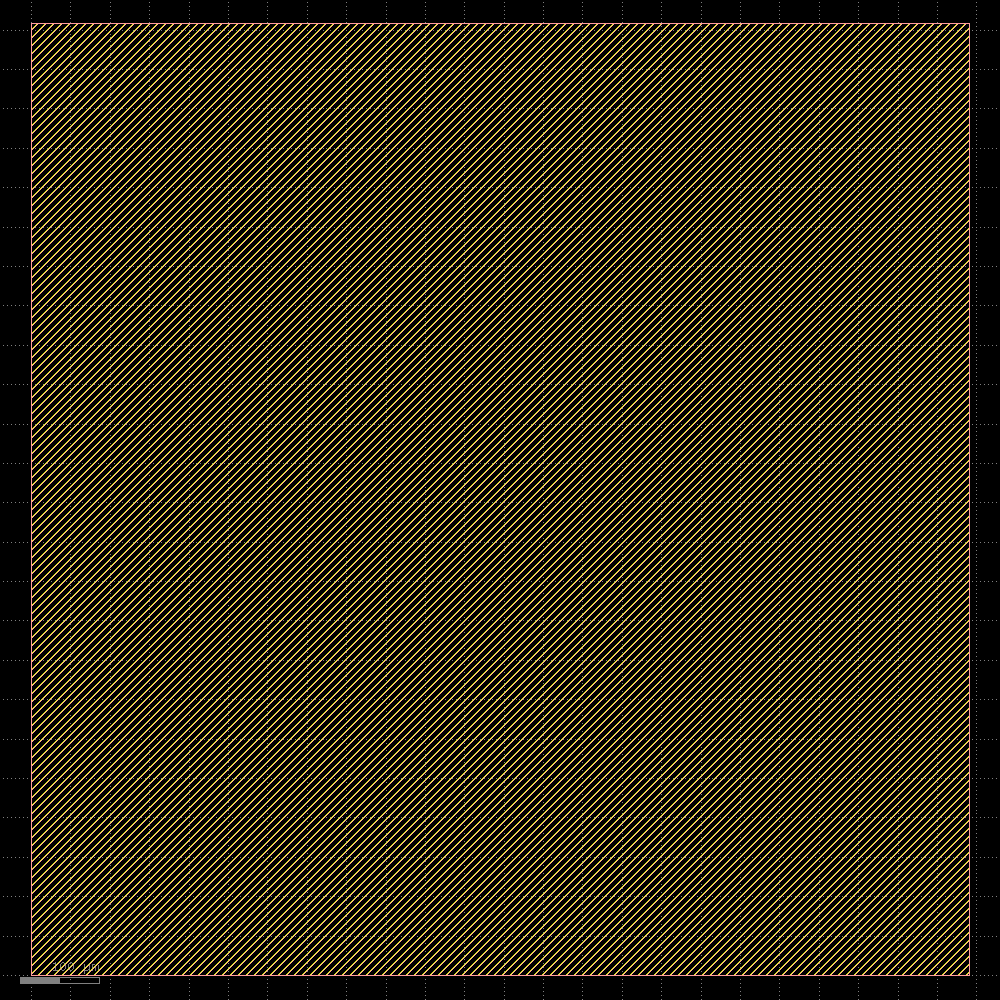

In [18]:
display(floorplan)

### Tap/Endcap Cell Insertion

This places two kinds of cells on the floorplan:

* End cap/boundary cells: Added at the beginning and end of each row. True to
  their name, they "cap off" the core area of a design.
* Tap cells: Placed in a polka dot-ish fashion across the rows. Tap cells
  connect VDD to the nwell and the psubstrate to VSS, which the majority of cells
  do not do themselves to save area- but if you go long enough without one such
  connection you end up with the cell "latching-up"; i.e.; refusing to switch
  back to LO from HI.

  There is a maximum distance between tap cells enforced as part of every
  foundry process.

In [19]:
TapEndcapInsertion = Step.factory.get("OpenROAD.TapEndcapInsertion")

tdi = TapEndcapInsertion(state_in=floorplan.state_out)
tdi.start()

─────────────────────────────────────────────── Tap/Decap Insertion ───────────────────────────────────────────────

[06:30:42] VERBOSE  Running 'OpenROAD.TapEndcapInsertion'…                                             ]8;id=845566;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=682053;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:42] VERBOSE  Logging subprocess to                                                              ]8;id=388797;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=759465;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=630919;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\openlane_run/]8;;\]8;id=543647;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\3]8;;\]8;id=630919;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log]8;;\…                    

Reading OpenROAD database at '/content/openlane_run/2-openroad-floorplan/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO TAP-0004] Inserted 600 endcaps.

[INFO TAP-0005] Inserted 8913 tapcells.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.odb'…

Writing netlist to '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 26298, 'design__instance__area': 735003, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 260, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 26298, 'design__instance__area__stdcell': 735003, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.530959'), 'design__instance__utilization__stdcell': Decimal('0.530959')}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:30:46] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=550892;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=368181;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:46] VERBOSE  Logging subprocess to ]8;id=842631;file:///tmp/openlane_klayout_tmp_0blvwj9i/klayout-render.log\..]8;;\]8;id=721545;file:///tmp/openlane_klayout_tmp_0blvwj9i/klayout-render.log\/tmp/openlane_klayout_tmp_0blvwj9i/]8;;\]8;id=729925;file:///tmp/openlane_klayout_tmp_0blvwj9i/klayout-render.log\klayout-render.log]8;;\…     ]8;id=783265;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=54003;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 3.74s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
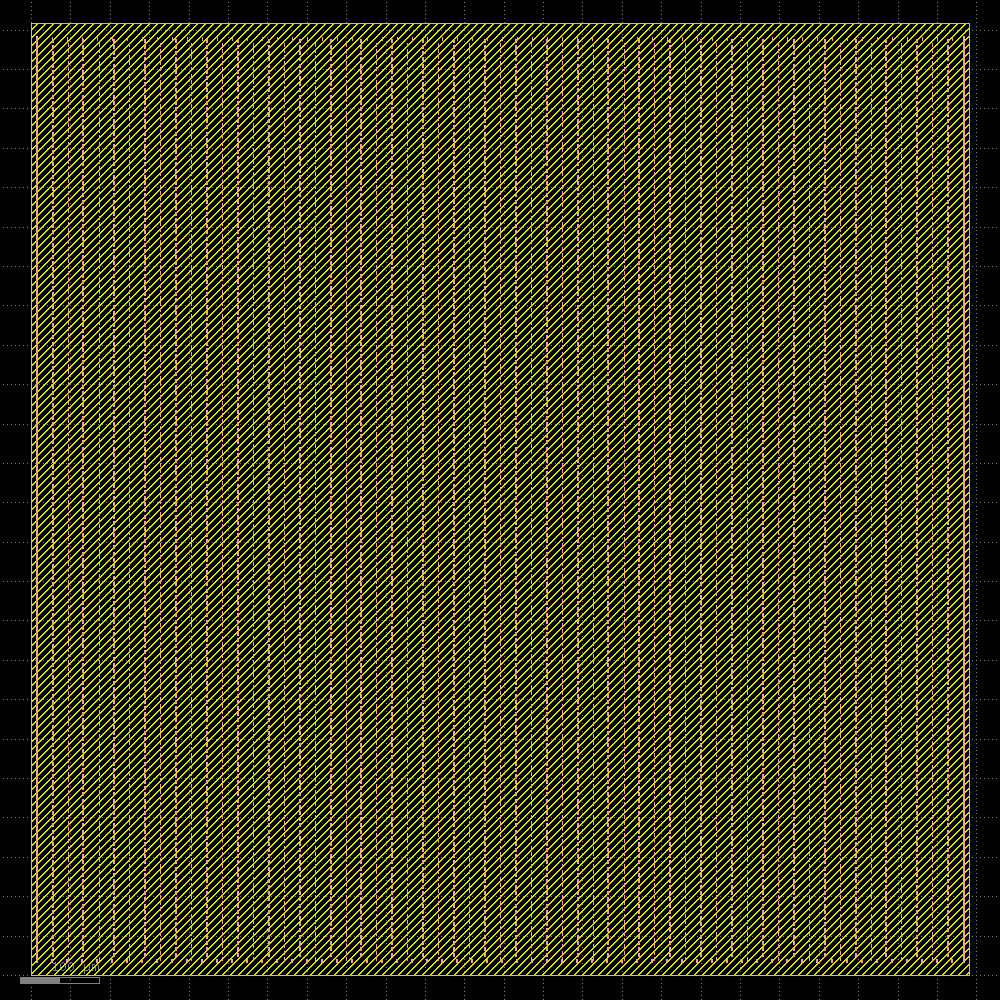

In [20]:
display(tdi)

### I/O Placement

This places metal pins at the edges of the design corresponding to the top level
inputs and outputs for your design. These pins act as the interface with other
designs when you integrate it with other designs.

In [21]:
IOPlacement = Step.factory.get("OpenROAD.IOPlacement")

ioplace = IOPlacement(state_in=tdi.state_out)
ioplace.start()

────────────────────────────────────────────────── I/O Placement ──────────────────────────────────────────────────

[06:30:48] VERBOSE  Running 'OpenROAD.IOPlacement'…                                                    ]8;id=191134;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=494292;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:48] VERBOSE  Logging subprocess to                                                              ]8;id=299478;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=964869;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=760762;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\openlane_run/]8;;\]8;id=843587;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\4]8;;\]8;id=760762;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\-openroad-ioplacement/openroad-ioplacement.log]8;;\…                                  

Reading OpenROAD database at '/content/openlane_run/3-openroad-tapendcapinsertion/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] place_pins args: -min_distance 3

Found 0 macro blocks.

[INFO PPL-0010] Tentative 0 to set up sections.

[INFO PPL-0001] Number of slots           1430

[INFO PPL-0002] Number of I/O             260

[INFO PPL-0003] Number of I/O w/sink      260

[INFO PPL-0004] Number of I/O w/o sink    0

[INFO PPL-0005] Slots per section         200

[INFO PPL-0006] Slots increase factor     0.01

[INFO PPL-0008] Successfully assigned pins to sections.

[INFO PPL-0012] I/O nets HPWL: 213503.94 um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/4-openroad-ioplacement/qft3_top.odb'…

Writing netlist to '/content/openlane_run/4-openroad-ioplacement/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/4-openroad-ioplacement/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/4-openroad-ioplacement/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/4-openroad-ioplacement/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/4-openroad-ioplacement/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/4-openroad-ioplacement/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/4-openroad-ioplacement/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/4-openroad-ioplacement/qft3_top.odb'), 'sdc': Path('/content/openlane_run/4-openroad-ioplacement/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 26298, 'design__instance__area': 735003, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 260, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 26298, 'design__instance__area__stdcell': 735003, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.530959'), 'design__instance__utilization__stdcell': Decimal('0.530959'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:30:51] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=450027;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=804063;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:51] VERBOSE  Logging subprocess to ]8;id=520606;file:///tmp/openlane_klayout_tmp_8dtmxjaz/klayout-render.log\..]8;;\]8;id=675289;file:///tmp/openlane_klayout_tmp_8dtmxjaz/klayout-render.log\/tmp/openlane_klayout_tmp_8dtmxjaz/]8;;\]8;id=219288;file:///tmp/openlane_klayout_tmp_8dtmxjaz/klayout-render.log\klayout-render.log]8;;\…     ]8;id=203053;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=378718;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 3.45s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
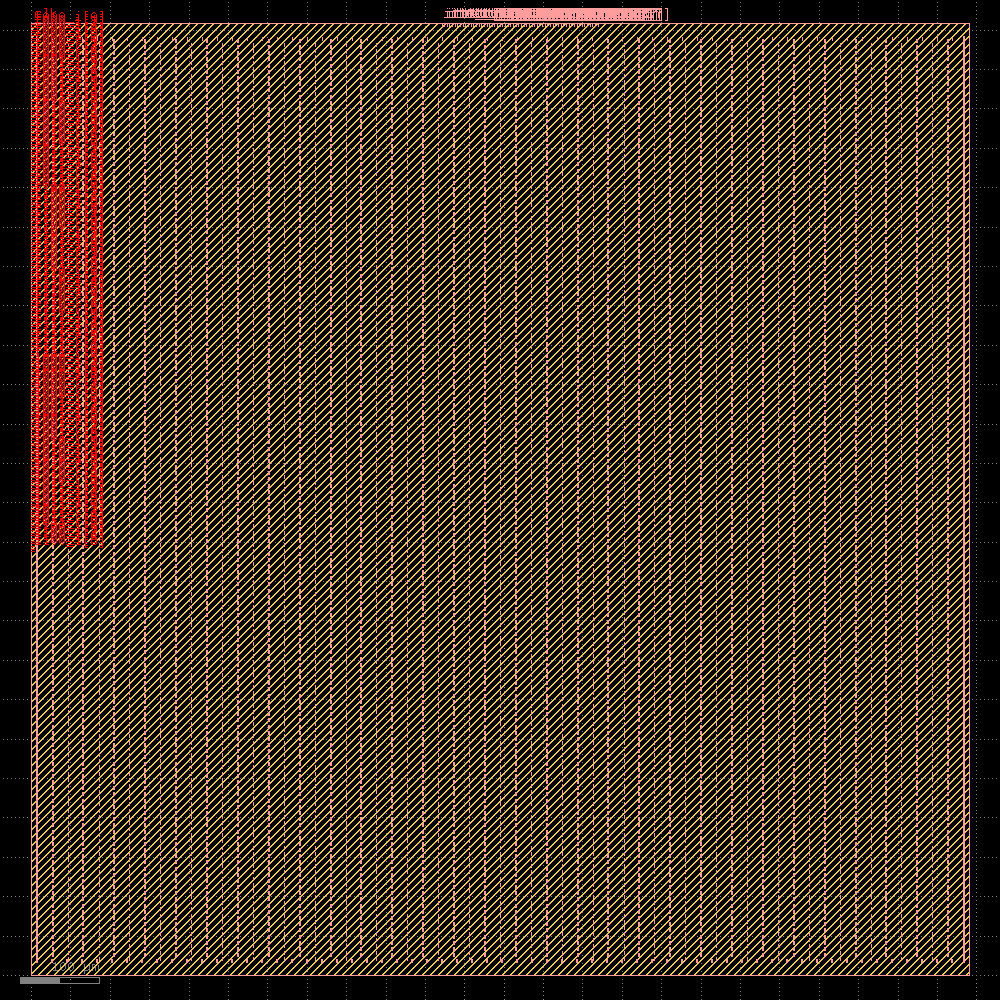

In [22]:
display(ioplace)

### Generating the Power Distribution Network (PDN)

This creates the power distribution network for your design, which is essentially
a plaid pattern of horizontal and vertical "straps" across the design that is
then connected to the rails' VDD and VSS (via the tap cells.)

You can find an explanation of how the power distribution network works at this
link: https://openlane2.readthedocs.io/en/latest/usage/hardening_macros.html#pdn-generation

While we typically don't need to mess with the PDN too much, the SPM is a small
design, so we're going to need to make the plaid pattern formed by the PDN a bit
smaller.

In [23]:
GeneratePDN = Step.factory.get("OpenROAD.GeneratePDN")

pdn = GeneratePDN(
    state_in=ioplace.state_out,
    FP_PDN_VWIDTH=2,
    FP_PDN_HWIDTH=2,
    FP_PDN_VPITCH=30,
    FP_PDN_HPITCH=30,
)
pdn.start()

────────────────────────────────────── Power Distribution Network Generation ──────────────────────────────────────

[06:30:53] VERBOSE  Running 'OpenROAD.GeneratePDN'…                                                    ]8;id=173561;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=285604;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:30:53] INFO     'FP_PDN_CFG' not explicitly set, setting it to                                 ]8;id=155873;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=12909;file:///content/openlane_ipynb/openlane/steps/openroad.py#1174\1174]8;;\
                    /content/openlane_ipynb/openlane/scripts/openroad/common/pdn_cfg.tcl…                          

[06:30:53] VERBOSE  Logging subprocess to                                                              ]8;id=437443;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=103168;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=188459;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\openlane_run/]8;;\]8;id=287825;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\5]8;;\]8;id=188459;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\-openroad-generatepdn/openroad-generatepdn.log]8;;\…                                  

Reading OpenROAD database at '/content/openlane_run/4-openroad-ioplacement/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting global connections...

[INFO PDN-0001] Inserting grid: stdcell_grid

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/5-openroad-generatepdn/qft3_top.odb'…

Writing netlist to '/content/openlane_run/5-openroad-generatepdn/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/5-openroad-generatepdn/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/5-openroad-generatepdn/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/5-openroad-generatepdn/qft3_top.sdc'…

[INFO PSM-0040] All shapes on net VDD are connected.

[INFO PSM-0040] All shapes on net VSS are connected.

{'nl': Path('/content/openlane_run/5-openroad-generatepdn/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/5-openroad-generatepdn/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/5-openroad-generatepdn/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/5-openroad-generatepdn/qft3_top.odb'), 'sdc': Path('/content/openlane_run/5-openroad-generatepdn/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 26298, 'design__instance__area': 735003, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 26298, 'design__instance__area__stdcell': 735003, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.530959'), 'design__instance__utilization__stdcell': Decimal('0.530959'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:31:02] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=826179;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=348374;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:31:02] VERBOSE  Logging subprocess to ]8;id=865259;file:///tmp/openlane_klayout_tmp_umlu37fn/klayout-render.log\..]8;;\]8;id=917804;file:///tmp/openlane_klayout_tmp_umlu37fn/klayout-render.log\/tmp/openlane_klayout_tmp_umlu37fn/]8;;\]8;id=774178;file:///tmp/openlane_klayout_tmp_umlu37fn/klayout-render.log\klayout-render.log]8;;\…     ]8;id=636021;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=37969;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 8.99s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
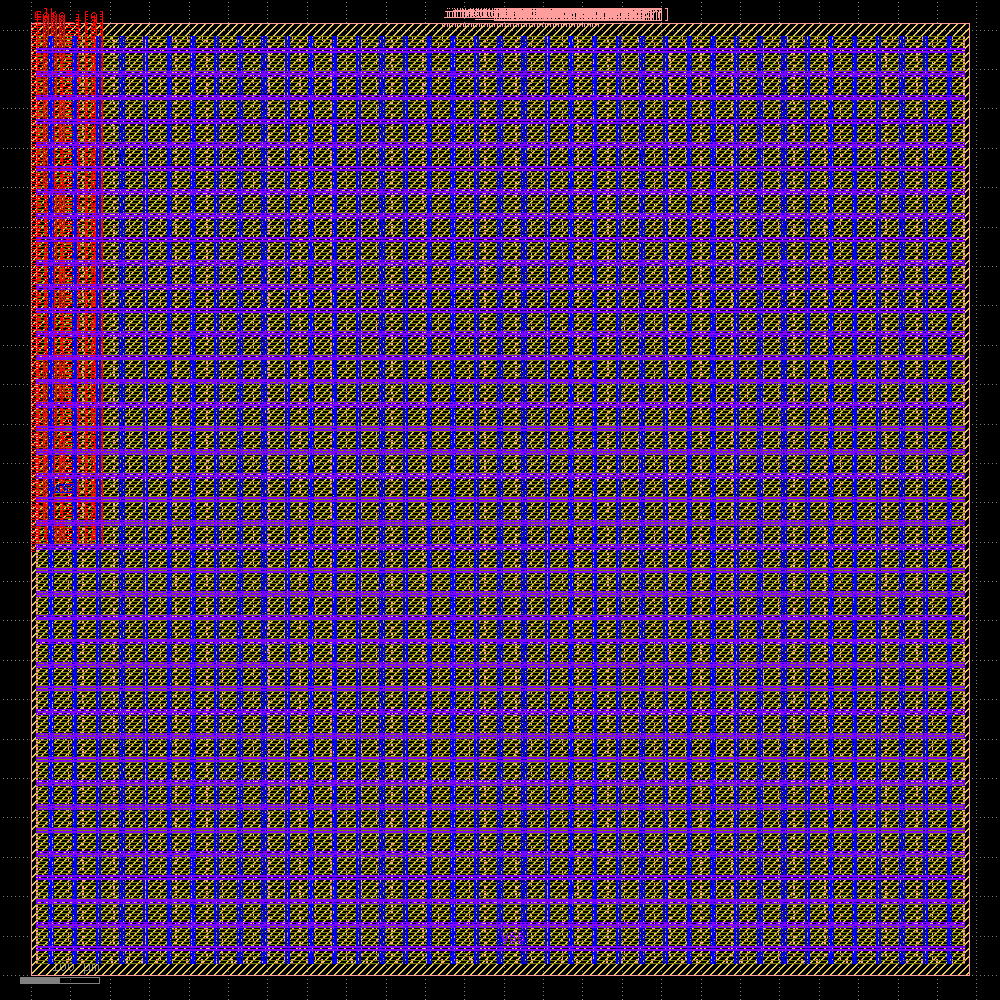

In [24]:
display(pdn)

### Global Placement

Global Placement is deciding on a fuzzy, non-final location for each of the cells,
with the aim of minimizing the distance between cells that are connected
together (more specifically, the total length of the not-yet-created wires that
will connect them).

As you will see in the `.display()` in the second cell below, the placement is
considered "illegal", i.e., not properly aligned with the cell placement grid.
This is addressed by "Detailed Placement", also referred to as "placement
legalization", which is the next step.

In [25]:
GlobalPlacement = Step.factory.get("OpenROAD.GlobalPlacement")

gpl = GlobalPlacement(state_in=pdn.state_out)
gpl.start()

──────────────────────────────────────────────── Global Placement ─────────────────────────────────────────────────

[06:31:04] VERBOSE  Running 'OpenROAD.GlobalPlacement'…                                                ]8;id=45986;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=418226;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:31:04] INFO     'PL_TARGET_DENSITY_PCT' not explicitly set, using dynamically calculated       ]8;id=127035;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=8556;file:///content/openlane_ipynb/openlane/steps/openroad.py#1260\1260]8;;\
                    target density: 63.095900…                                                                     

[06:31:04] VERBOSE  Logging subprocess to                                                              ]8;id=780440;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=748055;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=470689;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\openlane_run/]8;;\]8;id=989596;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\6]8;;\]8;id=470689;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\-openroad-globalplacement/openroad-globalplacement.log]8;;\…                          

Reading OpenROAD database at '/content/openlane_run/5-openroad-generatepdn/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Setting signal min routing layer to: Metal2 and clock min routing layer to Metal2.

[INFO] Setting signal max routing layer to: Metal5 and clock max routing layer to Metal5.

[INFO GPL-0002] DBU: 2000

[INFO GPL-0003] SiteSize: (  0.560  3.920 ) um

[INFO GPL-0004] CoreBBox: (  6.720 15.680 ) ( 1183.840 1191.680 ) um

[INFO GPL-0006] NumInstances:             25698

[INFO GPL-0007] NumPlaceInstances:        16785

[INFO GPL-0008] NumFixedInstances:         8913

[INFO GPL-0009] NumDummyInstances:            0

[INFO GPL-0010] NumNets:                  16916

[INFO GPL-0011] NumPins:                  60402

[INFO GPL-0012] DieBBox:  (  0.000  0.000 ) ( 1190.925 1208.845 ) um

[INFO GPL-0013] CoreBBox: (  6.720 15.680 ) ( 1183.840 1191.680 ) um

[INFO GPL-0016] CoreArea:            1384293.120 um^2

[INFO GPL-0017] NonPlaceInstsArea:    39131.635 um^2

[INFO GPL-0018] PlaceInstsArea:      693237.574 um^2

[INFO GPL-0019] Util:                    51.536 %

[INFO GPL-0020] StdInstsArea:        693237.574 um^2

[INFO GPL-0021] MacroInstsArea:           0.000 um^2

[InitialPlace]  Iter: 1 CG residual: 0.00401590 HPWL: 1121126040

[InitialPlace]  Iter: 2 CG residual: 0.00294049 HPWL: 996241548

[InitialPlace]  Iter: 3 CG residual: 0.00426177 HPWL: 996163440

[InitialPlace]  Iter: 4 CG residual: 0.00444473 HPWL: 1000968261

[InitialPlace]  Iter: 5 CG residual: 0.00342713 HPWL: 1004465853

[InitialPlace]  Iter: 6 CG residual: 0.00318186 HPWL: 1014671177

[InitialPlace]  Iter: 7 CG residual: 0.00414138 HPWL: 1022371340

[InitialPlace]  Iter: 8 CG residual: 0.00368633 HPWL: 1025221599

[InitialPlace]  Iter: 9 CG residual: 0.00346625 HPWL: 1025419631

[InitialPlace]  Iter: 10 CG residual: 0.00300850 HPWL: 1025597603

[InitialPlace]  Iter: 11 CG residual: 0.00228084 HPWL: 1028612315

[InitialPlace]  Iter: 12 CG residual: 0.00192056 HPWL: 1029559692

[InitialPlace]  Iter: 13 CG residual: 0.00137599 HPWL: 1029204170

[InitialPlace]  Iter: 14 CG residual: 0.00112744 HPWL: 1028525952

[InitialPlace]  Iter: 15 CG residual: 0.00071393 HPWL: 1027671206

[InitialPlace]  Iter: 16 CG residual: 0.00086907 HPWL: 1025397845

[InitialPlace]  Iter: 17 CG residual: 0.00066650 HPWL: 1023349852

[InitialPlace]  Iter: 18 CG residual: 0.00049514 HPWL: 1021307059

[InitialPlace]  Iter: 19 CG residual: 0.00064064 HPWL: 1019371763

[InitialPlace]  Iter: 20 CG residual: 0.00213950 HPWL: 1017979648

[INFO GPL-0031] FillerInit:NumGCells:     20556

[INFO GPL-0032] FillerInit:NumGNets:      16916

[INFO GPL-0033] FillerInit:NumGPins:      60402

[INFO GPL-0023] TargetDensity:            0.631

[INFO GPL-0024] AvrgPlaceInstArea:       41.301 um^2

[INFO GPL-0025] IdealBinArea:            65.458 um^2

[INFO GPL-0026] IdealBinCnt:              21147

[INFO GPL-0027] TotalBinArea:        1384293.120 um^2

[INFO GPL-0028] BinCnt:       128    128

[INFO GPL-0029] BinSize: (  9.197  9.188 )

[INFO GPL-0030] NumBins: 16384

[NesterovSolve] Iter:    1 overflow: 0.967 HPWL: 483581817

[NesterovSolve] Iter:   10 overflow: 0.944 HPWL: 563760938

[NesterovSolve] Iter:   20 overflow: 0.930 HPWL: 586972847

[NesterovSolve] Iter:   30 overflow: 0.921 HPWL: 588849287

[NesterovSolve] Iter:   40 overflow: 0.919 HPWL: 585273658

[NesterovSolve] Iter:   50 overflow: 0.918 HPWL: 583170871

[NesterovSolve] Iter:   60 overflow: 0.918 HPWL: 580592010

[NesterovSolve] Iter:   70 overflow: 0.924 HPWL: 579060297

[NesterovSolve] Iter:   80 overflow: 0.928 HPWL: 578942728

[NesterovSolve] Iter:   90 overflow: 0.930 HPWL: 580237089

[NesterovSolve] Iter:  100 overflow: 0.933 HPWL: 582773290

[NesterovSolve] Iter:  110 overflow: 0.934 HPWL: 584798133

[NesterovSolve] Iter:  120 overflow: 0.933 HPWL: 587374074

[NesterovSolve] Iter:  130 overflow: 0.930 HPWL: 591877741

[NesterovSolve] Iter:  140 overflow: 0.923 HPWL: 600006041

[NesterovSolve] Iter:  150 overflow: 0.910 HPWL: 613602664

[NesterovSolve] Iter:  160 overflow: 0.889 HPWL: 634544598

[NesterovSolve] Iter:  170 overflow: 0.857 HPWL: 665768487

[NesterovSolve] Iter:  180 overflow: 0.813 HPWL: 712817373

[INFO GPL-0100] worst slack -5.32e-08

[INFO GPL-0103] Weighted 1691 nets.

[NesterovSolve] Iter:  190 overflow: 0.761 HPWL: 778652916

[NesterovSolve] Iter:  200 overflow: 0.712 HPWL: 837571324

[NesterovSolve] Iter:  210 overflow: 0.665 HPWL: 898176729

[INFO GPL-0100] worst slack -5.53e-08

[INFO GPL-0103] Weighted 1691 nets.

[NesterovSolve] Iter:  220 overflow: 0.618 HPWL: 958421154

[NesterovSolve] Snapshot saved at iter = 224

[NesterovSolve] Iter:  230 overflow: 0.575 HPWL: 1009455050

[NesterovSolve] Iter:  240 overflow: 0.534 HPWL: 1050537863

[NesterovSolve] Iter:  250 overflow: 0.498 HPWL: 1058431543

[INFO GPL-0100] worst slack -5.71e-08

[INFO GPL-0103] Weighted 1691 nets.

[NesterovSolve] Iter:  260 overflow: 0.467 HPWL: 1044360087

[NesterovSolve] Iter:  270 overflow: 0.439 HPWL: 1053807957

[NesterovSolve] Iter:  280 overflow: 0.417 HPWL: 1055224358

[NesterovSolve] Iter:  290 overflow: 0.391 HPWL: 1030171875

[NesterovSolve] Iter:  300 overflow: 0.343 HPWL: 1029253189

[NesterovSolve] Iter:  310 overflow: 0.319 HPWL: 1030093738

[NesterovSolve] Iter:  320 overflow: 0.306 HPWL: 1018038781

[NesterovSolve] Iter:  330 overflow: 0.285 HPWL: 1012293533

[INFO GPL-0100] worst slack -6.01e-08

[INFO GPL-0103] Weighted 1691 nets.

[NesterovSolve] Iter:  340 overflow: 0.256 HPWL: 1011516577

[NesterovSolve] Iter:  350 overflow: 0.235 HPWL: 1007711965

[NesterovSolve] Iter:  360 overflow: 0.213 HPWL: 1004003024

[INFO GPL-0100] worst slack -6.09e-08

[INFO GPL-0103] Weighted 1691 nets.

[INFO GPL-0075] Routability numCall: 1 inflationIterCnt: 1 bloatIterCnt: 0

[INFO GPL-0036] TileBBox: (    0    0 ) ( 16800 16800 ) DBU

[INFO GPL-0038] TileCnt:     141  143

[INFO GPL-0039] numRoutingLayers: 5

[INFO GPL-0040] NumTiles: 20163

[INFO GPL-0063] TotalRouteOverflowH2: 0.14285707473754883

[INFO GPL-0064] TotalRouteOverflowV2: 0

[INFO GPL-0065] OverflowTileCnt2: 2

[INFO GPL-0066] 0.5%RC: 0.9918

[INFO GPL-0067] 1.0%RC: 0.9546

[INFO GPL-0068] 2.0%RC: 0.9076

[INFO GPL-0069] 5.0%RC: 0.8263

[INFO GPL-0070] 0.5rcK: 1

[INFO GPL-0071] 1.0rcK: 1

[INFO GPL-0072] 2.0rcK: 0

[INFO GPL-0073] 5.0rcK: 0

[INFO GPL-0074] FinalRC: 0.9732

[INFO GPL-0077] FinalRC lower than targetRC(1), routability not needed.

[NesterovSolve] Iter:  370 overflow: 0.188 HPWL: 1001680586

[NesterovSolve] Iter:  380 overflow: 0.168 HPWL: 1000907594

[NesterovSolve] Iter:  390 overflow: 0.146 HPWL: 1001093620

[INFO GPL-0100] worst slack -6.13e-08

[INFO GPL-0103] Weighted 1689 nets.

[NesterovSolve] Iter:  400 overflow: 0.128 HPWL: 1001112787

[NesterovSolve] Iter:  410 overflow: 0.112 HPWL: 1001407125

[NesterovSolve] Iter:  420 overflow: 0.099 HPWL: 1002343950

[NesterovSolve] Finished with Overflow: 0.099361

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/6-openroad-globalplacement/qft3_top.odb'…

Writing netlist to '/content/openlane_run/6-openroad-globalplacement/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/6-openroad-globalplacement/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/6-openroad-globalplacement/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/6-openroad-globalplacement/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/6-openroad-globalplacement/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/6-openroad-globalplacement/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/6-openroad-globalplacement/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/6-openroad-globalplacement/qft3_top.odb'), 'sdc': Path('/content/openlane_run/6-openroad-globalplacement/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 26298, 'design__instance__area': 735003, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 26298, 'design__instance__area__stdcell': 735003, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.530959'), 'design__instance__utilization__stdcell': Decimal('0.530959'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:33:24] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=923931;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=778654;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:33:24] VERBOSE  Logging subprocess to ]8;id=298445;file:///tmp/openlane_klayout_tmp_n2oqs5bj/klayout-render.log\..]8;;\]8;id=840306;file:///tmp/openlane_klayout_tmp_n2oqs5bj/klayout-render.log\/tmp/openlane_klayout_tmp_n2oqs5bj/]8;;\]8;id=530360;file:///tmp/openlane_klayout_tmp_n2oqs5bj/klayout-render.log\klayout-render.log]8;;\…     ]8;id=251030;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=33522;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 140.18s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
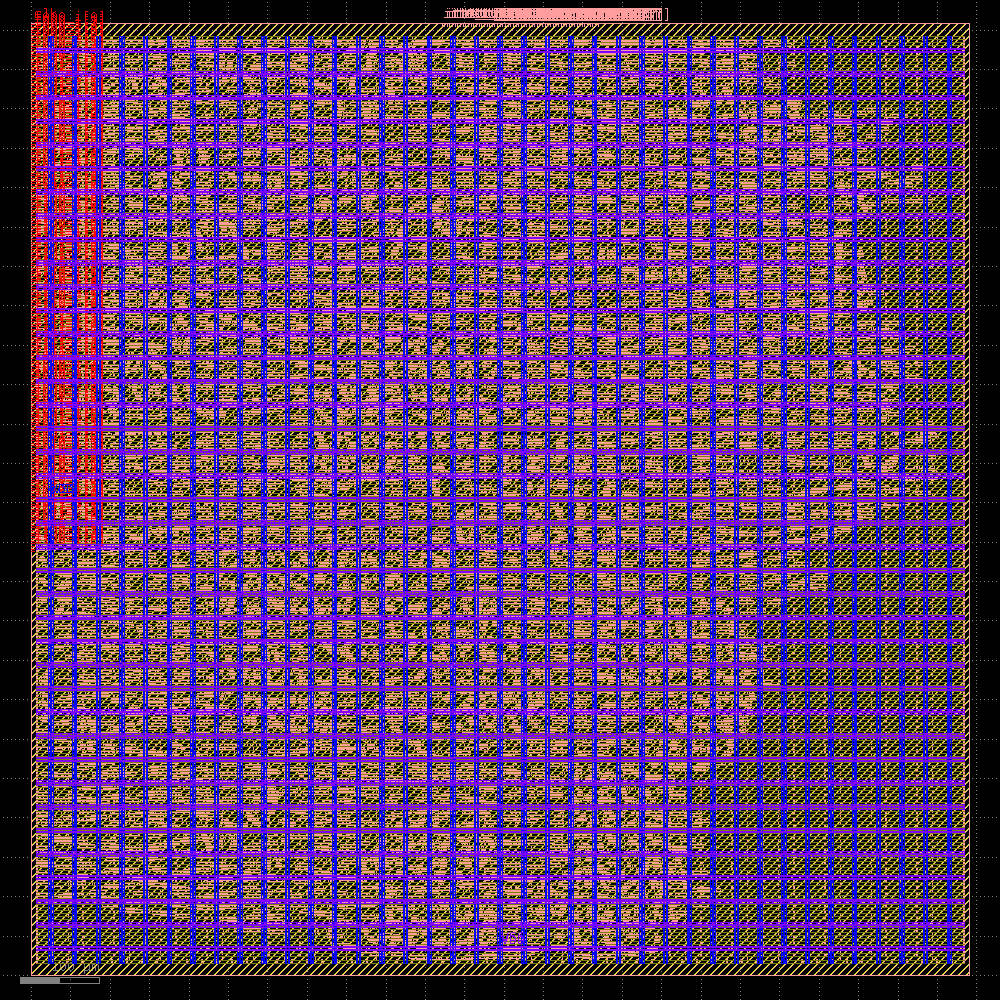

In [26]:
display(gpl)

### Detailed Placement

This aligns the fuzzy placement from before with the grid, "legalizing" it.

In [27]:
DetailedPlacement = Step.factory.get("OpenROAD.DetailedPlacement")

dpl = DetailedPlacement(state_in=gpl.state_out)
dpl.start()

─────────────────────────────────────────────── Detailed Placement ────────────────────────────────────────────────

[06:33:27] VERBOSE  Running 'OpenROAD.DetailedPlacement'…                                              ]8;id=788198;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=172819;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:33:27] VERBOSE  Logging subprocess to                                                              ]8;id=388020;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=376300;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=918704;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\openlane_run/]8;;\]8;id=813550;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\7]8;;\]8;id=918704;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\-openroad-detailedplacement/openroad-detailedplacement.log]8;;\…                      

Reading OpenROAD database at '/content/openlane_run/6-openroad-globalplacement/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Placement Analysis

---------------------------------

total displacement      84893.5 u

average displacement        3.2 u

max displacement          153.4 u

original HPWL          501610.7 u

legalized HPWL         581167.6 u

delta HPWL                   16 %

[INFO DPL-0020] Mirrored 6330 instances

[INFO DPL-0021] HPWL before          581167.6 u

[INFO DPL-0022] HPWL after           546467.4 u

[INFO DPL-0023] HPWL delta               -6.0 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/7-openroad-detailedplacement/qft3_top.odb'…

Writing netlist to '/content/openlane_run/7-openroad-detailedplacement/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/7-openroad-detailedplacement/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/7-openroad-detailedplacement/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/7-openroad-detailedplacement/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/7-openroad-detailedplacement/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/7-openroad-detailedplacement/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/7-openroad-detailedplacement/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/7-openroad-detailedplacement/qft3_top.odb'), 'sdc': Path('/content/openlane_run/7-openroad-detailedplacement/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 26298, 'design__instance__area': 735003, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 26298, 'design__instance__area__stdcell': 735003, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.530959'), 'design__instance__utilization__stdcell': Decimal('0.530959'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('84893.5'), 'design__instance__displacement__mean': Decimal('3.228'), 'design__instance__displacement__max': Decimal('153.383'), 'route__wirelength__estimated': 581168, 'design__violations': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:33:32] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=732393;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=237825;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:33:32] VERBOSE  Logging subprocess to ]8;id=619355;file:///tmp/openlane_klayout_tmp_5_x1qebt/klayout-render.log\..]8;;\]8;id=928571;file:///tmp/openlane_klayout_tmp_5_x1qebt/klayout-render.log\/tmp/openlane_klayout_tmp_5_x1qebt/]8;;\]8;id=432927;file:///tmp/openlane_klayout_tmp_5_x1qebt/klayout-render.log\klayout-render.log]8;;\…     ]8;id=793086;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=243028;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 4.95s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
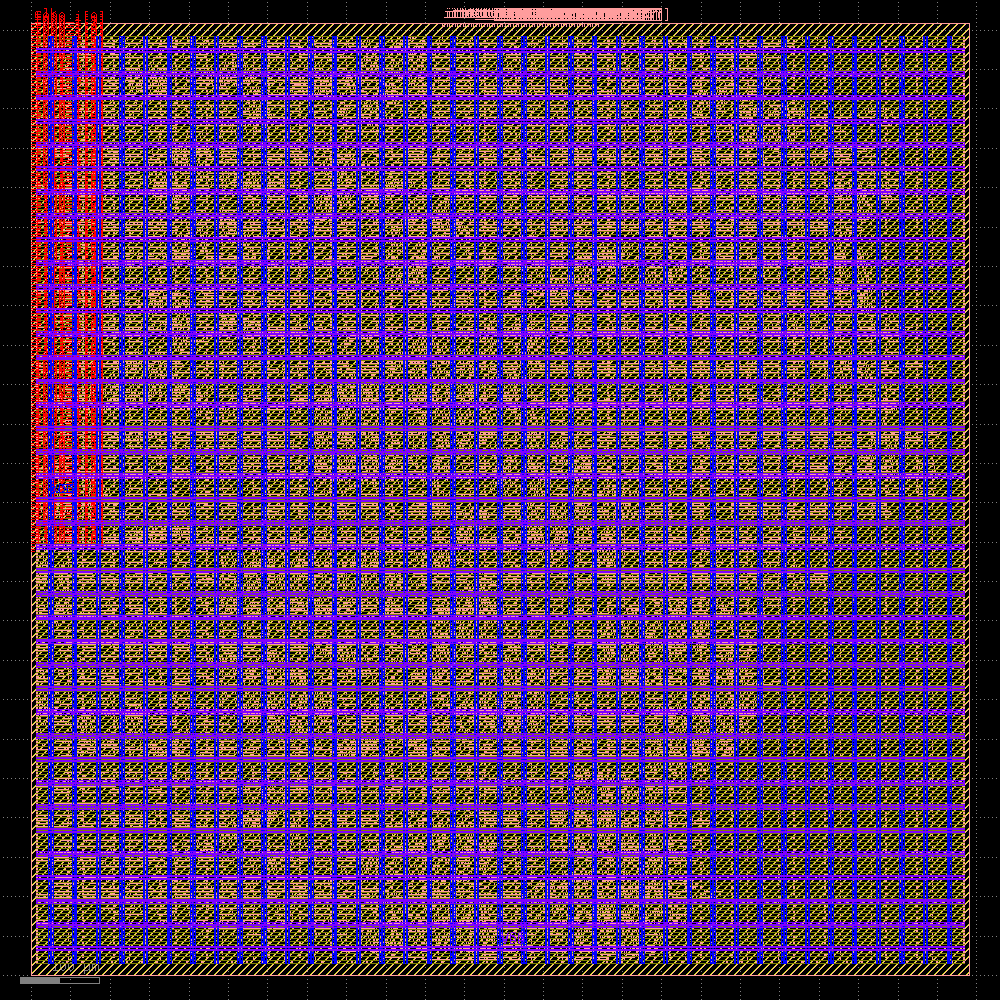

In [28]:
display(dpl)

### Clock Tree Synthesis (CTS)

With the cells now having a final placement, we can go ahead and create what
is known as the clock tree, i.e., the hierarchical set of buffers used
for clock signal to minimize what is known as "clock skew"- variable delay
of the clock cycle from register to register because of factors such as metal
wire length, clock load (number of gates connected to the same clock buffer,)
et cetera.

The CTS step creates the cells and places the between the gaps in the detailed
placement above.

In [29]:
CTS = Step.factory.get("OpenROAD.CTS")

cts = CTS(state_in=dpl.state_out)
cts.start()

────────────────────────────────────────────── Clock Tree Synthesis ───────────────────────────────────────────────

[06:33:35] VERBOSE  Running 'OpenROAD.CTS'…                                                            ]8;id=894958;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=815011;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:33:35] VERBOSE  Logging subprocess to ]8;id=419227;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\openlane_run/]8;;\]8;id=942220;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\8]8;;\]8;id=419227;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\-openroad-cts/openroad-cts.log]8;;\…                ]8;id=949374;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=156104;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading timing models for corner nom_ff_n40C_5v50…

Reading timing library for the 'nom_ff_n40C_5v50' corner at                                                        
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__ff_n40C_5v50.lib'…

Reading timing models for corner nom_tt_025C_5v00…

Reading timing library for the 'nom_tt_025C_5v00' corner at                                                        
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading timing models for corner nom_ss_125C_4v50…

Reading timing library for the 'nom_ss_125C_4v50' corner at                                                        
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__ss_125C_4v50.lib'…

Reading OpenROAD database at '/content/openlane_run/7-openroad-detailedplacement/qft3_top.odb'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Configuring cts characterization…

[INFO] Performing clock tree synthesis…

[INFO] Looking for the following net(s): clk

[INFO] Running Clock Tree Synthesis…

[INFO CTS-0050] Root buffer is gf180mcu_fd_sc_mcu7t5v0__clkbuf_16.

[INFO CTS-0051] Sink buffer is gf180mcu_fd_sc_mcu7t5v0__clkbuf_8.

[INFO CTS-0052] The following clock buffers will be used for CTS:

gf180mcu_fd_sc_mcu7t5v0__clkbuf_2

gf180mcu_fd_sc_mcu7t5v0__clkbuf_4

gf180mcu_fd_sc_mcu7t5v0__clkbuf_8

[INFO CTS-0049] Characterization buffer is gf180mcu_fd_sc_mcu7t5v0__clkbuf_8.

[INFO CTS-0007] Net "clk" found for clock "clk".

[INFO CTS-0010]  Clock net "clk" has 6651 sinks.

[INFO CTS-0008] TritonCTS found 1 clock nets.

[INFO CTS-0097] Characterization used 3 buffer(s) types.

[INFO CTS-0200] 0 placement blockages have been identified.

[INFO CTS-0201] 0 placed hard macros will be treated like blockages.

[INFO CTS-0027] Generating H-Tree topology for net clk.

[INFO CTS-0028]  Total number of sinks: 6651.

[INFO CTS-0029]  Sinks will be clustered in groups of up to 25 and with maximum cluster diameter of 50.0 um.

[INFO CTS-0030]  Number of static layers: 0.

[INFO CTS-0020]  Wire segment unit: 39200  dbu (19 um).

[INFO CTS-0204] A clustering solution was found from clustering size of 25 and clustering diameter of 50.

[INFO CTS-0205] Better solution may be possible if either -sink_clustering_size, -sink_clustering_max_diameter, or 
both options are omitted to enable automatic clustering.

[INFO CTS-0019]  Total number of sinks after clustering: 996.

[INFO CTS-0024]  Normalized sink region: [(0.690051, 1.26), (58.2478, 60.1667)].

[INFO CTS-0025]     Width:  57.5578.

[INFO CTS-0026]     Height: 58.9067.

Level 1

Direction: Vertical

Sinks per sub-region: 498

Sub-region size: 57.5578 X 29.4533

[INFO CTS-0034]     Segment length (rounded): 14.

Level 2

Direction: Horizontal

Sinks per sub-region: 249

Sub-region size: 28.7789 X 29.4533

[INFO CTS-0034]     Segment length (rounded): 14.

Level 3

Direction: Vertical

Sinks per sub-region: 125

Sub-region size: 28.7789 X 14.7267

[INFO CTS-0034]     Segment length (rounded): 8.

Level 4

Direction: Horizontal

Sinks per sub-region: 63

Sub-region size: 14.3894 X 14.7267

[INFO CTS-0034]     Segment length (rounded): 8.

Level 5

Direction: Vertical

Sinks per sub-region: 32

Sub-region size: 14.3894 X 7.3633

[INFO CTS-0034]     Segment length (rounded): 4.

Level 6

Direction: Horizontal

Sinks per sub-region: 16

Sub-region size: 7.1947 X 7.3633

[INFO CTS-0034]     Segment length (rounded): 4.

Level 7

Direction: Vertical

Sinks per sub-region: 8

Sub-region size: 7.1947 X 3.6817

[INFO CTS-0034]     Segment length (rounded): 2.

[INFO CTS-0032]  Stop criterion found. Max number of sinks is 15.

[INFO CTS-0035]  Number of sinks covered: 996.

[INFO CTS-0018]     Created 1177 clock buffers.

[INFO CTS-0012]     Minimum number of buffers in the clock path: 4.

[INFO CTS-0013]     Maximum number of buffers in the clock path: 5.

[INFO CTS-0015]     Created 1177 clock nets.

[INFO CTS-0016]     Fanout distribution for the current clock = 2:35, 3:72, 4:104, 5:140, 6:165, 7:155, 8:132,     
9:124, 10:91, 11:43, 12:28, 13:10, 14:5, 15:2, 16:1, 17:1..

[INFO CTS-0017]     Max level of the clock tree: 7.

[INFO CTS-0098] Clock net "clk"

[INFO CTS-0099]  Sinks 7531

[INFO CTS-0100]  Leaf buffers 980

[INFO CTS-0101]  Average sink wire length 2016.72 um

[INFO CTS-0102]  Path depth 4 - 5

[INFO CTS-0207]  Leaf load cells 880

[INFO] Repairing long wires on clock nets…

[INFO RSZ-0058] Using max wire length 10284um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/8-openroad-cts/qft3_top.odb'…

Writing netlist to '/content/openlane_run/8-openroad-cts/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/8-openroad-cts/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/8-openroad-cts/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/8-openroad-cts/qft3_top.sdc'…

[INFO] Legalizing…

Placement Analysis

---------------------------------

total displacement      29113.8 u

average displacement        1.0 u

max displacement           39.2 u

original HPWL          626403.2 u

legalized HPWL         684850.4 u

delta HPWL                    9 %

[INFO DPL-0020] Mirrored 7132 instances

[INFO DPL-0021] HPWL before          684850.4 u

[INFO DPL-0022] HPWL after           639477.1 u

[INFO DPL-0023] HPWL delta               -6.6 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/8-openroad-cts/qft3_top.odb'…

Writing netlist to '/content/openlane_run/8-openroad-cts/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/8-openroad-cts/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/8-openroad-cts/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/8-openroad-cts/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/8-openroad-cts/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/8-openroad-cts/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/8-openroad-cts/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/8-openroad-cts/qft3_top.odb'), 'sdc': Path('/content/openlane_run/8-openroad-cts/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'design__instance__displacement__mean': Decimal('1.0265'), 'design__instance__displacement__max': Decimal('39.2435'), 'route__wirelength__estimated': 684850, 'design__violations': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:34:24] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=101264;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=284763;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:34:24] VERBOSE  Logging subprocess to ]8;id=809340;file:///tmp/openlane_klayout_tmp_z2jk807c/klayout-render.log\..]8;;\]8;id=241063;file:///tmp/openlane_klayout_tmp_z2jk807c/klayout-render.log\/tmp/openlane_klayout_tmp_z2jk807c/]8;;\]8;id=885539;file:///tmp/openlane_klayout_tmp_z2jk807c/klayout-render.log\klayout-render.log]8;;\…     ]8;id=671413;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=408344;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 49.05s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
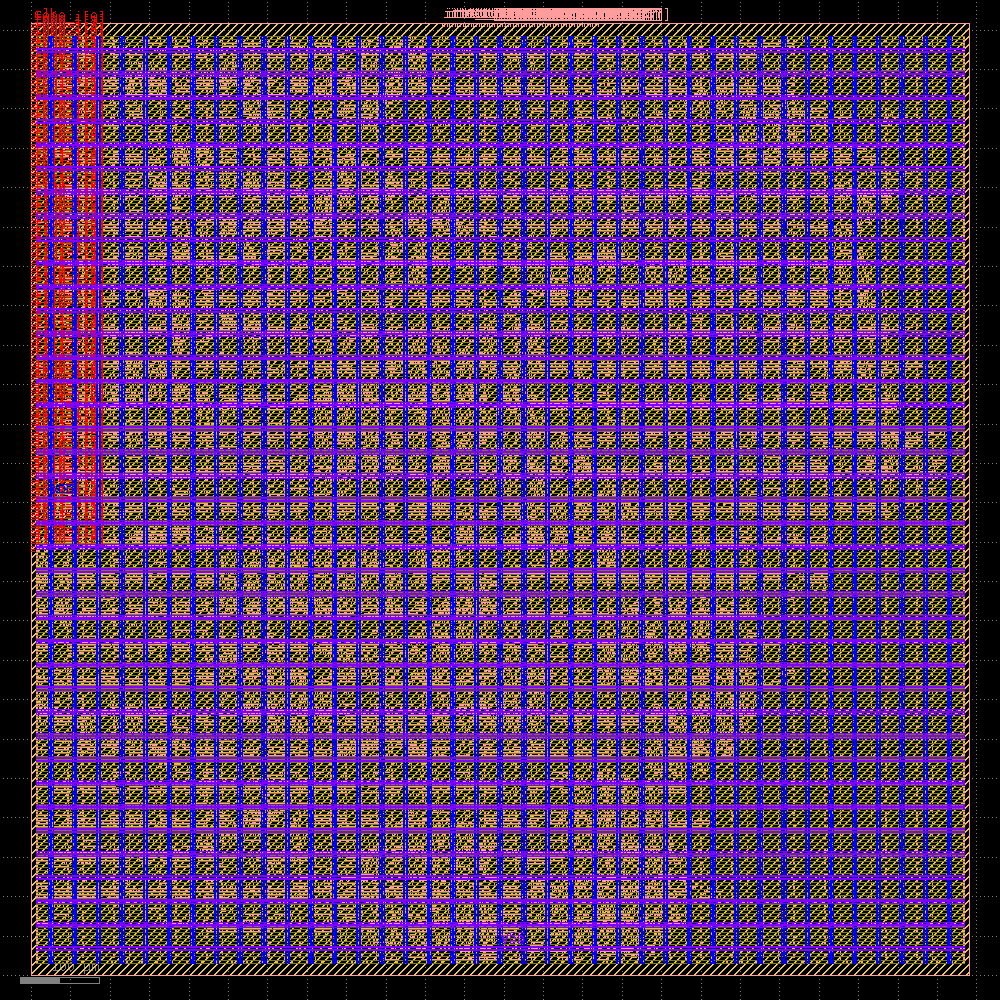

In [30]:
display(cts)

### Global Routing

Global routing "plans" the routes the wires between two gates (or gates and
I/O pins/the PDN) will take. The results of global routing (which are called
"routing guides") are stored in internal data structures and have no effect on
the actual design, so there is no `display()` statement.

In [31]:
GlobalRouting = Step.factory.get("OpenROAD.GlobalRouting")

grt = GlobalRouting(state_in=cts.state_out)
grt.start()

───────────────────────────────────────────────── Global Routing ──────────────────────────────────────────────────

[06:34:27] VERBOSE  Running 'OpenROAD.GlobalRouting'…                                                  ]8;id=341030;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=747214;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:34:27] VERBOSE  Logging subprocess to                                                              ]8;id=305621;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=843262;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=892189;file:///content/openlane_run/9-openroad-globalrouting/openroad-globalrouting.log\openlane_run/]8;;\]8;id=795579;file:///content/openlane_run/9-openroad-globalrouting/openroad-globalrouting.log\9]8;;\]8;id=892189;file:///content/openlane_run/9-openroad-globalrouting/openroad-globalrouting.log\-openroad-globalrouting/openroad-globalrouting.log]8;;\…                              

Reading OpenROAD database at '/content/openlane_run/8-openroad-cts/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting signal min routing layer to: Metal2 and clock min routing layer to Metal2.

[INFO] Setting signal max routing layer to: Metal5 and clock max routing layer to Metal5.

-congestion_iterations 50 -verbose

[INFO GRT-0020] Min routing layer: Metal2

[INFO GRT-0021] Max routing layer: Metal5

[INFO GRT-0022] Global adjustment: 30%

[INFO GRT-0023] Grid origin: (0, 0)

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0088] Layer Metal1  Track-Pitch = 0.5600  line-2-Via Pitch: 0.5450

[INFO GRT-0088] Layer Metal2  Track-Pitch = 0.5600  line-2-Via Pitch: 0.5800

[INFO GRT-0088] Layer Metal3  Track-Pitch = 0.5600  line-2-Via Pitch: 0.5800

[INFO GRT-0088] Layer Metal4  Track-Pitch = 0.5600  line-2-Via Pitch: 0.5800

[INFO GRT-0088] Layer Metal5  Track-Pitch = 0.9000  line-2-Via Pitch: 0.9600

[INFO GRT-0019] Found 1178 clock nets.

[INFO GRT-0001] Minimum degree: 2

[INFO GRT-0002] Maximum degree: 6652

[INFO GRT-0003] Macros: 0

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0004] Blockages: 0

[INFO GRT-0053] Routing resources analysis:

Routing      Original      Derated      Resource

Layer     Direction    Resources     Resources    Reduction (%)

---------------------------------------------------------------

Metal1     Horizontal          0             0          0.00%

Metal2     Vertical       284026        179700          36.73%

Metal3     Horizontal     284228        180746          36.41%

Metal4     Vertical       284026        153616          45.91%

Metal5     Horizontal     162557         79100          51.34%

---------------------------------------------------------------

[INFO GRT-0197] Via related to pin nodes: 108832

[INFO GRT-0198] Via related Steiner nodes: 1295

[INFO GRT-0199] Via filling finished.

[INFO GRT-0111] Final number of vias: 132081

[INFO GRT-0112] Final usage 3D: 486014

[INFO GRT-0096] Final congestion report:

Layer         Resource        Demand        Usage (%)    Max H / Max V / Total Overflow

---------------------------------------------------------------------------------------

Metal1               0             0            0.00%             0 /  0 /  0

Metal2          179700         45088           25.09%             0 /  0 /  0

Metal3          180746         42306           23.41%             0 /  0 /  0

Metal4          153616          1050            0.68%             0 /  0 /  0

Metal5           79100          1327            1.68%             0 /  0 /  0

---------------------------------------------------------------------------------------

Total           593162         89771           15.13%             0 /  0 /  0

[INFO GRT-0018] Total wirelength: 1158234 um

[INFO GRT-0014] Routed nets: 18093

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/9-openroad-globalrouting/qft3_top.odb'…

Writing layout to '/content/openlane_run/9-openroad-globalrouting/qft3_top.def'…

{'nl': Path('/content/openlane_run/8-openroad-cts/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/8-openroad-cts/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/9-openroad-globalrouting/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/9-openroad-globalrouting/qft3_top.odb'), 'sdc': Path('/content/openlane_run/8-openroad-cts/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'design__instance__displacement__mean': Decimal('1.0265'), 'design__instance__displacement__max': Decimal('39.2435'), 'route__wirelength__estimated': 684850, 'design__violations': 0, 'antenna__violating__nets': 34, 'antenna__violating__pins': 43}}

### Detailed Routing

Detailed routing uses the guides from Global Routing to actually create wires
on the metal layers and connect the gates, making the connections finally physical.

This is typically the longest step in the flow.

In [32]:
DetailedRouting = Step.factory.get("OpenROAD.DetailedRouting")

drt = DetailedRouting(state_in=grt.state_out)
drt.start()

──────────────────────────────────────────────── Detailed Routing ─────────────────────────────────────────────────

[06:36:13] VERBOSE  Running 'OpenROAD.DetailedRouting'…                                                ]8;id=261373;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=487571;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:36:13] INFO     Running TritonRoute with 2 threads…                                            ]8;id=605122;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=536493;file:///content/openlane_ipynb/openlane/steps/openroad.py#1619\1619]8;;\

[06:36:13] VERBOSE  Logging subprocess to                                                              ]8;id=984162;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=549966;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=84337;file:///content/openlane_run/10-openroad-detailedrouting/openroad-detailedrouting.log\openlane_run/]8;;\]8;id=280943;file:///content/openlane_run/10-openroad-detailedrouting/openroad-detailedrouting.log\10]8;;\]8;id=84337;file:///content/openlane_run/10-openroad-detailedrouting/openroad-detailedrouting.log\-openroad-detailedrouting/openroad-detailedrouting.log]8;;\…                         

Reading OpenROAD database at '/content/openlane_run/9-openroad-globalrouting/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO ORD-0030] Using 2 thread(s).

[INFO DRT-0149] Reading tech and libs.

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=252744;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=298811;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via1                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=146586;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=759056;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via1                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=522395;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=999338;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via2                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=715833;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=945907;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via2                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=183487;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=719282;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via3                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=973424;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=921501;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via3                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=859597;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=349888;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via4                                                                                     

[06:36:14] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=665408;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=406744;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer Via4                                                                                     

Units:                2000

Number of layers:     11

Number of macros:     229

Number of vias:       64

Number of viarulegen: 18

[INFO DRT-0150] Reading design.

Design:                   qft3_top

Die area:                 ( 0 0 ) ( 2381850 2417690 )

Number of track patterns: 10

Number of DEF vias:       0

Number of components:     28355

Number of terminals:      262

Number of snets:          2

Number of nets:           18093

[INFO DRT-0167] List of default vias:

Layer Via2

default via: Via2_VH

Layer Via3

default via: Via3_HV

Layer Via4

default via: Via4_1_VH

[INFO DRT-0162] Library cell analysis.

[INFO DRT-0163] Instance analysis.

[INFO DRT-0164] Number of unique instances = 159.

[INFO DRT-0168] Init region query.

[INFO DRT-0024]   Complete Poly2.

[INFO DRT-0024]   Complete CON.

[INFO DRT-0024]   Complete Metal1.

[INFO DRT-0024]   Complete Via1.

[INFO DRT-0024]   Complete Metal2.

[INFO DRT-0024]   Complete Via2.

[INFO DRT-0024]   Complete Metal3.

[INFO DRT-0024]   Complete Via3.

[INFO DRT-0024]   Complete Metal4.

[INFO DRT-0024]   Complete Via4.

[INFO DRT-0024]   Complete Metal5.

[INFO DRT-0033] Poly2 shape region query size = 0.

[INFO DRT-0033] CON shape region query size = 0.

[INFO DRT-0033] Metal1 shape region query size = 741836.

[INFO DRT-0033] Via1 shape region query size = 35217.

[INFO DRT-0033] Metal2 shape region query size = 23538.

[INFO DRT-0033] Via2 shape region query size = 46956.

[INFO DRT-0033] Metal3 shape region query size = 23678.

[INFO DRT-0033] Via3 shape region query size = 46956.

[INFO DRT-0033] Metal4 shape region query size = 14937.

[INFO DRT-0033] Via4 shape region query size = 27378.

[INFO DRT-0033] Metal5 shape region query size = 3198.

[INFO DRT-0165] Start pin access.

[INFO DRT-0078]   Complete 541 pins.

[INFO DRT-0079]   Complete 100 unique inst patterns.

[INFO DRT-0081]   Complete 153 unique inst patterns.

[INFO DRT-0082]   Complete 10000 groups.

[INFO DRT-0084]   Complete 11730 groups.

#scanned instances     = 28355

#unique  instances     = 159

#stdCellGenAp          = 2761

#stdCellValidPlanarAp  = 0

#stdCellValidViaAp     = 2534

#stdCellPinNoAp        = 0

#stdCellPinCnt         = 63375

#instTermValidViaApCnt = 0

#macroGenAp            = 0

#macroValidPlanarAp    = 0

#macroValidViaAp       = 0

#macroNoAp             = 0

[INFO DRT-0166] Complete pin access.

[INFO DRT-0267] cpu time = 00:01:00, elapsed time = 00:00:37, memory = 263.29 (MB), peak = 277.73 (MB)

[INFO DRT-0156] guideIn read 100000 guides.

Number of guides:     141323

[INFO DRT-0169] Post process guides.

[INFO DRT-0176] GCELLGRID X 0 DO 141 STEP 16800 ;

[INFO DRT-0177] GCELLGRID Y 0 DO 143 STEP 16800 ;

[INFO DRT-0026]   Complete 100000 origin guides.

[INFO DRT-0028]   Complete Poly2.

[INFO DRT-0028]   Complete CON.

[INFO DRT-0028]   Complete Metal1.

[INFO DRT-0028]   Complete Via1.

[INFO DRT-0028]   Complete Metal2.

[INFO DRT-0028]   Complete Via2.

[INFO DRT-0028]   Complete Metal3.

[INFO DRT-0028]   Complete Via3.

[INFO DRT-0028]   Complete Metal4.

[INFO DRT-0028]   Complete Via4.

[INFO DRT-0028]   Complete Metal5.

[INFO DRT-0178] Init guide query.

[INFO DRT-0035]   Complete Poly2 (guide).

[INFO DRT-0035]   Complete CON (guide).

[INFO DRT-0035]   Complete Metal1 (guide).

[INFO DRT-0035]   Complete Via1 (guide).

[INFO DRT-0035]   Complete Metal2 (guide).

[INFO DRT-0035]   Complete Via2 (guide).

[INFO DRT-0035]   Complete Metal3 (guide).

[INFO DRT-0035]   Complete Via3 (guide).

[INFO DRT-0035]   Complete Metal4 (guide).

[INFO DRT-0035]   Complete Via4 (guide).

[INFO DRT-0035]   Complete Metal5 (guide).

[INFO DRT-0036] Poly2 guide region query size = 0.

[INFO DRT-0036] CON guide region query size = 0.

[INFO DRT-0036] Metal1 guide region query size = 51753.

[INFO DRT-0036] Via1 guide region query size = 0.

[INFO DRT-0036] Metal2 guide region query size = 41164.

[INFO DRT-0036] Via2 guide region query size = 0.

[INFO DRT-0036] Metal3 guide region query size = 20186.

[INFO DRT-0036] Via3 guide region query size = 0.

[INFO DRT-0036] Metal4 guide region query size = 151.

[INFO DRT-0036] Via4 guide region query size = 0.

[INFO DRT-0036] Metal5 guide region query size = 48.

[INFO DRT-0179] Init gr pin query.

[INFO DRT-0245] skipped writing guide updates to database.

[INFO DRT-0185] Post process initialize RPin region query.

[INFO DRT-0181] Start track assignment.

[INFO DRT-0184] Done with 41315 vertical wires in 3 frboxes and 71987 horizontal wires in 3 frboxes.

[INFO DRT-0186] Done with 9168 vertical wires in 3 frboxes and 6598 horizontal wires in 3 frboxes.

[INFO DRT-0182] Complete track assignment.

[INFO DRT-0267] cpu time = 00:00:17, elapsed time = 00:00:11, memory = 534.00 (MB), peak = 534.00 (MB)

[INFO DRT-0187] Start routing data preparation.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 534.00 (MB), peak = 534.00 (MB)

[INFO DRT-0194] Start detail routing.

[INFO DRT-0195] Start 0th optimization iteration.

Completing 10% with 0 violations.

elapsed time = 00:00:12, memory = 579.41 (MB).

Completing 20% with 0 violations.

elapsed time = 00:00:19, memory = 630.52 (MB).

Completing 30% with 691 violations.

elapsed time = 00:00:34, memory = 704.00 (MB).

Completing 40% with 691 violations.

elapsed time = 00:00:48, memory = 704.00 (MB).

Completing 50% with 691 violations.

elapsed time = 00:00:56, memory = 704.00 (MB).

Completing 60% with 1216 violations.

elapsed time = 00:01:11, memory = 731.58 (MB).

Completing 70% with 1216 violations.

elapsed time = 00:01:19, memory = 731.58 (MB).

Completing 80% with 1839 violations.

elapsed time = 00:01:34, memory = 730.12 (MB).

Completing 90% with 1839 violations.

elapsed time = 00:01:47, memory = 730.12 (MB).

Completing 100% with 2283 violations.

elapsed time = 00:02:04, memory = 744.04 (MB).

[INFO DRT-0199]   Number of violations = 7615.

Viol/Layer      Metal1   Via1 Metal2 Metal3 Metal4 Metal5

Cut Spacing          0      3      0      0      0      0

Metal Spacing      137      0    370     89      0      0

Recheck              0      0   3927   1367     36      2

Short                0      0   1576    108      0      0

[INFO DRT-0267] cpu time = 00:03:45, elapsed time = 00:02:25, memory = 888.21 (MB), peak = 888.21 (MB)

Total wire length = 772257 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 400170 um.

Total wire length on LAYER Metal3 = 351138 um.

Total wire length on LAYER Metal4 = 9994 um.

Total wire length on LAYER Metal5 = 10954 um.

Total number of vias = 114198.

Up-via summary (total 114198):

-----------------

Poly2         0

Metal1     63405

Metal2     50149

Metal3       556

Metal4        88

-----------------

114198

[INFO DRT-0195] Start 1st optimization iteration.

Completing 10% with 7615 violations.

elapsed time = 00:00:09, memory = 888.21 (MB).

Completing 20% with 7615 violations.

elapsed time = 00:00:17, memory = 888.21 (MB).

Completing 30% with 5735 violations.

elapsed time = 00:00:28, memory = 894.97 (MB).

Completing 40% with 5735 violations.

elapsed time = 00:00:39, memory = 894.97 (MB).

Completing 50% with 5735 violations.

elapsed time = 00:00:47, memory = 894.97 (MB).

Completing 60% with 4131 violations.

elapsed time = 00:01:00, memory = 888.55 (MB).

Completing 70% with 4131 violations.

elapsed time = 00:01:07, memory = 888.55 (MB).

Completing 80% with 2299 violations.

elapsed time = 00:01:20, memory = 888.55 (MB).

Completing 90% with 2299 violations.

elapsed time = 00:01:31, memory = 888.55 (MB).

Completing 100% with 755 violations.

elapsed time = 00:01:42, memory = 895.51 (MB).

[INFO DRT-0199]   Number of violations = 755.

Viol/Layer      Metal1 Metal2 Metal3

Metal Spacing        2    118     24

Short                0    606      5

[INFO DRT-0267] cpu time = 00:03:05, elapsed time = 00:01:57, memory = 897.62 (MB), peak = 897.62 (MB)

Total wire length = 765209 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 397018 um.

Total wire length on LAYER Metal3 = 347091 um.

Total wire length on LAYER Metal4 = 10115 um.

Total wire length on LAYER Metal5 = 10983 um.

Total number of vias = 113745.

Up-via summary (total 113745):

-----------------

Poly2         0

Metal1     63377

Metal2     49627

Metal3       652

Metal4        89

-----------------

113745

[INFO DRT-0195] Start 2nd optimization iteration.

Completing 10% with 755 violations.

elapsed time = 00:00:06, memory = 897.62 (MB).

Completing 20% with 755 violations.

elapsed time = 00:00:12, memory = 897.62 (MB).

Completing 30% with 710 violations.

elapsed time = 00:00:17, memory = 897.62 (MB).

Completing 40% with 710 violations.

elapsed time = 00:00:26, memory = 897.62 (MB).

Completing 50% with 710 violations.

elapsed time = 00:00:28, memory = 897.62 (MB).

Completing 60% with 674 violations.

elapsed time = 00:00:41, memory = 897.62 (MB).

Completing 70% with 674 violations.

elapsed time = 00:00:44, memory = 897.62 (MB).

Completing 80% with 623 violations.

elapsed time = 00:00:54, memory = 897.62 (MB).

Completing 90% with 623 violations.

elapsed time = 00:01:00, memory = 897.62 (MB).

Completing 100% with 567 violations.

elapsed time = 00:01:10, memory = 897.62 (MB).

[INFO DRT-0199]   Number of violations = 567.

Viol/Layer      Metal2 Metal3

Metal Spacing       86      3

Short              472      6

[INFO DRT-0267] cpu time = 00:02:11, elapsed time = 00:01:25, memory = 897.62 (MB), peak = 897.62 (MB)

Total wire length = 764697 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 396892 um.

Total wire length on LAYER Metal3 = 346625 um.

Total wire length on LAYER Metal4 = 10160 um.

Total wire length on LAYER Metal5 = 11018 um.

Total number of vias = 113608.

Up-via summary (total 113608):

-----------------

Poly2         0

Metal1     63376

Metal2     49517

Metal3       624

Metal4        91

-----------------

113608

[INFO DRT-0195] Start 3rd optimization iteration.

Completing 10% with 567 violations.

elapsed time = 00:00:03, memory = 897.62 (MB).

Completing 20% with 567 violations.

elapsed time = 00:00:05, memory = 897.62 (MB).

Completing 30% with 402 violations.

elapsed time = 00:00:07, memory = 897.62 (MB).

Completing 40% with 402 violations.

elapsed time = 00:00:12, memory = 897.62 (MB).

Completing 50% with 402 violations.

elapsed time = 00:00:13, memory = 897.62 (MB).

Completing 60% with 249 violations.

elapsed time = 00:00:16, memory = 897.62 (MB).

Completing 70% with 249 violations.

elapsed time = 00:00:17, memory = 897.62 (MB).

Completing 80% with 144 violations.

elapsed time = 00:00:20, memory = 897.62 (MB).

Completing 90% with 144 violations.

elapsed time = 00:00:22, memory = 897.62 (MB).

Completing 100% with 21 violations.

elapsed time = 00:00:25, memory = 897.62 (MB).

[INFO DRT-0199]   Number of violations = 21.

Viol/Layer      Metal2 Metal3

Metal Spacing        7      0

Short               11      3

[INFO DRT-0267] cpu time = 00:00:57, elapsed time = 00:00:40, memory = 897.62 (MB), peak = 897.62 (MB)

Total wire length = 764380 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 390262 um.

Total wire length on LAYER Metal3 = 347479 um.

Total wire length on LAYER Metal4 = 15566 um.

Total wire length on LAYER Metal5 = 11071 um.

Total number of vias = 114903.

Up-via summary (total 114903):

-----------------

Poly2         0

Metal1     63376

Metal2     50074

Metal3      1351

Metal4       102

-----------------

114903

[INFO DRT-0195] Start 4th optimization iteration.

Completing 10% with 21 violations.

elapsed time = 00:00:00, memory = 897.62 (MB).

Completing 20% with 21 violations.

elapsed time = 00:00:00, memory = 897.62 (MB).

Completing 30% with 18 violations.

elapsed time = 00:00:00, memory = 897.62 (MB).

Completing 40% with 18 violations.

elapsed time = 00:00:00, memory = 897.62 (MB).

Completing 50% with 18 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

Completing 60% with 12 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

Completing 70% with 12 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

Completing 80% with 5 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

Completing 90% with 5 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

Completing 100% with 0 violations.

elapsed time = 00:00:01, memory = 897.62 (MB).

[INFO DRT-0199]   Number of violations = 0.

[INFO DRT-0267] cpu time = 00:00:03, elapsed time = 00:00:02, memory = 897.62 (MB), peak = 897.62 (MB)

Total wire length = 764386 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 390206 um.

Total wire length on LAYER Metal3 = 347505 um.

Total wire length on LAYER Metal4 = 15623 um.

Total wire length on LAYER Metal5 = 11051 um.

Total number of vias = 114926.

Up-via summary (total 114926):

-----------------

Poly2         0

Metal1     63376

Metal2     50085

Metal3      1366

Metal4        99

-----------------

114926

[INFO DRT-0198] Complete detail routing.

Total wire length = 764386 um.

Total wire length on LAYER Metal1 = 0 um.

Total wire length on LAYER Metal2 = 390206 um.

Total wire length on LAYER Metal3 = 347505 um.

Total wire length on LAYER Metal4 = 15623 um.

Total wire length on LAYER Metal5 = 11051 um.

Total number of vias = 114926.

Up-via summary (total 114926):

-----------------

Poly2         0

Metal1     63376

Metal2     50085

Metal3      1366

Metal4        99

-----------------

114926

[INFO DRT-0267] cpu time = 00:10:03, elapsed time = 00:06:31, memory = 897.62 (MB), peak = 897.62 (MB)

[INFO DRT-0180] Post processing.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/10-openroad-detailedrouting/qft3_top.odb'…

Writing netlist to '/content/openlane_run/10-openroad-detailedrouting/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/10-openroad-detailedrouting/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/10-openroad-detailedrouting/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/10-openroad-detailedrouting/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/10-openroad-detailedrouting/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/10-openroad-detailedrouting/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/10-openroad-detailedrouting/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/10-openroad-detailedrouting/qft3_top.odb'), 'sdc': Path('/content/openlane_run/10-openroad-detailedrouting/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 8, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'design__instance__displacement__mean': Decimal('1.0265'), 'design__instance__displacement__max': Decimal('39.2435'), 'route__wirelength__estimated': 684850, 'design__violations': 0, 'antenna__violating__nets': 34, 'antenna__violating__pins': 43, 'route__net': 18093, 'route__net__special': 2, 'route__drc_errors__iter:1': 7615, 'route__wirelength__iter:1': 772257, 'route__drc_errors__iter:2': 755, 'route__wirelength__iter:2': 765209, 'route__drc_errors__iter:3': 567, 'route__wirelength__iter:3': 764697, 'route__drc_errors__iter:4': 21, 'route__wirelength__iter:4': 764380, 'route__drc_errors__iter:5': 0, 'route__wirelength__iter:5': 764386, 'route__drc_errors': 0, 'route__wirelength': 764386, 'route__vias': 114926, 'route__vias__singlecut': 114926, 'route__vias__multicut': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:43:50] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=777186;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=399150;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:43:50] VERBOSE  Logging subprocess to ]8;id=530970;file:///tmp/openlane_klayout_tmp_idrnds5x/klayout-render.log\..]8;;\]8;id=34582;file:///tmp/openlane_klayout_tmp_idrnds5x/klayout-render.log\/tmp/openlane_klayout_tmp_idrnds5x/]8;;\]8;id=84664;file:///tmp/openlane_klayout_tmp_idrnds5x/klayout-render.log\klayout-render.log]8;;\…     ]8;id=859916;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=514732;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 457.41s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
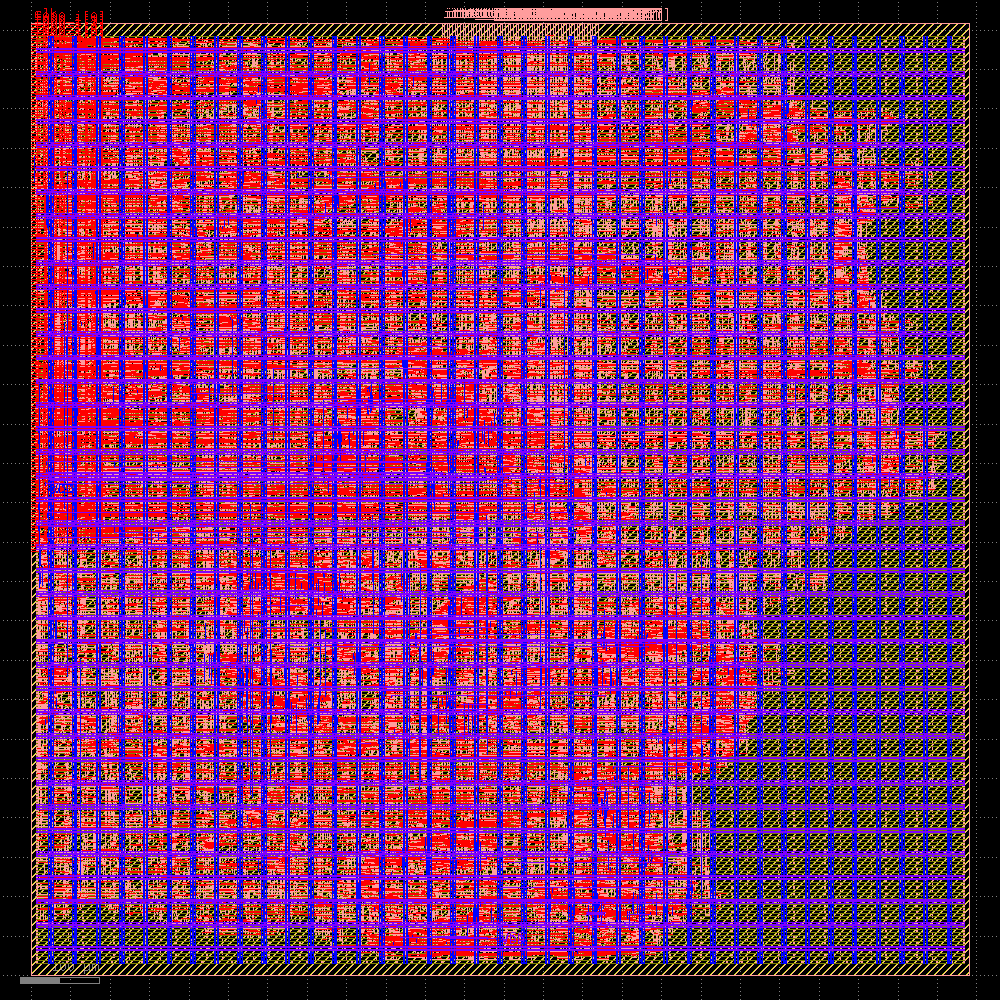

In [33]:
display(drt)

### Fill Insertion

Finally, as we're done placing all the essential cells, the only thing left to
do is fill in the gaps.

We prioritize the use of decap (decoupling capacitor) cells, which
further supports the power distribution network, but when there aren't any
small enough cells, we just use regular fill cells.

In [34]:
FillInsertion = Step.factory.get("OpenROAD.FillInsertion")

fill = FillInsertion(state_in=drt.state_out)
fill.start()

───────────────────────────────────────────────── Fill Insertion ──────────────────────────────────────────────────

[06:43:54] VERBOSE  Running 'OpenROAD.FillInsertion'…                                                  ]8;id=140696;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=142886;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:43:54] VERBOSE  Logging subprocess to                                                              ]8;id=53516;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=498503;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=398721;file:///content/openlane_run/11-openroad-fillinsertion/openroad-fillinsertion.log\openlane_run/]8;;\]8;id=879082;file:///content/openlane_run/11-openroad-fillinsertion/openroad-fillinsertion.log\11]8;;\]8;id=398721;file:///content/openlane_run/11-openroad-fillinsertion/openroad-fillinsertion.log\-openroad-fillinsertion/openroad-fillinsertion.log]8;;\…                             

Reading OpenROAD database at '/content/openlane_run/10-openroad-detailedrouting/qft3_top.odb'…

Reading library file at                                                                                            
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lib/gf180mcu_fd_sc_mcu7t5v0__tt_025C_5v00.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.07291

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

gf180mcu_fd_sc_mcu7t5v0__fillcap_* gf180mcu_fd_sc_mcu7t5v0__fill_*

[INFO DPL-0001] Placed 30056 filler instances.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'…

Writing netlist to '/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'…

Writing powered netlist to '/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'…

Writing layout to '/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'…

Writing timing constraints to '/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'…

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'design__instance__displacement__mean': Decimal('1.0265'), 'design__instance__displacement__max': Decimal('39.2435'), 'route__wirelength__estimated': 684850, 'design__violations': 0, 'antenna__violating__nets': 34, 'antenna__violating__pins': 43, 'route__net': 18093, 'route__net__special': 2, 'route__drc_errors__iter:1': 7615, 'route__wirelength__iter:1': 772257, 'route__drc_errors__iter:2': 755, 'route__wirelength__iter:2': 765209, 'route__drc_errors__iter:3': 567, 'route__wirelength__iter:3': 764697, 'route__drc_errors__iter:4': 21, 'route__wirelength__iter:4': 764380, 'route__drc_errors__iter:5': 0, 'route__wirelength__iter:5': 764386, 'route__drc_errors': 0, 'route__wirelength': 764386, 'route__vias': 114926, 'route__vias__singlecut': 114926, 'route__vias__multicut': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:43:58] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=297229;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=903242;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:43:58] VERBOSE  Logging subprocess to ]8;id=58348;file:///tmp/openlane_klayout_tmp_1w_4btn1/klayout-render.log\..]8;;\]8;id=979450;file:///tmp/openlane_klayout_tmp_1w_4btn1/klayout-render.log\/tmp/openlane_klayout_tmp_1w_4btn1/]8;;\]8;id=962692;file:///tmp/openlane_klayout_tmp_1w_4btn1/klayout-render.log\klayout-render.log]8;;\…     ]8;id=382218;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=598128;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 3.94s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
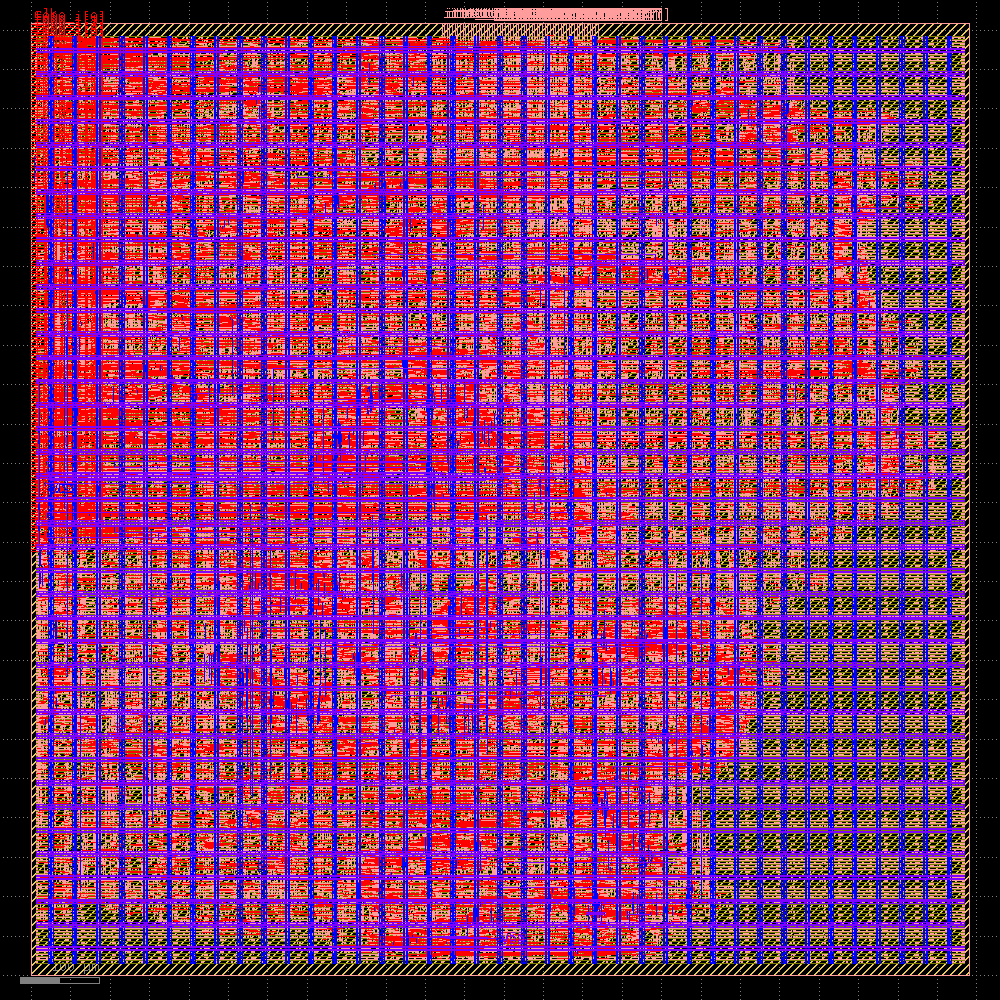

In [35]:
display(fill)

### Parasitics Extraction a.k.a. Resistance/Capacitance Extraction (RCX)

This step does not alter the design- rather, it computes the
[Parasitic elements](https://en.wikipedia.org/wiki/Parasitic_element_(electrical_networks))
of the circuit, which have an effect of timing, as we prepare to do the final
timing analysis.

The parasitic elements are saved in the **Standard Parasitics Exchange Format**,
or SPEF. OpenLane creates a SPEF file for each interconnect corner as described in
the [Corners and STA](https://openlane2.readthedocs.io/en/latest/usage/corners_and_sta.html)
section of the documentation.

In [36]:
RCX = Step.factory.get("OpenROAD.RCX")

rcx = RCX(state_in=fill.state_out)
rcx.start()

─────────────────────────────────── Parasitic Resistance/Capacitance Extraction ───────────────────────────────────

[06:44:03] VERBOSE  Running 'OpenROAD.RCX'…                                                            ]8;id=712724;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=467525;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:44:03] INFO     Running RCX for corners matching nom_*                                         ]8;id=936441;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=695078;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/12-openroad-rcx/nom/rcx.log)…                                           

[06:44:03] VERBOSE  Logging subprocess to ]8;id=742383;file:///content/openlane_run/12-openroad-rcx/nom/rcx.log\openlane_run/]8;;\]8;id=807619;file:///content/openlane_run/12-openroad-rcx/nom/rcx.log\12]8;;\]8;id=742383;file:///content/openlane_run/12-openroad-rcx/nom/rcx.log\-openroad-rcx/nom/rcx.log]8;;\…                    ]8;id=59498;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=339314;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[06:44:03] INFO     Running RCX for corners matching min_*                                         ]8;id=165466;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=399839;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/12-openroad-rcx/min/rcx.log)…                                           

[06:44:03] VERBOSE  Logging subprocess to ]8;id=965646;file:///content/openlane_run/12-openroad-rcx/min/rcx.log\openlane_run/]8;;\]8;id=565597;file:///content/openlane_run/12-openroad-rcx/min/rcx.log\12]8;;\]8;id=965646;file:///content/openlane_run/12-openroad-rcx/min/rcx.log\-openroad-rcx/min/rcx.log]8;;\…                    ]8;id=971902;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=296633;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[06:44:17] INFO     Finished RCX for corners matching nom_*.                                       ]8;id=499552;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=230174;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[06:44:17] INFO     Running RCX for corners matching max_*                                         ]8;id=690807;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=20811;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/12-openroad-rcx/max/rcx.log)…                                           

[06:44:17] VERBOSE  Logging subprocess to ]8;id=811757;file:///content/openlane_run/12-openroad-rcx/max/rcx.log\openlane_run/]8;;\]8;id=804253;file:///content/openlane_run/12-openroad-rcx/max/rcx.log\12]8;;\]8;id=811757;file:///content/openlane_run/12-openroad-rcx/max/rcx.log\-openroad-rcx/max/rcx.log]8;;\…                    ]8;id=3735;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=612404;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[06:44:17] INFO     Finished RCX for corners matching min_*.                                       ]8;id=582060;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=657049;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[06:44:24] INFO     Finished RCX for corners matching max_*.                                       ]8;id=849300;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=105821;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': None, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'design__instance__displacement__mean': Decimal('1.0265'), 'design__instance__displacement__max': Decimal('39.2435'), 'route__wirelength__estimated': 684850, 'design__violations': 0, 'antenna__violating__nets': 34, 'antenna__violating__pins': 43, 'route__net': 18093, 'route__net__special': 2, 'route__drc_errors__iter:1': 7615, 'route__wirelength__iter:1': 772257, 'route__drc_errors__iter:2': 755, 'route__wirelength__iter:2': 765209, 'route__drc_errors__iter:3': 567, 'route__wirelength__iter:3': 764697, 'route__drc_errors__iter:4': 21, 'route__wirelength__iter:4': 764380, 'route__drc_errors__iter:5': 0, 'route__wirelength__iter:5': 764386, 'route__drc_errors': 0, 'route__wirelength': 764386, 'route__vias': 114926, 'route__vias__singlecut': 114926, 'route__vias__multicut': 0}}

### Static Timing Analysis (Post-PnR)

STA is a process that verifies that a chip meets certain constraints on clock
and data timings to run at its rated clock speed. See [Corners and STA](https://openlane2.readthedocs.io/en/latest/usage/corners_and_sta.html)
in the documentation for more info.

---

This step generates two kinds of files:
* `.lib`: Liberty™-compatible Library files. Can be used to do static timing
  analysis when creating a design with this design as a sub-macro.
* `.sdf`: Standard Delay Format. Can be used with certain simulation software
  to do *dynamic* timing analysis.

Unfortunately, the `.lib` files coming out of OpenLane right now are not super
reliable for timing purposes and are only provided for completeness.
When using OpenLane-created macros withing other designs, it is best to use the
macro's final netlist and extracted parasitics instead.

In [37]:
STAPostPNR = Step.factory.get("OpenROAD.STAPostPNR")

sta_post_pnr = STAPostPNR(state_in=rcx.state_out)
sta_post_pnr.start()

──────────────────────────────────────── Static Timing Analysis (Post-PnR) ────────────────────────────────────────

[06:44:24] VERBOSE  Running 'OpenROAD.STAPostPNR'…                                                     ]8;id=867859;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=298977;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:44:24] INFO     Starting STA for the nom_tt_025C_5v00 timing corner…                            ]8;id=712734;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=633842;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:44:24] INFO     Starting STA for the nom_ss_125C_4v50 timing corner…                            ]8;id=566736;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=609112;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:44:24] VERBOSE  Logging subprocess to                                                              ]8;id=91386;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=315876;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=688503;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/sta.log\openlane_run/]8;;\]8;id=787874;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/sta.log\13]8;;\]8;id=688503;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/sta.log\-openroad-stapostpnr/nom_tt_025C_5v00/sta.log]8;;\…                                  

[06:44:24] VERBOSE  Logging subprocess to                                                              ]8;id=948320;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=449600;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=576731;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/sta.log\openlane_run/]8;;\]8;id=422746;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/sta.log\13]8;;\]8;id=576731;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/sta.log\-openroad-stapostpnr/nom_ss_125C_4v50/sta.log]8;;\…                                  

[06:46:00] INFO     Finished STA for the nom_tt_025C_5v00 timing corner.                            ]8;id=867423;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=193827;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:46:00] VERBOSE  Logging subprocess to                                                              ]8;id=221740;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=909526;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=773830;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/filter_unannotated.log\openlane_run/]8;;\]8;id=500480;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/filter_unannotated.log\13]8;;\]8;id=773830;file:///content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/filter_unannotated.log\-openroad-stapostpnr/nom_tt_025C_5v00/filter_unannotated.log]8;;\…                   

[06:46:01] INFO     Finished STA for the nom_ss_125C_4v50 timing corner.                            ]8;id=281961;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=392231;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:46:01] VERBOSE  Logging subprocess to                                                              ]8;id=837232;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=300800;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=926572;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/filter_unannotated.log\openlane_run/]8;;\]8;id=96622;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/filter_unannotated.log\13]8;;\]8;id=926572;file:///content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/filter_unannotated.log\-openroad-stapostpnr/nom_ss_125C_4v50/filter_unannotated.log]8;;\…                   

[06:46:02] INFO     Starting STA for the nom_ff_n40C_5v50 timing corner…                            ]8;id=83390;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=384337;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:46:02] VERBOSE  Logging subprocess to                                                              ]8;id=309356;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=824226;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=603072;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/sta.log\openlane_run/]8;;\]8;id=444031;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/sta.log\13]8;;\]8;id=603072;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/sta.log\-openroad-stapostpnr/nom_ff_n40C_5v50/sta.log]8;;\…                                  

[06:46:03] INFO     Starting STA for the min_tt_025C_5v00 timing corner…                            ]8;id=716184;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=334800;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:46:03] VERBOSE  Logging subprocess to                                                              ]8;id=551422;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=333641;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=606689;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/sta.log\openlane_run/]8;;\]8;id=937694;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/sta.log\13]8;;\]8;id=606689;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/sta.log\-openroad-stapostpnr/min_tt_025C_5v00/sta.log]8;;\…                                  

[06:47:35] INFO     Finished STA for the min_tt_025C_5v00 timing corner.                            ]8;id=620620;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=486898;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:47:35] VERBOSE  Logging subprocess to                                                              ]8;id=371311;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=49112;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=730207;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/filter_unannotated.log\openlane_run/]8;;\]8;id=376425;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/filter_unannotated.log\13]8;;\]8;id=730207;file:///content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/filter_unannotated.log\-openroad-stapostpnr/min_tt_025C_5v00/filter_unannotated.log]8;;\…                   

[06:47:37] INFO     Starting STA for the min_ss_125C_4v50 timing corner…                            ]8;id=891313;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=573690;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:47:37] VERBOSE  Logging subprocess to                                                              ]8;id=727078;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=663091;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=477532;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/sta.log\openlane_run/]8;;\]8;id=731005;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/sta.log\13]8;;\]8;id=477532;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/sta.log\-openroad-stapostpnr/min_ss_125C_4v50/sta.log]8;;\…                                  

[06:47:39] INFO     Finished STA for the nom_ff_n40C_5v50 timing corner.                            ]8;id=335203;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=875064;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:47:39] VERBOSE  Logging subprocess to                                                              ]8;id=848177;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=798714;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=124747;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/filter_unannotated.log\openlane_run/]8;;\]8;id=69856;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/filter_unannotated.log\13]8;;\]8;id=124747;file:///content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/filter_unannotated.log\-openroad-stapostpnr/nom_ff_n40C_5v50/filter_unannotated.log]8;;\…                   

[06:47:40] INFO     Starting STA for the min_ff_n40C_5v50 timing corner…                            ]8;id=289004;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=690547;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:47:40] VERBOSE  Logging subprocess to                                                              ]8;id=500261;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=280711;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=703750;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/sta.log\openlane_run/]8;;\]8;id=305231;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/sta.log\13]8;;\]8;id=703750;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/sta.log\-openroad-stapostpnr/min_ff_n40C_5v50/sta.log]8;;\…                                  

[06:49:11] INFO     Finished STA for the min_ff_n40C_5v50 timing corner.                            ]8;id=297612;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=237036;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:49:11] VERBOSE  Logging subprocess to                                                              ]8;id=40820;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=940508;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=365094;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/filter_unannotated.log\openlane_run/]8;;\]8;id=417371;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/filter_unannotated.log\13]8;;\]8;id=365094;file:///content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/filter_unannotated.log\-openroad-stapostpnr/min_ff_n40C_5v50/filter_unannotated.log]8;;\…                   

[06:49:13] INFO     Finished STA for the min_ss_125C_4v50 timing corner.                            ]8;id=264998;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=644753;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:49:13] VERBOSE  Logging subprocess to                                                              ]8;id=635491;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=98398;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=885040;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/filter_unannotated.log\openlane_run/]8;;\]8;id=536283;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/filter_unannotated.log\13]8;;\]8;id=885040;file:///content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/filter_unannotated.log\-openroad-stapostpnr/min_ss_125C_4v50/filter_unannotated.log]8;;\…                   

[06:49:13] INFO     Starting STA for the max_tt_025C_5v00 timing corner…                            ]8;id=63061;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=600565;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:49:13] VERBOSE  Logging subprocess to                                                              ]8;id=287678;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=566734;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=101784;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/sta.log\openlane_run/]8;;\]8;id=476635;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/sta.log\13]8;;\]8;id=101784;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/sta.log\-openroad-stapostpnr/max_tt_025C_5v00/sta.log]8;;\…                                  

[06:49:15] INFO     Starting STA for the max_ss_125C_4v50 timing corner…                            ]8;id=834169;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=874190;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:49:15] VERBOSE  Logging subprocess to                                                              ]8;id=920446;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=519597;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=604157;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/sta.log\openlane_run/]8;;\]8;id=896201;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/sta.log\13]8;;\]8;id=604157;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/sta.log\-openroad-stapostpnr/max_ss_125C_4v50/sta.log]8;;\…                                  

[06:50:52] INFO     Finished STA for the max_tt_025C_5v00 timing corner.                            ]8;id=411094;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=96964;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:50:52] VERBOSE  Logging subprocess to                                                              ]8;id=734026;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=50655;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=200902;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/filter_unannotated.log\openlane_run/]8;;\]8;id=497426;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/filter_unannotated.log\13]8;;\]8;id=200902;file:///content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/filter_unannotated.log\-openroad-stapostpnr/max_tt_025C_5v00/filter_unannotated.log]8;;\…                   

[06:50:55] INFO     Starting STA for the max_ff_n40C_5v50 timing corner…                            ]8;id=349551;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=118188;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[06:50:55] VERBOSE  Logging subprocess to                                                              ]8;id=494952;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=847192;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=635523;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/sta.log\openlane_run/]8;;\]8;id=842697;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/sta.log\13]8;;\]8;id=635523;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/sta.log\-openroad-stapostpnr/max_ff_n40C_5v50/sta.log]8;;\…                                  

[06:50:57] INFO     Finished STA for the max_ss_125C_4v50 timing corner.                            ]8;id=941629;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=873336;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:50:57] VERBOSE  Logging subprocess to                                                              ]8;id=480228;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=11415;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=774721;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/filter_unannotated.log\openlane_run/]8;;\]8;id=596791;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/filter_unannotated.log\13]8;;\]8;id=774721;file:///content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/filter_unannotated.log\-openroad-stapostpnr/max_ss_125C_4v50/filter_unannotated.log]8;;\…                   

[06:51:57] INFO     Finished STA for the max_ff_n40C_5v50 timing corner.                            ]8;id=454546;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=927170;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[06:51:57] VERBOSE  Logging subprocess to                                                              ]8;id=247759;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=655762;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=613884;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/filter_unannotated.log\openlane_run/]8;;\]8;id=469411;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/filter_unannotated.log\13]8;;\]8;id=613884;file:///content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/filter_unannotated.log\-openroad-stapostpnr/max_ff_n40C_5v50/filter_unannotated.log]8;;\…                   

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┓
┃                      ┃       ┃       ┃       ┃      ┃ of    ┃      ┃       ┃      ┃       ┃ of   ┃       ┃      ┃
┃                      ┃       ┃ Reg   ┃       ┃      ┃ which ┃      ┃ Reg   ┃      ┃       ┃ whi… ┃       ┃      ┃
┃                      ┃ Hold  ┃ to    ┃       ┃ Hold ┃ reg   ┃ Set… ┃ to    ┃      ┃ Setup ┃ reg  ┃ Max   ┃ Max  ┃
┃                      ┃ Worst ┃ Reg   ┃ Hold  ┃ Vio  ┃ to    ┃ Wor… ┃ Reg   ┃ Set… ┃ Vio   ┃ to   ┃ Cap   ┃ Slew ┃
┃ Corner/Group         ┃ Slack ┃ Paths ┃ TNS   ┃ Cou… ┃ reg   ┃ Sla… ┃ Paths ┃ TNS  ┃ Count ┃ reg  ┃ Viol… ┃ Vio… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━┩
│ Overall              │ -3.1… │ -0.1… │ -107… │ 466  │ 30    │ -16… │ -81.… │ -10… │ 63344 │ 3392 │ 21    │ 122… │
│ nom_tt_025C_5v00     │ -0.9… │ -0.0… │ -5.6… │ 27   │ 1     │ -91… │ -37.… │ -60… │ 6918  │ 267  │ 19    │ 101… │
│ nom_ss_125C_4v50     │ -3.0… │ 0.23… │ -101… │ 119  │ 0     │ -16… │ -74.… │ -10… │ 7253  │ 596  │ 19    │ 119… │
│ nom_ff_n40C_5v50     │ -0.1… │ -0.1… │ -0.8… │ 10   │ 9     │ -63… │ -21.… │ -41… │ 6918  │ 267  │ 19    │ 9487 │
│ min_tt_025C_5v00     │ -0.8… │ -0.0… │ -3.9… │ 24   │ 1     │ -90… │ -34.… │ -59… │ 6918  │ 267  │ 16    │ 100… │
│ min_ss_125C_4v50     │ -2.8… │ 0.23… │ -96.… │ 119  │ 0     │ -15… │ -68.… │ -10… │ 7228  │ 577  │ 16    │ 116… │
│ min_ff_n40C_5v50     │ -0.1… │ -0.1… │ -0.8… │ 9    │ 9     │ -62… │ -19.… │ -41… │ 6918  │ 267  │ 16    │ 9400 │
│ max_tt_025C_5v00     │ -1.0… │ -0.0… │ -7.7… │ 29   │ 1     │ -94… │ -41.… │ -62… │ 6918  │ 267  │ 21    │ 102… │
│ max_ss_125C_4v50     │ -3.1… │ 0.23… │ -107… │ 119  │ 0     │ -16… │ -81.… │ -10… │ 7355  │ 617  │ 21    │ 122… │
│ max_ff_n40C_5v50     │ -0.1… │ -0.1… │ -0.9… │ 10   │ 9     │ -65… │ -23.… │ -42… │ 6918  │ 267  │ 20    │ 9537 │
└──────────────────────┴───────┴───────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃                      ┃ Hold     ┃ Reg to   ┃          ┃          ┃ of which  ┃ Setup    ┃           ┃          ┃           ┃ of which ┃           ┃          ┃
┃                      ┃ Worst    ┃ Reg      ┃          ┃ Hold Vio ┃ reg to    ┃ Worst    ┃ Reg to    ┃ Setup    ┃ Setup Vio ┃ reg to   ┃ Max Cap   ┃ Max Slew ┃
┃ Corner/Group         ┃ Slack    ┃ Paths    ┃ Hold TNS ┃ Count    ┃ reg       ┃ Slack    ┃ Reg Paths ┃ TNS      ┃ Count     ┃ reg      ┃ Violatio… ┃ Violati… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ Overall              │ -3.1803  │ -0.1201  │ -107.94… │ 466      │ 30        │ -1631.2… │ -81.6960  │ -107856… │ 63344     │ 3392     │ 21        │ 12279    │
│ nom_tt_025C_5v00     │ -0.9664  │ -0.0168  │ -5.6022  │ 27       │ 1         │ -919.98… │ -37.6866  │ -606479… │ 6918      │ 267      │ 19        │ 10129    │
│ nom_ss_125C_4v50     │ -3.0008  │ 0.2363   │ -101.43… │ 119      │ 0         │ -1601.1… │ -74.3661  │ -105894… │ 7253      │ 596      │ 19        │ 11997    │
│ nom_ff_n40C_5v50     │ -0.1195  │ -0.1195  │ -0.8734  │ 10       │ 9         │ -637.48… │ -21.1514  │ -416025… │ 6918      │ 267      │ 19        │ 9487     │
│ min_tt_025C_5v00     │ -0.8766  │ -0.0153  │ -3.9119  │ 24       │ 1         │ -903.41… │ -34.4569  │ -595918… │ 6918      │ 267      │ 16        │ 10043    │
│ min_ss_125C_4v50     │ -2.8515  │ 0.2394   │ -96.1772 │ 119      │ 0         │ -1574.2… │ -68.5709  │ -104149… │ 7228      │ 577      │ 16        │ 11648    │
│ min_ff_n40C_5v50     │ -0.1188  │ -0.1188  │ -0.8225  │ 9        │ 9         │ -628.34… │ -19.2156  │ -410461… │ 6918      │ 267      │ 16        │ 9400     │
│ max_tt_025C_5v00     │ -1.0750  │ -0.0180  │ -7.7288  │ 29       │ 1         │ -941.88… │ -41.5308  │ -620543… │ 6918      │ 267      │ 21        │ 10211    │
│ max_ss_125C_4v50     │ -3.1803  │ 0.2338   │ -107.94… │ 119      │ 0         │ -1631.2… │ -81.6960  │ -107856… │ 7355      │ 617      │ 21        │ 12279    │
│ max_ff_n40C_5v50     │ -0.1264  │ -0.1201  │ -0.9491  │ 10       │ 9         │ -650.45… │ -23.5004  │ -424091… │ 6918      │ 267      │ 20        │ 9537     │
└──────────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┘

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.sdf'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.sdf'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.sdf'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.sdf'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.sdf'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.sdf'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.sdf'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.sdf'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.lib'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.lib'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.lib'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.lib'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.lib'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.lib'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.lib'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.lib'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.lib')}, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__count__net:VSS': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('29113.8'), 'desig

### Stream-out

Stream-out is the process of converting the designs from the abstract formats
using during floorplanning, placement and routing into a concrete format called
GDSII (lit. Graphic Design System 2), which is the final file that is then sent
for fabrication.

In [38]:
StreamOut = Step.factory.get("KLayout.StreamOut")

gds = StreamOut(state_in=sta_post_pnr.state_out)
gds.start()

─────────────────────────────────────────── GDSII Stream Out (KLayout) ────────────────────────────────────────────

[06:51:59] VERBOSE  Running 'KLayout.StreamOut'…                                                       ]8;id=710102;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=951887;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:51:59] VERBOSE  Logging subprocess to ]8;id=728096;file:///content/openlane_run/14-klayout-streamout/klayout-streamout.log\openlane_run/]8;;\]8;id=774677;file:///content/openlane_run/14-klayout-streamout/klayout-streamout.log\14]8;;\]8;id=728096;file:///content/openlane_run/14-klayout-streamout/klayout-streamout.log\-klayout-streamout/klayout-streamout.log]8;;\…     ]8;id=670529;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=255465;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Warning: DEF UNITS does not match reader DBU (DEF UNITS is 2000 and corresponds to a DBU of 0.0005, but reader DBU 
is set to 0.001) (line=5, cell=, file=qft3_top.def)

[INFO] Clearing cells…

[INFO] Merging GDS files…

[INFO] Copying top level cell 'qft3_top'…

[INFO] Checking for missing GDS…

[INFO] All LEF cells have matching GDS cells.

[INFO] Writing out GDS '/content/openlane_run/14-klayout-streamout/qft3_top.klayout.gds'…

[INFO] Done.

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.sdf'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.sdf'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.sdf'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.sdf'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.sdf'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.sdf'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.sdf'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.sdf'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.lib'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.lib'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.lib'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.lib'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.lib'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.lib'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.lib'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.lib'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.lib')}, 'spice': None, 'mag': None, 'gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__cou

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[06:52:04] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=617991;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=668308;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:52:04] VERBOSE  Logging subprocess to ]8;id=339042;file:///tmp/openlane_klayout_tmp_w2kgp6hz/klayout-render.log\..]8;;\]8;id=207799;file:///tmp/openlane_klayout_tmp_w2kgp6hz/klayout-render.log\/tmp/openlane_klayout_tmp_w2kgp6hz/]8;;\]8;id=554009;file:///tmp/openlane_klayout_tmp_w2kgp6hz/klayout-render.log\klayout-render.log]8;;\…     ]8;id=311544;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=993926;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 4.06s
#### Views updated:
* GDSII Stream
* GDSII Stream (KLayout)
#### Preview:
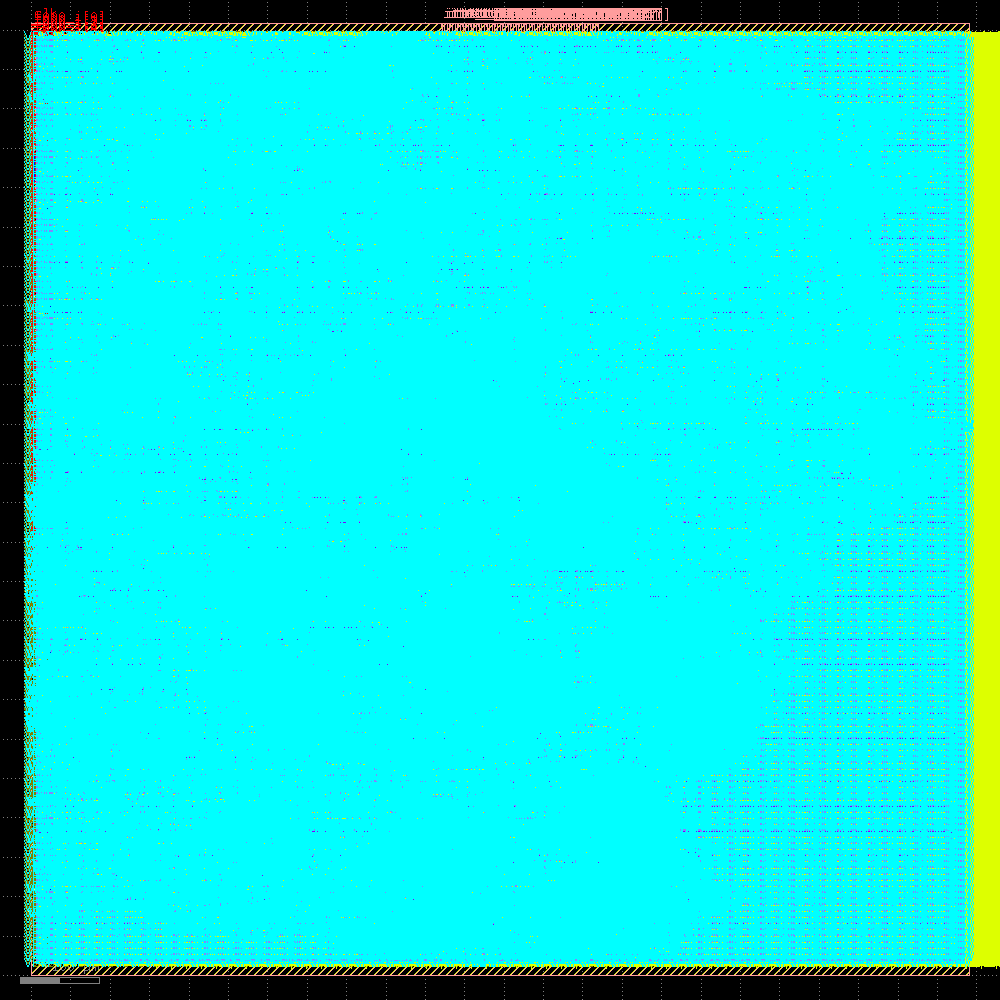

In [39]:
display(gds)

### Design Rule Checks (DRC)

DRC determines that the final layout does not violate any of the rules set by
the foundry to ensure the design is actually manufacturable- for example,
not enough space between two wires, *too much* space between tap cells, and so
on.

A design not passing DRC will typically be rejected by the foundry, who
also run DRC on their side.

In [40]:
DRC = Step.factory.get("Magic.DRC")

drc = DRC(state_in=gds.state_out)
drc.start()

─────────────────────────────────────────────── Design Rule Checks ────────────────────────────────────────────────

[06:52:09] VERBOSE  Running 'Magic.DRC'…                                                               ]8;id=829007;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=259350;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:52:09] VERBOSE  Logging subprocess to ]8;id=543595;file:///content/openlane_run/15-magic-drc/magic-drc.log\openlane_run/]8;;\]8;id=173429;file:///content/openlane_run/15-magic-drc/magic-drc.log\15]8;;\]8;id=543595;file:///content/openlane_run/15-magic-drc/magic-drc.log\-magic-drc/magic-drc.log]8;;\…                     ]8;id=233198;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=392828;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Magic 8.3 revision 483 - Compiled on Sun Jun  2 18:57:41 UTC 2024.

Starting magic under Tcl interpreter

Using the terminal as the console.

Using NULL graphics device.

Processing system .magicrc file

Sourcing design .magicrc for technology gf180mcuC ...

10 Magic internal units = 1 Lambda

Input style import: scaleFactor=10, multiplier=2

The following types are not handled by extraction and will be treated as non-electrical types:

obsactive mvobsactive filldiff fillpoly m1hole obsm1 fillm1 obsv1 m2hole obsm2 fillm2 obsv2 m3hole obsm3 fillm3    
m4hole obsm4 fillm4 m5hole obsm5 fillm5 glass fillblock lvstext obscomment

Scaled tech values by 10 / 1 to match internal grid scaling

Loading gf180mcuC Device Generator Menu ...

Loading "/content/openlane_ipynb/openlane/scripts/magic/wrapper.tcl" from command line.

Warning: Calma reading is not undoable!  I hope that's OK.

Library written using GDS-II Release 6.0

Library name: LIB

Reading "VIA_Via4_1_VH".

Reading "VIA_Via3_HV".

Reading "VIA_Via1_VV".

Reading "VIA_Via1_HV".

Reading "VIA_Via2_VH".

Reading "VIA_via1_2_4000_1200_1_3_1240_1240".

Reading "VIA_via2_3_4000_560_1_4_1040_1040".

Reading "VIA_via3_4_4000_560_1_4_1040_1040".

Reading "VIA_via4_5_4000_4000_3_3_1240_1240".

Reading "gf180mcu_fd_sc_mcu7t5v0__inv_8".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkinv_8".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkinv_2".

Reading "gf180mcu_fd_sc_mcu7t5v0__inv_3".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkbuf_2".

Reading "gf180mcu_fd_sc_mcu7t5v0__inv_2".

Reading "gf180mcu_fd_sc_mcu7t5v0__inv_4".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkbuf_8".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkbuf_16".

Reading "gf180mcu_fd_sc_mcu7t5v0__tieh".

Reading "gf180mcu_fd_sc_mcu7t5v0__dffrnq_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__buf_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__aoi221_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nor4_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__or3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__or4_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__mux2_2".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai32_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nor3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai33_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nand4_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__and4_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai221_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__aoi211_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__xnor3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai31_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai22_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__aoi22_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai211_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__and2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__or2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__and3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__xnor2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nand3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__xor3_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__aoi21_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__oai21_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nand2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__xor2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__nor2_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__clkinv_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__filltie".

Reading "gf180mcu_fd_sc_mcu7t5v0__endcap".

Reading "gf180mcu_fd_sc_mcu7t5v0__fillcap_64".

Reading "gf180mcu_fd_sc_mcu7t5v0__fill_1".

Reading "gf180mcu_fd_sc_mcu7t5v0__fillcap_8".

Reading "gf180mcu_fd_sc_mcu7t5v0__fillcap_16".

Reading "gf180mcu_fd_sc_mcu7t5v0__fillcap_32".

Reading "gf180mcu_fd_sc_mcu7t5v0__fill_2".

Reading "gf180mcu_fd_sc_mcu7t5v0__fillcap_4".

Reading "qft3_top".

5000 uses

10000 uses

15000 uses

20000 uses

25000 uses

30000 uses

35000 uses

40000 uses

45000 uses

50000 uses

55000 uses

60000 uses

65000 uses

70000 uses

75000 uses

80000 uses

85000 uses

90000 uses

95000 uses

100000 uses

105000 uses

110000 uses

115000 uses

120000 uses

125000 uses

130000 uses

135000 uses

140000 uses

145000 uses

150000 uses

155000 uses

160000 uses

165000 uses

170000 uses

175000 uses

180000 uses

185000 uses

190000 uses

195000 uses

200000 uses

205000 uses

210000 uses

[INFO] Loading qft3_top

DRC style is now "drc(full)"

Loading DRC CIF style.

No errors found.

[INFO] COUNT: 0

[INFO] Should be divided by 3 or 4

[INFO] DRC Checking DONE (/content/openlane_run/15-magic-drc/reports/drc_violations.magic.rpt)

[INFO] Saving mag view with DRC errors (/content/openlane_run/15-magic-drc/views/qft3_top.drc.mag)

[INFO] Saved

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.sdf'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.sdf'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.sdf'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.sdf'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.sdf'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.sdf'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.sdf'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.sdf'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.lib'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.lib'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.lib'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.lib'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.lib'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.lib'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.lib'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.lib'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.lib')}, 'spice': None, 'mag': None, 'gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_violation__count__net:VDD': 0, 'design__power_grid_violation__cou

### SPICE Extraction for Layout vs. Schematic Check

This step tries to reconstruct a SPICE netlist from the GDSII file, so it can
later be used for the **Layout vs. Schematic** (LVS) check.

In [41]:
SpiceExtraction = Step.factory.get("Magic.SpiceExtraction")

spx = SpiceExtraction(state_in=drc.state_out)
spx.start()

───────────────────────────────────────────── SPICE Model Extraction ──────────────────────────────────────────────

[06:54:58] VERBOSE  Running 'Magic.SpiceExtraction'…                                                   ]8;id=812016;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=582487;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:54:58] VERBOSE  Logging subprocess to                                                              ]8;id=886969;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=648050;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=440050;file:///content/openlane_run/16-magic-spiceextraction/magic-spiceextraction.log\openlane_run/]8;;\]8;id=695458;file:///content/openlane_run/16-magic-spiceextraction/magic-spiceextraction.log\16]8;;\]8;id=440050;file:///content/openlane_run/16-magic-spiceextraction/magic-spiceextraction.log\-magic-spiceextraction/magic-spiceextraction.log]8;;\…                               

Magic 8.3 revision 483 - Compiled on Sun Jun  2 18:57:41 UTC 2024.

Starting magic under Tcl interpreter

Using the terminal as the console.

Using NULL graphics device.

Processing system .magicrc file

Sourcing design .magicrc for technology gf180mcuC ...

10 Magic internal units = 1 Lambda

Input style import: scaleFactor=10, multiplier=2

The following types are not handled by extraction and will be treated as non-electrical types:

obsactive mvobsactive filldiff fillpoly m1hole obsm1 fillm1 obsv1 m2hole obsm2 fillm2 obsv2 m3hole obsm3 fillm3    
m4hole obsm4 fillm4 m5hole obsm5 fillm5 glass fillblock lvstext obscomment

Scaled tech values by 10 / 1 to match internal grid scaling

Loading gf180mcuC Device Generator Menu ...

Loading "/content/openlane_ipynb/openlane/scripts/magic/wrapper.tcl" from command line.

> lef read /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__nom.tlef

Reading LEF data from file                                                                                         
/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/techlef/gf180mcu_fd_sc_mcu7t5v0__nom.tlef.

This action cannot be undone.

LEF read, Line 88 (Message): Unknown keyword "MINWIDTH" in LEF file; ignoring.

LEF read, Line 95 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 105 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 106 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 120 (Message): Unknown keyword "ARRAYSPACING" in LEF file; ignoring.

LEF read, Line 125 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 137 (Message): Unknown keyword "MINWIDTH" in LEF file; ignoring.

LEF read, Line 144 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 145 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 146 (Message): Unknown keyword "ANTENNAGATEPLUSDIFF" in LEF file; ignoring.

LEF read, Line 155 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 156 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 172 (Message): Unknown keyword "ARRAYSPACING" in LEF file; ignoring.

LEF read, Line 177 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 189 (Message): Unknown keyword "MINWIDTH" in LEF file; ignoring.

LEF read, Line 196 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 197 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 198 (Message): Unknown keyword "ANTENNAGATEPLUSDIFF" in LEF file; ignoring.

LEF read, Line 207 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 208 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 224 (Message): Unknown keyword "ARRAYSPACING" in LEF file; ignoring.

LEF read, Line 229 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 241 (Message): Unknown keyword "MINWIDTH" in LEF file; ignoring.

LEF read, Line 248 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 249 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 250 (Message): Unknown keyword "ANTENNAGATEPLUSDIFF" in LEF file; ignoring.

LEF read, Line 259 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 260 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 277 (Message): Unknown keyword "ARRAYSPACING" in LEF file; ignoring.

LEF read, Line 282 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 296 (Message): Unknown keyword "MINWIDTH" in LEF file; ignoring.

LEF read, Line 308 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 309 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 310 (Message): Unknown keyword "ANTENNAGATEPLUSDIFF" in LEF file; ignoring.

LEF read, Line 315 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 316 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read: Processed 1380 lines.

> lef read /root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef

Reading LEF data from file                                                                                         
/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/lef/gf180mcu_fd_sc_mcu7t5v0.lef.

This action cannot be undone.

LEF read: Processed 26334 lines.

> def read /content/openlane_run/11-openroad-fillinsertion/qft3_top.def -noblockage -labels

Reading DEF data from file /content/openlane_run/11-openroad-fillinsertion/qft3_top.def.

This action cannot be undone.

Processed 4 vias total.

Processed 58411 subcell instances total.

Processed 262 pins total.

Processed 2 special nets total.

Processed 18093 nets total.

DEF read: Processed 364188 lines.

Moving label "_00277_" from metal4 to via4 in cell qft3_top.

Moving label "_01068_" from metal4 to via4 in cell qft3_top.

Moving label "_01214_" from metal2 to via2 in cell qft3_top.

Moving label "_01725_" from metal3 to via2 in cell qft3_top.

Moving label "_02102_" from metal3 to via2 in cell qft3_top.

Moving label "_02456_" from metal3 to via2 in cell qft3_top.

Moving label "_02766_" from metal3 to via2 in cell qft3_top.

Moving label "_03399_" from metal3 to via2 in cell qft3_top.

Moving label "_03478_" from metal2 to via2 in cell qft3_top.

Moving label "_03592_" from metal3 to via2 in cell qft3_top.

Moving label "_03779_" from metal3 to via2 in cell qft3_top.

Moving label "_03895_" from metal2 to via2 in cell qft3_top.

Moving label "_04126_" from metal3 to via2 in cell qft3_top.

Moving label "_04818_" from metal2 to via2 in cell qft3_top.

Moving label "_05368_" from metal3 to via2 in cell qft3_top.

Moving label "_05458_" from metal2 to via2 in cell qft3_top.

Moving label "_05882_" from metal2 to via2 in cell qft3_top.

Moving label "_06134_" from metal2 to via2 in cell qft3_top.

Moving label "_06340_" from metal2 to via2 in cell qft3_top.

Moving label "_06469_" from metal2 to via2 in cell qft3_top.

Moving label "_06544_" from metal3 to via2 in cell qft3_top.

Moving label "_07089_" from metal3 to via2 in cell qft3_top.

Moving label "_07286_" from metal2 to via2 in cell qft3_top.

Moving label "_07296_" from metal2 to via2 in cell qft3_top.

Moving label "_07585_" from metal2 to via2 in cell qft3_top.

Moving label "_07837_" from metal2 to via2 in cell qft3_top.

Moving label "_07940_" from metal2 to via2 in cell qft3_top.

Moving label "_08180_" from metal2 to via2 in cell qft3_top.

Moving label "_08196_" from metal2 to via2 in cell qft3_top.

Moving label "_08217_" from metal2 to via2 in cell qft3_top.

Moving label "_08363_" from metal2 to via2 in cell qft3_top.

Moving label "_08430_" from metal2 to via2 in cell qft3_top.

Moving label "_08475_" from metal2 to via2 in cell qft3_top.

Moving label "_08489_" from metal3 to via2 in cell qft3_top.

Moving label "_08630_" from metal2 to via2 in cell qft3_top.

Moving label "_09050_" from metal3 to via2 in cell qft3_top.

Moving label "_09061_" from metal3 to via2 in cell qft3_top.

Moving label "_09108_" from metal2 to via2 in cell qft3_top.

Moving label "_09322_" from metal3 to via2 in cell qft3_top.

Moving label "_09378_" from metal3 to via2 in cell qft3_top.

Moving label "_09623_" from metal3 to via2 in cell qft3_top.

Moving label "_09825_" from metal2 to via2 in cell qft3_top.

Moving label "c21_p0.in_r_delayed\[3\]\[7\]" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_364_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_397_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_458_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_481_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_541_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_577_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_583_clk" from metal3 to via2 in cell qft3_top.

Moving label "clknet_leaf_627_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_62_clk" from metal2 to via2 in cell qft3_top.

Moving label "clknet_leaf_705_clk" from metal2 to via1 in cell qft3_top.

Moving label "clknet_leaf_753_clk" from metal3 to via2 in cell qft3_top.

Moving label "clknet_leaf_865_clk" from metal2 to via2 in cell qft3_top.

Moving label "delay_stage5\[30\]\[6\]" from metal4 to via4 in cell qft3_top.

Moving label "h_q0_p3.add_i\[0\]" from metal3 to via2 in cell qft3_top.

Moving label "h_q0_p3.mult_sub.ar\[2\]" from metal3 to via2 in cell qft3_top.

Moving label "h_q2_p0.mult_sub.ar\[1\]" from metal2 to via2 in cell qft3_top.

Moving label "h_q2_p2.mult_sub.ai\[3\]" from metal2 to via2 in cell qft3_top.

Moving label "i010_r[4]" from metal4 to via3 in cell qft3_top.

Moving label "i011_r[5]" from metal4 to via4 in cell qft3_top.

Processing qft3_top

Extracting gf180mcu_fd_sc_mcu7t5v0__fillcap_32 into gf180mcu_fd_sc_mcu7t5v0__fillcap_32.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fillcap_64 into gf180mcu_fd_sc_mcu7t5v0__fillcap_64.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__endcap into gf180mcu_fd_sc_mcu7t5v0__endcap.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__filltie into gf180mcu_fd_sc_mcu7t5v0__filltie.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fillcap_4 into gf180mcu_fd_sc_mcu7t5v0__fillcap_4.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fillcap_16 into gf180mcu_fd_sc_mcu7t5v0__fillcap_16.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 into gf180mcu_fd_sc_mcu7t5v0__clkbuf_8.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fill_1 into gf180mcu_fd_sc_mcu7t5v0__fill_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fill_2 into gf180mcu_fd_sc_mcu7t5v0__fill_2.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 into gf180mcu_fd_sc_mcu7t5v0__dffrnq_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__inv_4 into gf180mcu_fd_sc_mcu7t5v0__inv_4.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__fillcap_8 into gf180mcu_fd_sc_mcu7t5v0__fillcap_8.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkinv_1 into gf180mcu_fd_sc_mcu7t5v0__clkinv_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nor2_1 into gf180mcu_fd_sc_mcu7t5v0__nor2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nand2_1 into gf180mcu_fd_sc_mcu7t5v0__nand2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__aoi21_1 into gf180mcu_fd_sc_mcu7t5v0__aoi21_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__xor3_1 into gf180mcu_fd_sc_mcu7t5v0__xor3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__xor2_1 into gf180mcu_fd_sc_mcu7t5v0__xor2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__and3_1 into gf180mcu_fd_sc_mcu7t5v0__and3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai21_1 into gf180mcu_fd_sc_mcu7t5v0__oai21_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nand3_1 into gf180mcu_fd_sc_mcu7t5v0__nand3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__and2_1 into gf180mcu_fd_sc_mcu7t5v0__and2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__or3_1 into gf180mcu_fd_sc_mcu7t5v0__or3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai32_1 into gf180mcu_fd_sc_mcu7t5v0__oai32_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__xnor2_1 into gf180mcu_fd_sc_mcu7t5v0__xnor2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nor3_1 into gf180mcu_fd_sc_mcu7t5v0__nor3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__xnor3_1 into gf180mcu_fd_sc_mcu7t5v0__xnor3_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__mux2_2 into gf180mcu_fd_sc_mcu7t5v0__mux2_2.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 into gf180mcu_fd_sc_mcu7t5v0__clkbuf_2.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__aoi211_1 into gf180mcu_fd_sc_mcu7t5v0__aoi211_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai211_1 into gf180mcu_fd_sc_mcu7t5v0__oai211_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai22_1 into gf180mcu_fd_sc_mcu7t5v0__oai22_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__and4_1 into gf180mcu_fd_sc_mcu7t5v0__and4_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nand4_1 into gf180mcu_fd_sc_mcu7t5v0__nand4_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__aoi22_1 into gf180mcu_fd_sc_mcu7t5v0__aoi22_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__or2_1 into gf180mcu_fd_sc_mcu7t5v0__or2_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__tieh into gf180mcu_fd_sc_mcu7t5v0__tieh.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai31_1 into gf180mcu_fd_sc_mcu7t5v0__oai31_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 into gf180mcu_fd_sc_mcu7t5v0__clkbuf_16.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkinv_2 into gf180mcu_fd_sc_mcu7t5v0__clkinv_2.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__inv_3 into gf180mcu_fd_sc_mcu7t5v0__inv_3.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__inv_2 into gf180mcu_fd_sc_mcu7t5v0__inv_2.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__aoi221_1 into gf180mcu_fd_sc_mcu7t5v0__aoi221_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__or4_1 into gf180mcu_fd_sc_mcu7t5v0__or4_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__clkinv_8 into gf180mcu_fd_sc_mcu7t5v0__clkinv_8.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__nor4_1 into gf180mcu_fd_sc_mcu7t5v0__nor4_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__buf_1 into gf180mcu_fd_sc_mcu7t5v0__buf_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai33_1 into gf180mcu_fd_sc_mcu7t5v0__oai33_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__oai221_1 into gf180mcu_fd_sc_mcu7t5v0__oai221_1.ext:

Extracting gf180mcu_fd_sc_mcu7t5v0__inv_8 into gf180mcu_fd_sc_mcu7t5v0__inv_8.ext:

Extracting qft3_top into qft3_top.ext:

exttospice finished.

Using technology "gf180mcuC", version 1.0.465-2-gbdc9412

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.sdf'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.sdf'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.sdf'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.sdf'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.sdf'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.sdf'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.sdf'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.sdf'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.lib'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.lib'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.lib'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.lib'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.lib'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.lib'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.lib'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.lib'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.lib')}, 'spice': Path('/content/openlane_run/16-magic-spiceextraction/qft3_top.spice'), 'mag': None, 'gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_

### Layout vs. Schematic (LVS)

A comparison between the final Verilog netlist (from PnR) and the final
SPICE netlist (extracted.)

This check effectively compares the physically implemented circuit to the final
Verilog netlist output by OpenROAD.

The idea is, if there are any disconnects, shorts or other mismatches in the
physical implementation that do not exist in the logical view of the design,
they would be caught at this step.

Common issues that result in LVS violations include:
* Lack of fill cells or tap cells in the design
* Two unrelated signals to be shorted, or a wire to be disconnected (most
  commonly seen with misconfigured PDN)

Chips with LVS errors are typically dead on arrival.

In [42]:
LVS = Step.factory.get("Netgen.LVS")

lvs = LVS(state_in=spx.state_out)
lvs.start()

─────────────────────────────────────────────────── Netgen LVS ────────────────────────────────────────────────────

[06:55:58] VERBOSE  Running 'Netgen.LVS'…                                                              ]8;id=620490;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=667941;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[06:55:58] VERBOSE  Logging subprocess to ]8;id=130825;file:///content/openlane_run/17-netgen-lvs/netgen-lvs.log\openlane_run/]8;;\]8;id=595815;file:///content/openlane_run/17-netgen-lvs/netgen-lvs.log\17]8;;\]8;id=130825;file:///content/openlane_run/17-netgen-lvs/netgen-lvs.log\-netgen-lvs/netgen-lvs.log]8;;\…                   ]8;id=208104;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=239343;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Netgen 1.5.270 compiled on Sun Jun  2 19:00:27 UTC 2024

Warning: netgen command 'format' use fully-qualified name '::netgen::format'

Warning: netgen command 'global' use fully-qualified name '::netgen::global'

Warning:  A case-insensitive file has been read and so the      verilog file must be treated case-insensitive to   
match.

Reading SPICE netlist file                                                                                         
'/root/.volare/gf180mcuC/libs.ref/gf180mcu_fd_sc_mcu7t5v0/spice/gf180mcu_fd_sc_mcu7t5v0.spice'...

Call to undefined subcircuit nfet_06v0

Creating placeholder cell definition.

Call to undefined subcircuit pfet_06v0

Creating placeholder cell definition.

Warning:  A case-insensitive file has been read and so the      verilog file must be treated case-insensitive to   
match.

Note:  Implicit pin Z in instance clkload0 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload1 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload2 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload3 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload4 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload5 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload6 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload7 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload8 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload9 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload10 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload11 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload12 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload13 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload14 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload15 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload16 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload17 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload18 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload19 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload20 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload21 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload22 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload23 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload24 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload25 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload26 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload27 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload28 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload29 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload30 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload31 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload32 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload33 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload34 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload35 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload36 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload37 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload38 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload39 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload40 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload41 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload42 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload43 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload44 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload45 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload46 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload47 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload48 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload49 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload50 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload51 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin Z in instance clkload52 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload53 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload54 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload55 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload56 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload57 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload58 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload59 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload60 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload61 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload62 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload63 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload64 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload65 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload66 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload67 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload68 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload69 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload70 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload71 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload72 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload73 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload74 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload75 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload76 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload77 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload78 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload79 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload80 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload81 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload82 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload83 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload84 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload85 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload86 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload87 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload88 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload89 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload90 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload91 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload92 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload93 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload94 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload95 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload96 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload97 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload98 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload99 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload100 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload101 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload102 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload103 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload104 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload105 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload106 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload107 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload108 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload109 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload110 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload111 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload112 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload113 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload114 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload115 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload116 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload117 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload118 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload119 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload120 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload121 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload122 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload123 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload124 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload125 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload126 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload127 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload128 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload129 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload130 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload131 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload132 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload133 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload134 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload135 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload136 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload137 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload138 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload139 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload140 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload141 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload142 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload143 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload144 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload145 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload146 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload147 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload148 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload149 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload150 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload151 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload152 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload153 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload154 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload155 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload156 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload157 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload158 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload159 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload160 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload161 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload162 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload163 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload164 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload165 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload166 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload167 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload168 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload169 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload170 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload171 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload172 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload173 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload174 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload175 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload176 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload177 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload178 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload179 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload180 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload181 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload182 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload183 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload184 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload185 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload186 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload187 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload188 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload189 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload190 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload191 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload192 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload193 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload194 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload195 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload196 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload197 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload198 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload199 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload200 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload201 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload202 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload203 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload204 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload205 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload206 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload207 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload208 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload209 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload210 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload211 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload212 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload213 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload214 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload215 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload216 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload217 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload218 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload219 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload220 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload221 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload222 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload223 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload224 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload225 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload226 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload227 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload228 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload229 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload230 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload231 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload232 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload233 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload234 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload235 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload236 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload237 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload238 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload239 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload240 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload241 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload242 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload243 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload244 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload245 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload246 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload247 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload248 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload249 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload250 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload251 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload252 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload253 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload254 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload255 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload256 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload257 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload258 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload259 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload260 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload261 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload262 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload263 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload264 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload265 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload266 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload267 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload268 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload269 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload270 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload271 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload272 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload273 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload274 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload275 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload276 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload277 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload278 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload279 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload280 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload281 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload282 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload283 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload284 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload285 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload286 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload287 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload288 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload289 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload290 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload291 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload292 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload293 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload294 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload295 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload296 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload297 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload298 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload299 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload300 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload301 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload302 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload303 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload304 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload305 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload306 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload307 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload308 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload309 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload310 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload311 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload312 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload313 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload314 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload315 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload316 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload317 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload318 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload319 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload320 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload321 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload322 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload323 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload324 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload325 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload326 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload327 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload328 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload329 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload330 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload331 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload332 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload333 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload334 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload335 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload336 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload337 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload338 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload339 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload340 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload341 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload342 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload343 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload344 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload345 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload346 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload347 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload348 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload349 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload350 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload351 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload352 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload353 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload354 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload355 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload356 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload357 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload358 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload359 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload360 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload361 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload362 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload363 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload364 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload365 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload366 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload367 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload368 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload369 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload370 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload371 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload372 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload373 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload374 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload375 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload376 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload377 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload378 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload379 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload380 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload381 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload382 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload383 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload384 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload385 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload386 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload387 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload388 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload389 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload390 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload391 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload392 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload393 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload394 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload395 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload396 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload397 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload398 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload399 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload400 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload401 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload402 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload403 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload404 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload405 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload406 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload407 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload408 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload409 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload410 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload411 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload412 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload413 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload414 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload415 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload416 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload417 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload418 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload419 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload420 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload421 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload422 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload423 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload424 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload425 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload426 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload427 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload428 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload429 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload430 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload431 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload432 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload433 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload434 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload435 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload436 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload437 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload438 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload439 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload440 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload441 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload442 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload443 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload444 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload445 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload446 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload447 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload448 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload449 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload450 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload451 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload452 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload453 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload454 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload455 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload456 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload457 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload458 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload459 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload460 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload461 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload462 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload463 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload464 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload465 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload466 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload467 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload468 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload469 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload470 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload471 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload472 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload473 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload474 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload475 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload476 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload477 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload478 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload479 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload480 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload481 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload482 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload483 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload484 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload485 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload486 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload487 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload488 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload489 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload490 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload491 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload492 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload493 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload494 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload495 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload496 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload497 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload498 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload499 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload500 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload501 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload502 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload503 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload504 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload505 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload506 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload507 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload508 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload509 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload510 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload511 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload512 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload513 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload514 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload515 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload516 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload517 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload518 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload519 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload520 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload521 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload522 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload523 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload524 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload525 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload526 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload527 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload528 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload529 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload530 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload531 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload532 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload533 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload534 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload535 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload536 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload537 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload538 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload539 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload540 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload541 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload542 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload543 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload544 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload545 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload546 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload547 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload548 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload549 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload550 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload551 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload552 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload553 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload554 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload555 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload556 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload557 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload558 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload559 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload560 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload561 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload562 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload563 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload564 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload565 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload566 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload567 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload568 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload569 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload570 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload571 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload572 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload573 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload574 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload575 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload576 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload577 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload578 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload579 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload580 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload581 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload582 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload583 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload584 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload585 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload586 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload587 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload588 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload589 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload590 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload591 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload592 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload593 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload594 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload595 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload596 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload597 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload598 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload599 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload600 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload601 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload602 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload603 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload604 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload605 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload606 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload607 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload608 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload609 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload610 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload611 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload612 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload613 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload614 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload615 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload616 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload617 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload618 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload619 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload620 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload621 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload622 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload623 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload624 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload625 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload626 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload627 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload628 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload629 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload630 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload631 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload632 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload633 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload634 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload635 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload636 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload637 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload638 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload639 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload640 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload641 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload642 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload643 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload644 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload645 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload646 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload647 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload648 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload649 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload650 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload651 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload652 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload653 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload654 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload655 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload656 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload657 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload658 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload659 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload660 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload661 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload662 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload663 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload664 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload665 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload666 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload667 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload668 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload669 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload670 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload671 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload672 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload673 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload674 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload675 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload676 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload677 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload678 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload679 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload680 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload681 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload682 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload683 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload684 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload685 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload686 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload687 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload688 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload689 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload690 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload691 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload692 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload693 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload694 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload695 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload696 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload697 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload698 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload699 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload700 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload701 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload702 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload703 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload704 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload705 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload706 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload707 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload708 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload709 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload710 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload711 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload712 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload713 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload714 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload715 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload716 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload717 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload718 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload719 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload720 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload721 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload722 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload723 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload724 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload725 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload726 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload727 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload728 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload729 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload730 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload731 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload732 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload733 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload734 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload735 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload736 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload737 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload738 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload739 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload740 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload741 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload742 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload743 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload744 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload745 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload746 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload747 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload748 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload749 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload750 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload751 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload752 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload753 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload754 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload755 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload756 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload757 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload758 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload759 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload760 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload761 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload762 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload763 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload764 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload765 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload766 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload767 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload768 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload769 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload770 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload771 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload772 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload773 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload774 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload775 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload776 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload777 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload778 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload779 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload780 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload781 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload782 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload783 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload784 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload785 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload786 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload787 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload788 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload789 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload790 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload791 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload792 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload793 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload794 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload795 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload796 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload797 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload798 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload799 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload800 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload801 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload802 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload803 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload804 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload805 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload806 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload807 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload808 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload809 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload810 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload811 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload812 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload813 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload814 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload815 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload816 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload817 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload818 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload819 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload820 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload821 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload822 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload823 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload824 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload825 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload826 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload827 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload828 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload829 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload830 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload831 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload832 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload833 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload834 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload835 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload836 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload837 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload838 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload839 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload840 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload841 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload842 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload843 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload844 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload845 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload846 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload847 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload848 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload849 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload850 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload851 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin Z in instance clkload852 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload853 of gf180mcu_fd_sc_mcu7t5v0__inv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload854 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload855 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload856 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload857 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload858 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload859 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload860 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload861 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload862 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload863 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload864 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload865 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload866 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload867 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload868 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload869 of gf180mcu_fd_sc_mcu7t5v0__inv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload870 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin ZN in instance clkload871 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Note:  Implicit pin Z in instance clkload872 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload873 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload874 of gf180mcu_fd_sc_mcu7t5v0__clkinv_8 in cell qft3_top

Note:  Implicit pin ZN in instance clkload875 of gf180mcu_fd_sc_mcu7t5v0__clkinv_2 in cell qft3_top

Note:  Implicit pin Z in instance clkload876 of gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 in cell qft3_top

Note:  Implicit pin ZN in instance clkload877 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload878 of gf180mcu_fd_sc_mcu7t5v0__inv_3 in cell qft3_top

Note:  Implicit pin ZN in instance clkload879 of gf180mcu_fd_sc_mcu7t5v0__inv_4 in cell qft3_top

Treating empty subcircuits as black-box cells

Generating JSON file result

Reading setup file /content/openlane_ipynb/openlane/scripts/netgen/setup.tcl

Model nfet_06v0 pin 1 == 3

No property par1 found for device nfet_06v0

No property NRD found for device nfet_06v0

No property NRS found for device nfet_06v0

No property par found for device nfet_06v0

No property sa found for device nfet_06v0

No property sb found for device nfet_06v0

No property sd found for device nfet_06v0

No property par found for device nfet_06v0

No property dtemp found for device nfet_06v0

No property nf found for device nfet_06v0

No property as found for device nfet_06v0

No property ad found for device nfet_06v0

No property ps found for device nfet_06v0

No property pd found for device nfet_06v0

Model pfet_06v0 pin 1 == 3

No property par1 found for device pfet_06v0

No property NRD found for device pfet_06v0

No property NRS found for device pfet_06v0

No property par found for device pfet_06v0

No property sa found for device pfet_06v0

No property sb found for device pfet_06v0

No property sd found for device pfet_06v0

No property par found for device pfet_06v0

No property dtemp found for device pfet_06v0

No property nf found for device pfet_06v0

No property as found for device pfet_06v0

No property ad found for device pfet_06v0

No property ps found for device pfet_06v0

No property pd found for device pfet_06v0

No property par1 found for device diode_nd2ps_06v0

No property par1 found for device diode_pd2nw_06v0

Comparison output logged to file /content/openlane_run/17-netgen-lvs/reports/lvs.netgen.rpt

Logging to file "/content/openlane_run/17-netgen-lvs/reports/lvs.netgen.rpt" enabled

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_8 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_8 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 8 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_8 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_4'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_4 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_4'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_4 contains 2 device instances.

Class: pfet_06v0             instances:   1

Class: nfet_06v0             instances:   1

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_4 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai21_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai21_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai21_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai21_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 10 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai21_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_32'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_32 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_32'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_32 contains 16 device instances.

Class: pfet_06v0             instances:   8

Class: nfet_06v0             instances:   8

Circuit contains 20 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_32 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__dffrnq_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__dffrnq_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 contains 28 device instances.

Class: pfet_06v0             instances:  14

Class: nfet_06v0             instances:  14

Circuit contains 20 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_16'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_16 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_16'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_16 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_16 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 contains 23 device instances.

Class: pfet_06v0             instances:  12

Class: nfet_06v0             instances:  11

Circuit contains 7 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_64'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_64 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__fillcap_64'

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_64 contains 32 device instances.

Class: pfet_06v0             instances:  16

Class: nfet_06v0             instances:  16

Circuit contains 36 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__fillcap_64 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand2_1 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 8 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nand2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xor2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xor2_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 11 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__xor2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor2_1 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 8 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nor2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi21_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi21_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi21_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi21_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 10 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi21_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai31_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai31_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai31_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai31_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai31_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or2_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 9 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__or2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and2_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 9 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__and2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai22_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai22_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai22_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai22_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai22_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xnor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xnor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor3_1 contains 20 device instances.

Class: pfet_06v0             instances:  10

Class: nfet_06v0             instances:  10

Circuit contains 17 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor3_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 10 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nor3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_1 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_1 contains 2 device instances.

Class: pfet_06v0             instances:   1

Class: nfet_06v0             instances:   1

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xnor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor2_1 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xnor2_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor2_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 11 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__xnor2_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xor3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__xor3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__xor3_1 contains 20 device instances.

Class: pfet_06v0             instances:  10

Class: nfet_06v0             instances:  10

Circuit contains 17 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__xor3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_2 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_2 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_2 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_4'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_4 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_4'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_4 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_4 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 7 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_2 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_2 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_2 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_3'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_3 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_3'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_3 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_3 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_16'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkbuf_16'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 contains 46 device instances.

Class: pfet_06v0             instances:  24

Class: nfet_06v0             instances:  22

Circuit contains 7 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai32_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai32_1 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai32_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai32_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 14 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai32_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi211_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi211_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi211_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi211_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi211_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_8 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__clkinv_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_8 contains 16 device instances.

Class: pfet_06v0             instances:   8

Class: nfet_06v0             instances:   8

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__clkinv_8 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and3_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 11 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__and3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__mux2_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__mux2_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__mux2_2'

Circuit gf180mcu_fd_sc_mcu7t5v0__mux2_2 contains 14 device instances.

Class: pfet_06v0             instances:   7

Class: nfet_06v0             instances:   7

Circuit contains 14 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__mux2_2 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand3_1 contains 6 device instances.

Class: pfet_06v0             instances:   3

Class: nfet_06v0             instances:   3

Circuit contains 10 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nand3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi22_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi22_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi22_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi22_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi22_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_8 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__inv_8'

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_8 contains 16 device instances.

Class: pfet_06v0             instances:   8

Class: nfet_06v0             instances:   8

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__inv_8 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and4_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__and4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__and4_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 13 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__and4_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand4_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nand4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nand4_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nand4_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or4_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or4_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 13 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__or4_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai33_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai33_1 contains 0 device instances.

Circuit contains 0 nets, and 11 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai33_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai33_1 contains 12 device instances.

Class: pfet_06v0             instances:   6

Class: nfet_06v0             instances:   6

Circuit contains 16 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai33_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or3_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__or3_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__or3_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 11 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__or3_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor4_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__nor4_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__nor4_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__nor4_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai211_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai211_1 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai211_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai211_1 contains 8 device instances.

Class: pfet_06v0             instances:   4

Class: nfet_06v0             instances:   4

Circuit contains 12 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai211_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai221_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai221_1 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__oai221_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__oai221_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 14 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__oai221_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__buf_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__buf_1 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__buf_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__buf_1 contains 4 device instances.

Class: pfet_06v0             instances:   2

Class: nfet_06v0             instances:   2

Circuit contains 7 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__buf_1 contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__tieh'

Circuit gf180mcu_fd_sc_mcu7t5v0__tieh contains 0 device instances.

Circuit contains 0 nets, and 5 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__tieh'

Circuit gf180mcu_fd_sc_mcu7t5v0__tieh contains 2 device instances.

Class: pfet_06v0             instances:   1

Class: nfet_06v0             instances:   1

Circuit contains 6 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__tieh contains no devices.

Contents of circuit 1:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi221_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi221_1 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'gf180mcu_fd_sc_mcu7t5v0__aoi221_1'

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi221_1 contains 10 device instances.

Class: pfet_06v0             instances:   5

Class: nfet_06v0             instances:   5

Circuit contains 14 nets.

Circuit gf180mcu_fd_sc_mcu7t5v0__aoi221_1 contains no devices.

Contents of circuit 1:  Circuit: 'qft3_top'

Circuit qft3_top contains 35379 device instances.

Class: gf180mcu_fd_sc_mcu7t5v0__nand3_1 instances: 241

Class: gf180mcu_fd_sc_mcu7t5v0__oai33_1 instances:  27

Class: gf180mcu_fd_sc_mcu7t5v0__oai221_1 instances:   4

Class: gf180mcu_fd_sc_mcu7t5v0__and3_1 instances: 118

Class: gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 instances: 6651

Class: gf180mcu_fd_sc_mcu7t5v0__nand2_1 instances: 2189

Class: gf180mcu_fd_sc_mcu7t5v0__oai32_1 instances:  44

Class: gf180mcu_fd_sc_mcu7t5v0__oai211_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__aoi22_1 instances: 155

Class: gf180mcu_fd_sc_mcu7t5v0__aoi221_1 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 instances:  80

Class: gf180mcu_fd_sc_mcu7t5v0__mux2_2 instances:  62

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 instances: 1065

Class: gf180mcu_fd_sc_mcu7t5v0__and2_1 instances: 334

Class: gf180mcu_fd_sc_mcu7t5v0__nor4_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__or4_1 instances:   7

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_1 instances: 714

Class: gf180mcu_fd_sc_mcu7t5v0__oai31_1 instances:  76

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_2 instances: 117

Class: gf180mcu_fd_sc_mcu7t5v0__oai22_1 instances: 151

Class: gf180mcu_fd_sc_mcu7t5v0__buf_1 instances:  48

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_8 instances:  99

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 instances: 129

Class: gf180mcu_fd_sc_mcu7t5v0__aoi21_1 instances: 742

Class: gf180mcu_fd_sc_mcu7t5v0__tieh instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__aoi211_1 instances:  56

Class: gf180mcu_fd_sc_mcu7t5v0__inv_2 instances: 111

Class: gf180mcu_fd_sc_mcu7t5v0__inv_3 instances: 120

Class: gf180mcu_fd_sc_mcu7t5v0__inv_4 instances: 320

Class: gf180mcu_fd_sc_mcu7t5v0__inv_8 instances:  16

Class: gf180mcu_fd_sc_mcu7t5v0__xnor3_1 instances: 119

Class: gf180mcu_fd_sc_mcu7t5v0__nor3_1 instances:  46

Class: gf180mcu_fd_sc_mcu7t5v0__or3_1 instances:  55

Class: gf180mcu_fd_sc_mcu7t5v0__oai21_1 instances: 771

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_4 instances: 6655

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_8 instances: 4402

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_64 instances: 1400

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_16 instances: 3046

Class: gf180mcu_fd_sc_mcu7t5v0__xor3_1 instances: 349

Class: gf180mcu_fd_sc_mcu7t5v0__xnor2_1 instances: 545

Class: gf180mcu_fd_sc_mcu7t5v0__nor2_1 instances: 955

Class: gf180mcu_fd_sc_mcu7t5v0__nand4_1 instances:  57

Class: gf180mcu_fd_sc_mcu7t5v0__or2_1 instances: 150

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_32 instances: 1034

Class: gf180mcu_fd_sc_mcu7t5v0__xor2_1 instances: 2048

Class: gf180mcu_fd_sc_mcu7t5v0__and4_1 instances:  25

Circuit contains 18975 nets.

Contents of circuit 2:  Circuit: 'qft3_top'

Circuit qft3_top contains 35379 device instances.

Class: gf180mcu_fd_sc_mcu7t5v0__nand3_1 instances: 241

Class: gf180mcu_fd_sc_mcu7t5v0__oai33_1 instances:  27

Class: gf180mcu_fd_sc_mcu7t5v0__oai221_1 instances:   4

Class: gf180mcu_fd_sc_mcu7t5v0__and3_1 instances: 118

Class: gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 instances: 6651

Class: gf180mcu_fd_sc_mcu7t5v0__nand2_1 instances: 2189

Class: gf180mcu_fd_sc_mcu7t5v0__oai32_1 instances:  44

Class: gf180mcu_fd_sc_mcu7t5v0__oai211_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__aoi22_1 instances: 155

Class: gf180mcu_fd_sc_mcu7t5v0__aoi221_1 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 instances:  80

Class: gf180mcu_fd_sc_mcu7t5v0__mux2_2 instances:  62

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 instances: 1065

Class: gf180mcu_fd_sc_mcu7t5v0__and2_1 instances: 334

Class: gf180mcu_fd_sc_mcu7t5v0__nor4_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__or4_1 instances:   7

Class: gf180mcu_fd_sc_mcu7t5v0__oai31_1 instances:  76

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_1 instances: 714

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_2 instances: 117

Class: gf180mcu_fd_sc_mcu7t5v0__oai22_1 instances: 151

Class: gf180mcu_fd_sc_mcu7t5v0__buf_1 instances:  48

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_8 instances:  99

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 instances: 129

Class: gf180mcu_fd_sc_mcu7t5v0__aoi21_1 instances: 742

Class: gf180mcu_fd_sc_mcu7t5v0__tieh instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__aoi211_1 instances:  56

Class: gf180mcu_fd_sc_mcu7t5v0__inv_2 instances: 111

Class: gf180mcu_fd_sc_mcu7t5v0__inv_3 instances: 120

Class: gf180mcu_fd_sc_mcu7t5v0__inv_4 instances: 320

Class: gf180mcu_fd_sc_mcu7t5v0__inv_8 instances:  16

Class: gf180mcu_fd_sc_mcu7t5v0__xnor3_1 instances: 119

Class: gf180mcu_fd_sc_mcu7t5v0__nor3_1 instances:  46

Class: gf180mcu_fd_sc_mcu7t5v0__or3_1 instances:  55

Class: gf180mcu_fd_sc_mcu7t5v0__oai21_1 instances: 771

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_4 instances: 6655

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_8 instances: 4402

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_64 instances: 1400

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_16 instances: 3046

Class: gf180mcu_fd_sc_mcu7t5v0__xor3_1 instances: 349

Class: gf180mcu_fd_sc_mcu7t5v0__xnor2_1 instances: 545

Class: gf180mcu_fd_sc_mcu7t5v0__nor2_1 instances: 955

Class: gf180mcu_fd_sc_mcu7t5v0__nand4_1 instances:  57

Class: gf180mcu_fd_sc_mcu7t5v0__or2_1 instances: 150

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_32 instances: 1034

Class: gf180mcu_fd_sc_mcu7t5v0__xor2_1 instances: 2048

Class: gf180mcu_fd_sc_mcu7t5v0__and4_1 instances:  25

Circuit contains 18975 nets.

Circuit was modified by parallel/series device merging.

New circuit summary:

Contents of circuit 1:  Circuit: 'qft3_top'

Circuit qft3_top contains 18847 device instances.

Class: gf180mcu_fd_sc_mcu7t5v0__nand3_1 instances: 241

Class: gf180mcu_fd_sc_mcu7t5v0__oai33_1 instances:  27

Class: gf180mcu_fd_sc_mcu7t5v0__oai221_1 instances:   4

Class: gf180mcu_fd_sc_mcu7t5v0__and3_1 instances: 118

Class: gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 instances: 6651

Class: gf180mcu_fd_sc_mcu7t5v0__nand2_1 instances: 2189

Class: gf180mcu_fd_sc_mcu7t5v0__oai32_1 instances:  44

Class: gf180mcu_fd_sc_mcu7t5v0__oai211_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__aoi22_1 instances: 155

Class: gf180mcu_fd_sc_mcu7t5v0__aoi221_1 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 instances:  80

Class: gf180mcu_fd_sc_mcu7t5v0__mux2_2 instances:  62

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 instances: 1065

Class: gf180mcu_fd_sc_mcu7t5v0__and2_1 instances: 334

Class: gf180mcu_fd_sc_mcu7t5v0__nor4_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__or4_1 instances:   7

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_1 instances: 714

Class: gf180mcu_fd_sc_mcu7t5v0__oai31_1 instances:  76

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_2 instances: 117

Class: gf180mcu_fd_sc_mcu7t5v0__oai22_1 instances: 151

Class: gf180mcu_fd_sc_mcu7t5v0__buf_1 instances:  48

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_8 instances:  99

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 instances: 129

Class: gf180mcu_fd_sc_mcu7t5v0__aoi21_1 instances: 742

Class: gf180mcu_fd_sc_mcu7t5v0__tieh instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__aoi211_1 instances:  56

Class: gf180mcu_fd_sc_mcu7t5v0__inv_2 instances: 111

Class: gf180mcu_fd_sc_mcu7t5v0__inv_3 instances: 120

Class: gf180mcu_fd_sc_mcu7t5v0__inv_4 instances: 320

Class: gf180mcu_fd_sc_mcu7t5v0__inv_8 instances:  16

Class: gf180mcu_fd_sc_mcu7t5v0__xnor3_1 instances: 119

Class: gf180mcu_fd_sc_mcu7t5v0__nor3_1 instances:  46

Class: gf180mcu_fd_sc_mcu7t5v0__or3_1 instances:  55

Class: gf180mcu_fd_sc_mcu7t5v0__oai21_1 instances: 771

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_4 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_8 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_64 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_16 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__xor3_1 instances: 349

Class: gf180mcu_fd_sc_mcu7t5v0__xnor2_1 instances: 545

Class: gf180mcu_fd_sc_mcu7t5v0__nor2_1 instances: 955

Class: gf180mcu_fd_sc_mcu7t5v0__nand4_1 instances:  57

Class: gf180mcu_fd_sc_mcu7t5v0__or2_1 instances: 150

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_32 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__xor2_1 instances: 2048

Class: gf180mcu_fd_sc_mcu7t5v0__and4_1 instances:  25

Circuit contains 18975 nets.

Contents of circuit 2:  Circuit: 'qft3_top'

Circuit qft3_top contains 18847 device instances.

Class: gf180mcu_fd_sc_mcu7t5v0__nand3_1 instances: 241

Class: gf180mcu_fd_sc_mcu7t5v0__oai33_1 instances:  27

Class: gf180mcu_fd_sc_mcu7t5v0__oai221_1 instances:   4

Class: gf180mcu_fd_sc_mcu7t5v0__and3_1 instances: 118

Class: gf180mcu_fd_sc_mcu7t5v0__dffrnq_1 instances: 6651

Class: gf180mcu_fd_sc_mcu7t5v0__nand2_1 instances: 2189

Class: gf180mcu_fd_sc_mcu7t5v0__oai32_1 instances:  44

Class: gf180mcu_fd_sc_mcu7t5v0__oai211_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__aoi22_1 instances: 155

Class: gf180mcu_fd_sc_mcu7t5v0__aoi221_1 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_2 instances:  80

Class: gf180mcu_fd_sc_mcu7t5v0__mux2_2 instances:  62

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_8 instances: 1065

Class: gf180mcu_fd_sc_mcu7t5v0__and2_1 instances: 334

Class: gf180mcu_fd_sc_mcu7t5v0__nor4_1 instances:  22

Class: gf180mcu_fd_sc_mcu7t5v0__or4_1 instances:   7

Class: gf180mcu_fd_sc_mcu7t5v0__oai31_1 instances:  76

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_1 instances: 714

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_2 instances: 117

Class: gf180mcu_fd_sc_mcu7t5v0__oai22_1 instances: 151

Class: gf180mcu_fd_sc_mcu7t5v0__buf_1 instances:  48

Class: gf180mcu_fd_sc_mcu7t5v0__clkinv_8 instances:  99

Class: gf180mcu_fd_sc_mcu7t5v0__clkbuf_16 instances: 129

Class: gf180mcu_fd_sc_mcu7t5v0__aoi21_1 instances: 742

Class: gf180mcu_fd_sc_mcu7t5v0__tieh instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__aoi211_1 instances:  56

Class: gf180mcu_fd_sc_mcu7t5v0__inv_2 instances: 111

Class: gf180mcu_fd_sc_mcu7t5v0__inv_3 instances: 120

Class: gf180mcu_fd_sc_mcu7t5v0__inv_4 instances: 320

Class: gf180mcu_fd_sc_mcu7t5v0__inv_8 instances:  16

Class: gf180mcu_fd_sc_mcu7t5v0__xnor3_1 instances: 119

Class: gf180mcu_fd_sc_mcu7t5v0__nor3_1 instances:  46

Class: gf180mcu_fd_sc_mcu7t5v0__or3_1 instances:  55

Class: gf180mcu_fd_sc_mcu7t5v0__oai21_1 instances: 771

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_4 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_8 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_64 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_16 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__xor3_1 instances: 349

Class: gf180mcu_fd_sc_mcu7t5v0__xnor2_1 instances: 545

Class: gf180mcu_fd_sc_mcu7t5v0__nor2_1 instances: 955

Class: gf180mcu_fd_sc_mcu7t5v0__nand4_1 instances:  57

Class: gf180mcu_fd_sc_mcu7t5v0__or2_1 instances: 150

Class: gf180mcu_fd_sc_mcu7t5v0__fillcap_32 instances:   1

Class: gf180mcu_fd_sc_mcu7t5v0__xor2_1 instances: 2048

Class: gf180mcu_fd_sc_mcu7t5v0__and4_1 instances:  25

Circuit contains 18975 nets.

Circuit 1 contains 18847 devices, Circuit 2 contains 18847 devices.

Circuit 1 contains 18975 nets,    Circuit 2 contains 18975 nets.

Final result:

Circuits match uniquely.

.

Logging to file "/content/openlane_run/17-netgen-lvs/reports/lvs.netgen.rpt" disabled

LVS Done.

{'nl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.odb'), 'sdc': Path('/content/openlane_run/11-openroad-fillinsertion/qft3_top.sdc'), 'sdf': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.sdf'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.sdf'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.sdf'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.sdf'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.sdf'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.sdf'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.sdf'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.sdf'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/12-openroad-rcx/nom/qft3_top.nom.spef'), 'min_*': Path('/content/openlane_run/12-openroad-rcx/min/qft3_top.min.spef'), 'max_*': Path('/content/openlane_run/12-openroad-rcx/max/qft3_top.max.spef')}, 'lib': {'nom_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/nom_tt_025C_5v00/qft3_top__nom_tt_025C_5v00.lib'), 'nom_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ss_125C_4v50/qft3_top__nom_ss_125C_4v50.lib'), 'nom_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/nom_ff_n40C_5v50/qft3_top__nom_ff_n40C_5v50.lib'), 'min_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/min_tt_025C_5v00/qft3_top__min_tt_025C_5v00.lib'), 'min_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ss_125C_4v50/qft3_top__min_ss_125C_4v50.lib'), 'min_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/min_ff_n40C_5v50/qft3_top__min_ff_n40C_5v50.lib'), 'max_tt_025C_5v00': Path('/content/openlane_run/13-openroad-stapostpnr/max_tt_025C_5v00/qft3_top__max_tt_025C_5v00.lib'), 'max_ss_125C_4v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ss_125C_4v50/qft3_top__max_ss_125C_4v50.lib'), 'max_ff_n40C_5v50': Path('/content/openlane_run/13-openroad-stapostpnr/max_ff_n40C_5v50/qft3_top__max_ff_n40C_5v50.lib')}, 'spice': Path('/content/openlane_run/16-magic-spiceextraction/qft3_top.spice'), 'mag': None, 'gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/14-klayout-streamout/qft3_top.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 28355, 'design__instance__area': 828032, 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__die__bbox': '0.0 0.0 1190.925 1208.845', 'design__core__bbox': '6.72 15.68 1183.84 1191.68', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 262, 'design__die__area': Decimal('1.43964E+6'), 'design__core__area': Decimal('1.38429E+6'), 'design__instance__count__stdcell': 28355, 'design__instance__area__stdcell': 828032, 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.598162'), 'design__instance__utilization__stdcell': Decimal('0.598162'), 'floorplan__design__io': 260, 'design__io__hpwl': 427007870, 'design__power_grid_